# Machine Learning Model for Dublin Bikes application

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression ## maybe logisitic regression??????
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split


## Get new query for new weather and bike data from the 4th to the 7th so have an entire file for 5 weeks for both weather and bike data

# Clean and standardize the data

In [7]:
# we just need to create a collect csv files for both and put them in here
df_bike = pd.read_csv('dynamic_4_4_23.csv')
df_bike.head()

number                  name  bike_stands  available_bike_stands  \
0      42      SMITHFIELD NORTH           30                     15   
1      30  PARNELL SQUARE NORTH           20                     19   
2      54        CLONMEL STREET           33                     21   
3     108         AVONDALE ROAD           35                     17   
4      20     JAMES STREET EAST           30                     12   

   available_bikes status      s_date    s_time  
0               15   OPEN  2023-03-03  10:47:16  
1                1   OPEN  2023-03-03  10:45:35  
2               12   OPEN  2023-03-03  10:49:41  
3               18   OPEN  2023-03-03  10:44:37  
4               17   OPEN  2023-03-03  10:44:23

In [8]:
df_weather= pd.read_csv('weather_4_4_23.csv')
df_weather.head()

latitude  longitude  weather_id weather_main weather_description  \
0   53.3498    -6.2603         803       Clouds       broken clouds   
1   53.3498    -6.2603         803       Clouds       broken clouds   
2   53.3498    -6.2603         803       Clouds       broken clouds   
3   53.3498    -6.2603         803       Clouds       broken clouds   
4   53.3498    -6.2603         803       Clouds       broken clouds   

  weather_icon  temperature  feels_like  pressure  humidity  visibility  \
0          04n       277.88      275.58      1033        82       10000   
1          04n       278.49      276.00      1032        78       10000   
2          04n       278.44      275.94      1032        79       10000   
3          04n       278.44      276.80      1032        77       10000   
4          04n       278.00      276.11      1032        78       10000   

   wind_speed  wind_direction  rain  snow  clouds     sunrise      sunset  \
0        2.68              20   0.0   0.0      75  1677913611  1677953230   
1        3.09              10   0.0   0.0      75  1677913611  1677953230   
2        3.09             340   0.0   0.0      75  1677913611  1677953230   
3        2.06             330   0.0   0.0      75  1677913611  1677953230   
4        2.24             320   0.0   0.0      75  1677913611  1677953230   

       w_date    w_time  
0  2023-03-04  00:00:00  
1  2023-03-04  01:00:00  
2  2023-03-04  02:00:00  
3  2023-03-04  03:00:00  
4  2023-03-04  04:00:00

### Drop 3rd March Data and any data after the 7th April

In [9]:
df_bike['s_date'] = pd.to_datetime(df_bike['s_date'])
drop_dates=df_bike[df_bike['s_date'] >= '2023-03-04']
drop_dates.head()

number                   name  bike_stands  available_bike_stands  \
18059      20      JAMES STREET EAST           30                     24   
18060      56     MOUNT STREET LOWER           40                     31   
18061       6     CHRISTCHURCH PLACE           20                     20   
18083     114  WILTON TERRACE (PARK)           40                     40   
18086     113   MERRION SQUARE SOUTH           40                     39   

       available_bikes status     s_date    s_time  
18059                6   OPEN 2023-03-04  00:00:01  
18060                9   OPEN 2023-03-04  00:00:34  
18061                0   OPEN 2023-03-04  00:00:25  
18083                0   OPEN 2023-03-04  00:00:22  
18086                1   OPEN 2023-03-04  00:00:26

In [10]:
drop_dates=df_bike[df_bike['s_date'] <= '2023-04-07']
drop_dates.tail()

number                    name  bike_stands  available_bike_stands  \
1060225      39          WILTON TERRACE           20                     12   
1060226      83              EMMET ROAD           40                     40   
1060227      92  HEUSTON BRIDGE (NORTH)           40                     40   
1060228      21   LEINSTER STREET SOUTH           30                     14   
1060229      88         BLACKHALL PLACE           30                     19   

         available_bikes status     s_date    s_time  
1060225                8   OPEN 2023-04-04  08:45:21  
1060226                0   OPEN 2023-04-04  08:41:27  
1060227                0   OPEN 2023-04-04  08:42:13  
1060228               16   OPEN 2023-04-04  08:42:06  
1060229               11   OPEN 2023-04-04  08:44:17

### When the code is merged what columns will I keep:
- Name
- Bike_stands, available_bikes and available_bike stands
- s_date- to convert to the correct day
- s_time to convert to the nearest hour
- temperature
- wind_speed
- rain_1 
- weather_main

- Reasoning: I think time of day, extremely high/low temp, extremely high winds and heavy rainfall can predict a variance in bike use

In [11]:
##set this to all the dates on saturday for testing and validation
df_bike=drop_dates
df_weather=df_weather

In [12]:
len(df_weather)

744

### What does the following do

In [13]:
df_bike['s_time'] =df_bike['s_time'].astype(str).apply(lambda x: str(x).split(' ')[-1])
df_weather['w_time'] = df_weather['w_time'].astype(str).apply(lambda x: str(x).split(' ')[-1])
df_bike['datetime'] = pd.to_datetime(df_bike['s_date'].astype(str) + ' ' + df_bike['s_time'].astype(str).apply(lambda x: str(x).split(' ')[-1]))
df_weather['datetime'] = pd.to_datetime(df_weather['w_date'].astype(str) + ' ' + df_weather['w_time'].astype(str).apply(lambda x: str(x).split(' ')[-1]))

In [14]:
df_bike = df_bike.sort_values('datetime')
df_weather = df_weather.sort_values('datetime')

df_main = pd.merge_asof(df_bike, df_weather, on='datetime', direction='nearest')
df_main.tail()

number                name  bike_stands  available_bike_stands  \
1060225       5    CHARLEMONT PLACE           40                     39   
1060226      18     GRANTHAM STREET           30                     16   
1060227      22     TOWNSEND STREET           20                     18   
1060228      47      HERBERT STREET           40                     26   
1060229      56  MOUNT STREET LOWER           40                      1   

         available_bikes status     s_date    s_time            datetime  \
1060225                1   OPEN 2023-04-04  08:45:26 2023-04-04 08:45:26   
1060226               14   OPEN 2023-04-04  08:45:31 2023-04-04 08:45:31   
1060227                1   OPEN 2023-04-04  08:45:33 2023-04-04 08:45:33   
1060228               14   OPEN 2023-04-04  08:45:40 2023-04-04 08:45:40   
1060229               37   OPEN 2023-04-04  08:45:47 2023-04-04 08:45:47   

         latitude  ...  visibility  wind_speed wind_direction rain snow  \
1060225   53.3498  ...       10000        4.12            160  0.0  0.0   
1060226   53.3498  ...       10000        4.12            160  0.0  0.0   
1060227   53.3498  ...       10000        4.12            160  0.0  0.0   
1060228   53.3498  ...       10000        4.12            160  0.0  0.0   
1060229   53.3498  ...       10000        4.12            160  0.0  0.0   

         clouds     sunrise      sunset      w_date    w_time  
1060225      75  1680587527  1680635028  2023-04-04  00:00:00  
1060226      75  1680587527  1680635028  2023-04-04  00:00:00  
1060227      75  1680587527  1680635028  2023-04-04  00:00:00  
1060228      75  1680587527  1680635028  2023-04-04  00:00:00  
1060229      75  1680587527  1680635028  2023-04-04  00:00:00  

[5 rows x 29 columns]

# Cleaning the dataframe

In [15]:
df_main.columns

Index(['number', 'name', 'bike_stands', 'available_bike_stands',
       'available_bikes', 'status', 's_date', 's_time', 'datetime', 'latitude',
       'longitude', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon', 'temperature', 'feels_like', 'pressure', 'humidity',
       'visibility', 'wind_speed', 'wind_direction', 'rain', 'snow', 'clouds',
       'sunrise', 'sunset', 'w_date', 'w_time'],
      dtype='object')

In [16]:
df_main = df_main.drop(['name', 'status', 's_date', 's_time','latitude',
       'longitude', 'weather_id', 'weather_main','weather_description',
       'weather_icon', 'feels_like','pressure','humidity', 
       'visibility','wind_direction', 'snow',
       'clouds', 'sunrise', 'sunset',
       'w_date', 'w_time'], axis = 1)

### Getting the available bike stands percentage

In [17]:
df_main["availability_percentage"] = 100*df_main["available_bikes"]/(df_main["bike_stands"])
df_main["availability_percentage"].round(0)
#convert it to an int
df_main["availability_percentage"] = df_main["availability_percentage"].astype(int)

In [18]:
df_main.columns

Index(['number', 'bike_stands', 'available_bike_stands', 'available_bikes',
       'datetime', 'temperature', 'wind_speed', 'rain',
       'availability_percentage'],
      dtype='object')

In [19]:
df_main["temperature"] = df_main["temperature"] - 273.15

#### Find null values in dataset

In [20]:
### find null values
df_main.isnull().sum()

number                          0
bike_stands                     0
available_bike_stands           0
available_bikes                 0
datetime                        0
temperature                     0
wind_speed                      0
rain                       273695
availability_percentage         0
dtype: int64

In [21]:
### convert null values to zero instead
df_main = df_main.fillna(0)

In [22]:
df_main["datetime"] = pd.to_datetime(df_main["datetime"])
df_main["hour"] = df_main["datetime"].dt.hour#+df_main["datetime"].dt.minute / 60
##round hour to 2 decimal places
df_main["hour"] = df_main["hour"].round(2)
df_main["day_of_week"] = df_main["datetime"].dt.strftime('%A')

# One-hot encoding for categorical

In [23]:
one_hot = pd.get_dummies(df_main["day_of_week"])
df_main = pd.concat([df_main, one_hot], axis = 1)

In [24]:
df_main.tail()

number  bike_stands  available_bike_stands  available_bikes  \
1060225       5           40                     39                1   
1060226      18           30                     16               14   
1060227      22           20                     18                1   
1060228      47           40                     26               14   
1060229      56           40                      1               37   

                   datetime  temperature  wind_speed  rain  \
1060225 2023-04-04 08:45:26         5.87        4.12   0.0   
1060226 2023-04-04 08:45:31         5.87        4.12   0.0   
1060227 2023-04-04 08:45:33         5.87        4.12   0.0   
1060228 2023-04-04 08:45:40         5.87        4.12   0.0   
1060229 2023-04-04 08:45:47         5.87        4.12   0.0   

         availability_percentage  hour day_of_week  Friday  Monday  Saturday  \
1060225                        2     8     Tuesday       0       0         0   
1060226                       46     8     Tuesday       0       0         0   
1060227                        5     8     Tuesday       0       0         0   
1060228                       35     8     Tuesday       0       0         0   
1060229                       92     8     Tuesday       0       0         0   

         Sunday  Thursday  Tuesday  Wednesday  
1060225       0         0        1          0  
1060226       0         0        1          0  
1060227       0         0        1          0  
1060228       0         0        1          0  
1060229       0         0        1          0

In [25]:
###drop day of week
#df_main = df_main.drop(['day_of_week'], axis = 1)
## and date time
df_main = df_main.drop(['datetime'], axis = 1)

In [26]:
## order the columns from Sunday to Saturday
df_main = df_main[['number','bike_stands','available_bike_stands','available_bikes', 'temperature', 'wind_speed','rain', 'availability_percentage','hour','day_of_week','Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', "Saturday"]]

### converting to int

In [27]:
for column in df_main.columns:
    if df_main[column].dtype == "uint8":
        df_main[column] = df_main[column].astype("int64")

In [28]:
df_main.dtypes

number                       int64
bike_stands                  int64
available_bike_stands        int64
available_bikes              int64
temperature                float64
wind_speed                 float64
rain                       float64
availability_percentage      int64
hour                         int64
day_of_week                 object
Sunday                       int64
Monday                       int64
Tuesday                      int64
Wednesday                    int64
Thursday                     int64
Friday                       int64
Saturday                     int64
dtype: object

In [29]:
print(df_main.isnull().sum())

number                     0
bike_stands                0
available_bike_stands      0
available_bikes            0
temperature                0
wind_speed                 0
rain                       0
availability_percentage    0
hour                       0
day_of_week                0
Sunday                     0
Monday                     0
Tuesday                    0
Wednesday                  0
Thursday                   0
Friday                     0
Saturday                   0
dtype: int64


## Train the model


In [30]:
def divide_data(station_number, dataframe):
    df_inner = dataframe[dataframe['number'] == station_number].copy()
    #print(df_main)
    y=df_inner['availability_percentage'].values
    #drop these values for query search
    df_inner=df_inner.drop(columns=['availability_percentage','number'])
    X = df_inner.values
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    #print(X_train, y_test)

    return df_inner, X_train, y_train, X_test, y_test

def linear_training_model(train_x, train_y, test_x, test_y):
    #print(train_x)
    linreg = LinearRegression()
    linreg=linreg.fit(train_x, train_y)

    print(f"train score : {linreg.score(train_x, train_y)}")##gives the R2 score
    print(f"test score : {linreg.score(test_x, test_y)}")
    return linreg

def forest_training_model(train_x, train_y, test_x, test_y):
    #print(train_x)
    forest = RandomForestClassifier()
    forest=forest.fit(train_x, train_y)

    print(f"train score : {forest.score(train_x, train_y)}")##gives the R2 score
    print(f"test score : {forest.score(test_x, test_y)}")
    return forest
    

# Save the model into a folder

In [31]:
def save_model(model, stationnumber):
    filename = f'/home/cian/Documents/GitHub/dublinbikes/datamodel/models/model_{stationnumber}.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file, pickle.HIGHEST_PROTOCOL)

# Execute the models with for loop

In [32]:
df_main.drop(('day_of_week'), axis=1)
df_pickle=df_main.copy()
df_pickle.drop(['bike_stands', 'available_bike_stands', 'available_bikes','day_of_week'], axis=1, inplace=True)# inplace true for
df_main.columns

Index(['number', 'bike_stands', 'available_bike_stands', 'available_bikes',
       'temperature', 'wind_speed', 'rain', 'availability_percentage', 'hour',
       'day_of_week', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday'],
      dtype='object')

In [33]:
df_pickle.columns

Index(['number', 'temperature', 'wind_speed', 'rain',
       'availability_percentage', 'hour', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday'],
      dtype='object')

In [34]:
for station_number in df_main['number'].unique():
    df_station, x_train, y_train, x_test, y_test = divide_data(station_number, df_pickle)
    #print(df_station)
    model = linear_training_model(x_train, y_train, x_test, y_test)
    #save_model(model, station_number)

train score : 1.0
test score : 1.0
train score : 0.1857565815382065
test score : 0.16511765664092926
train score : 0.08025540503385142
test score : 0.07708362171768601
train score : 0.09498349788562077
test score : 0.08896683130658245
train score : 0.128822841520979
test score : 0.10621075448656303
train score : 0.18495646991294623
test score : 0.16354613295422127
train score : 0.38857386595918664
test score : 0.37578373867003123
train score : 0.06885814499721366
test score : 0.06513475957668946
train score : 0.16830795037161606
test score : 0.14673191939097752
train score : 0.15173081209036432
test score : 0.1551640526797332
train score : 0.0529951680246632
test score : 0.047981229512826906
train score : 0.03528802279965404
test score : 0.03452006717500167
train score : 0.18253778606631355
test score : 0.167716168637982
train score : 0.128475394447631
test score : 0.1239454821027679
train score : 0.10209783933696692
test score : 0.08620246340816418
train score : 0.06866887158821333
te

### Now run with random forest regressor

In [35]:
for station_number in df_main["number"].unique():
    df_station, x_train, y_train, x_test, y_test = divide_data(station_number, df_pickle)
    #print(df_station)
    model = forest_training_model(x_train, y_train, x_test, y_test)
    save_model(model, station_number)

train score : 1.0
test score : 1.0
train score : 0.7758965676466061
test score : 0.6631956912028726
train score : 0.8711713098353085
test score : 0.8064631956912028
train score : 0.7438817915961213
test score : 0.622262118491921
train score : 0.8371556102816685
test score : 0.741113105924596
train score : 0.8553178390026166
test score : 0.7759425493716338
train score : 0.7449592119439742
test score : 0.6341113105924596
train score : 0.8716330614129598
test score : 0.8050269299820467
train score : 0.8448514699091888
test score : 0.7605026929982047
train score : 0.8339233492381098
test score : 0.76229802513465
train score : 0.827150992765892
test score : 0.7504488330341114
train score : 0.8573187625057719
test score : 0.7834829443447038
train score : 0.801138987224873
test score : 0.6854578096947935
train score : 0.8531629983069109
test score : 0.7655296229802514
train score : 0.9034939202708943
test score : 0.8614003590664273
train score : 0.8693243035247037
test score : 0.7946140035906

### Deciding to use random forest as its R2 value is around 70-80% for training and 60-70% for testing

## Further Analysis of Data by Plotting

In [36]:
# filter the DataFrame to only include rows where 'Monday' equals 1
df_mondays = df_main[df_main['Monday'] == 1]
#pick one station
df_mondays = df_mondays[df_mondays['number'] == 93]
df_mondays.head()

number  bike_stands  available_bike_stands  available_bikes  \
85570      93           40                      7               33   
85571      93           40                      7               33   
85808      93           40                      7               33   
85809      93           40                      7               33   
86035      93           40                      7               33   

       temperature  wind_speed  rain  availability_percentage  hour  \
85570         6.02        5.81   0.0                       82     0   
85571         6.02        5.81   0.0                       82     0   
85808         6.02        5.81   0.0                       82     0   
85809         6.02        5.81   0.0                       82     0   
86035         6.02        5.81   0.0                       82     0   

      day_of_week  Sunday  Monday  Tuesday  Wednesday  Thursday  Friday  \
85570      Monday       0       1        0          0         0       0   
85571      Monday       0       1        0          0         0       0   
85808      Monday       0       1        0          0         0       0   
85809      Monday       0       1        0          0         0       0   
86035      Monday       0       1        0          0         0       0   

       Saturday  
85570         0  
85571         0  
85808         0  
85809         0  
86035         0

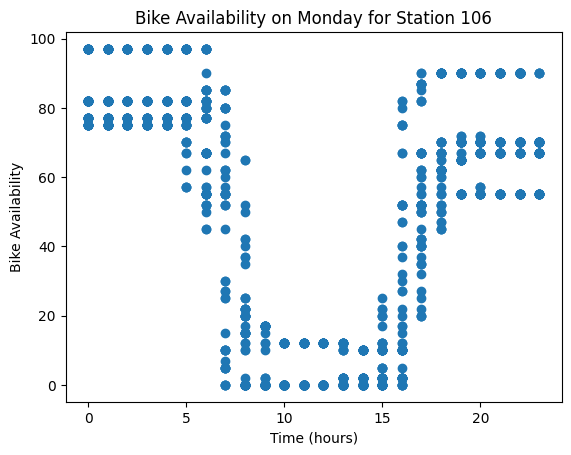

In [37]:
# create scatter plot using the filtered DataFrame
plt.scatter(df_mondays['hour'], df_mondays['availability_percentage'])
plt.title("Bike Availability on Monday for Station 106")
plt.ylabel("Bike Availability")
plt.xlabel("Time (hours)")
plt.show()


In [38]:

def average_bike_availability(numb):
    # filter the DataFrame to only include data for one station
    df_station = df_main.loc[df_main['number'] == numb].copy()
    # set the order of days of the week
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    # create a new column to map the days of the week to a numerical order
    df_station['day_of_week_order'] = pd.Categorical(df_station['day_of_week'], categories=day_order, ordered=True)
    df_station = df_station.sort_values('day_of_week_order')


    # calculate the mean availability percentage for each hour of the day and day of the week
    df_hourly = df_station.groupby(['day_of_week_order','hour'])['availability_percentage'].mean()
    df_hourly.dropna(inplace=True)

    # plot a line plot of the data
    df_hourly.plot(kind='line', figsize=(10,8))

    plt.title(f"Average Bike Availability for Station {numb} over the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Bike Availability")
    plt.ylim(0, 100)
    plt.show()


### Import static bike numbers


In [41]:
# we just need to create a collect csv files for both and put them in here
df_static = pd.read_csv('static_30_3_23.csv')
df_static.head()

number contract_name                  name               address  \
0      42        dublin      SMITHFIELD NORTH      Smithfield North   
1      30        dublin  PARNELL SQUARE NORTH  Parnell Square North   
2      54        dublin        CLONMEL STREET        Clonmel Street   
3     108        dublin         AVONDALE ROAD         Avondale Road   
4      20        dublin     JAMES STREET EAST     James Street East   

   position_lat  position_lng  banking  bonus  
0     53.349562     -6.278198        0      0  
1     53.353742     -6.265301        0      0  
2     53.336021     -6.262980        0      0  
3     53.359405     -6.276142        0      0  
4     53.336597     -6.248109        0      0

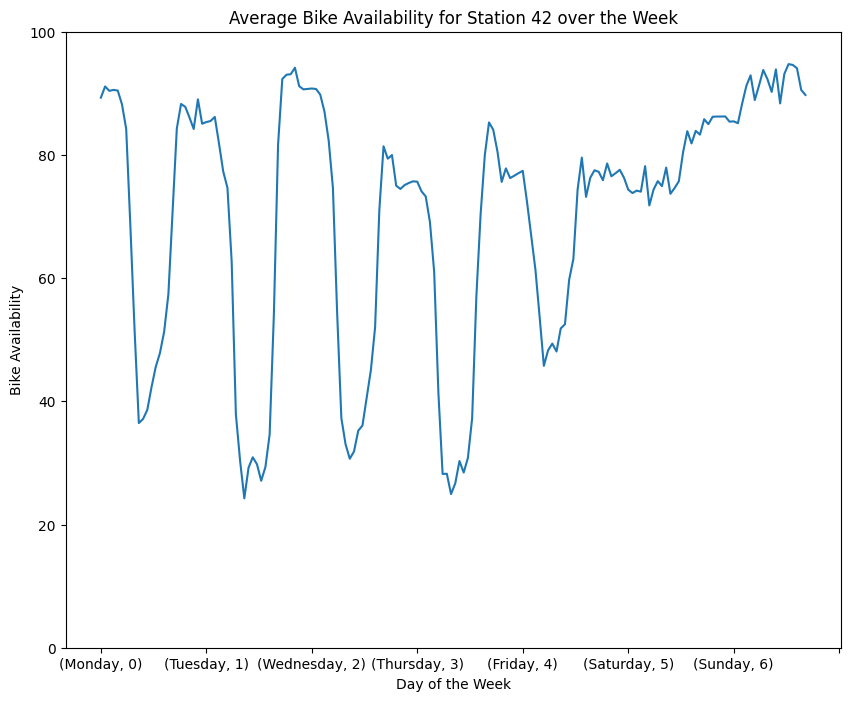

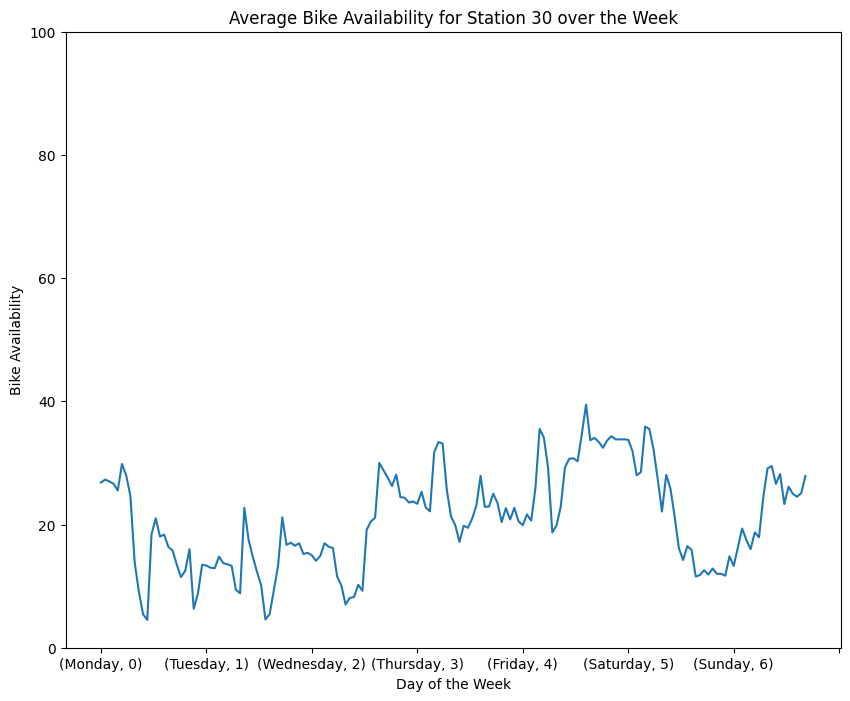

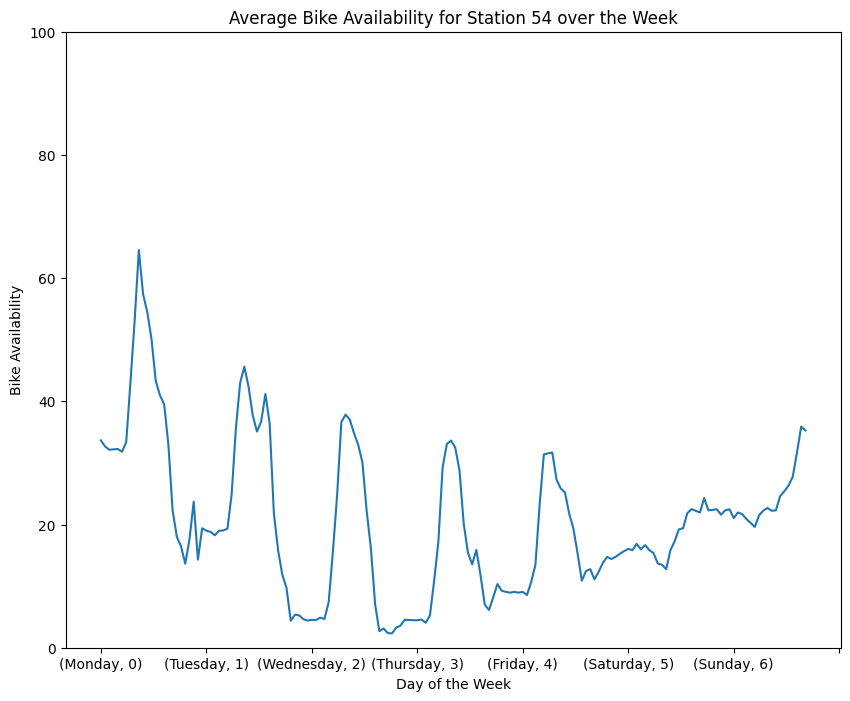

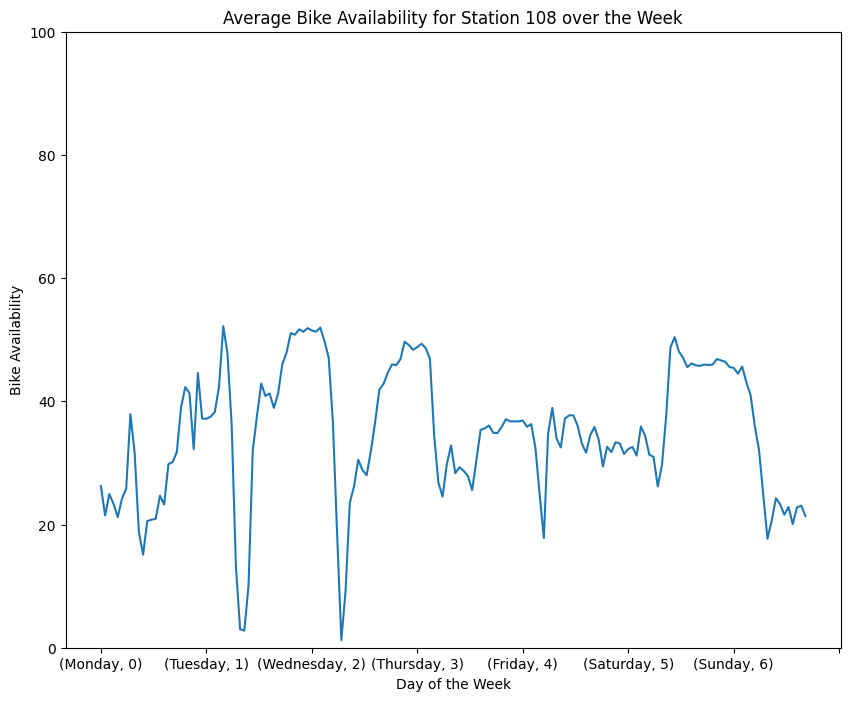

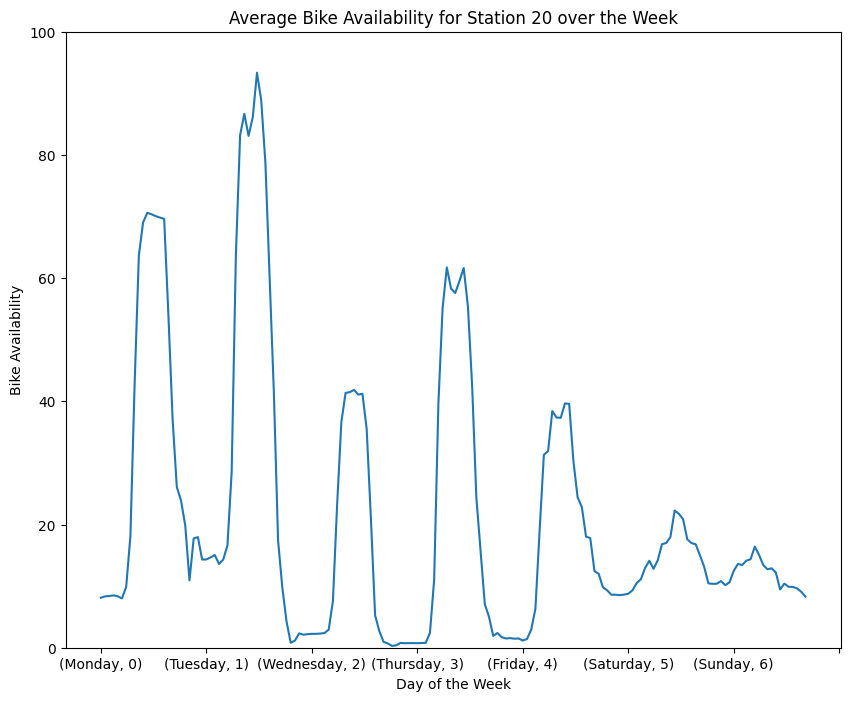

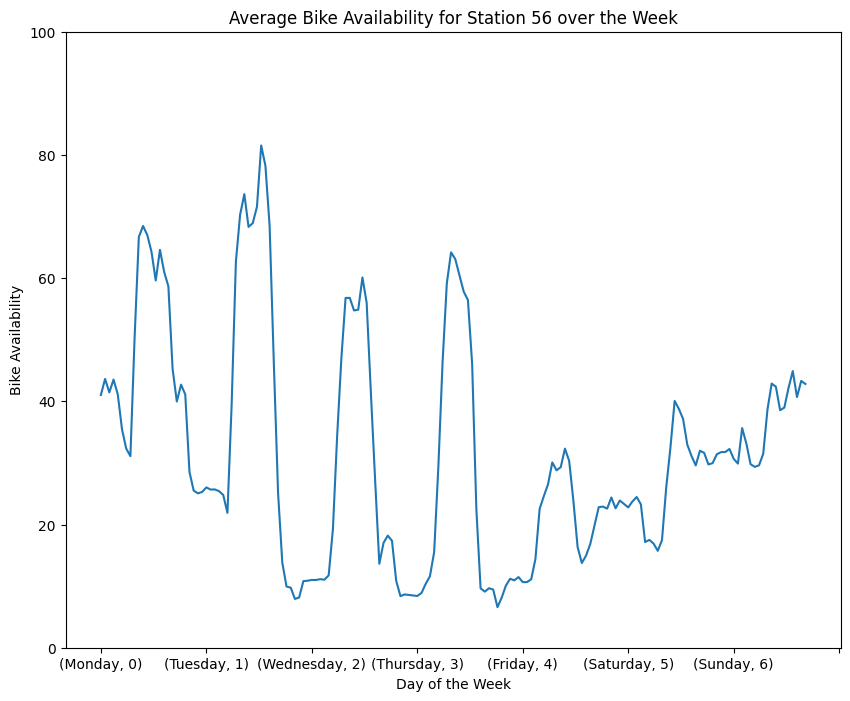

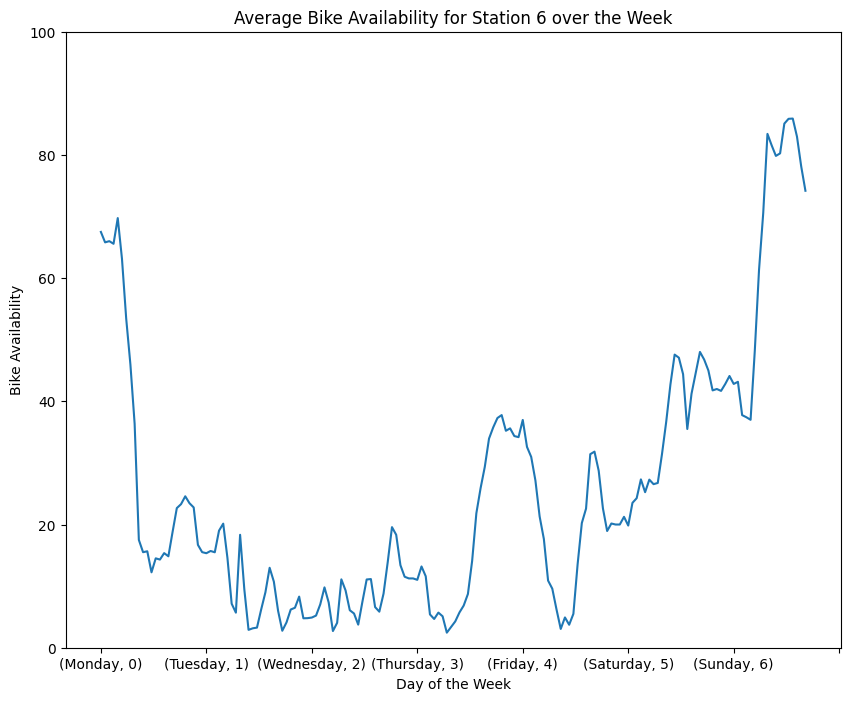

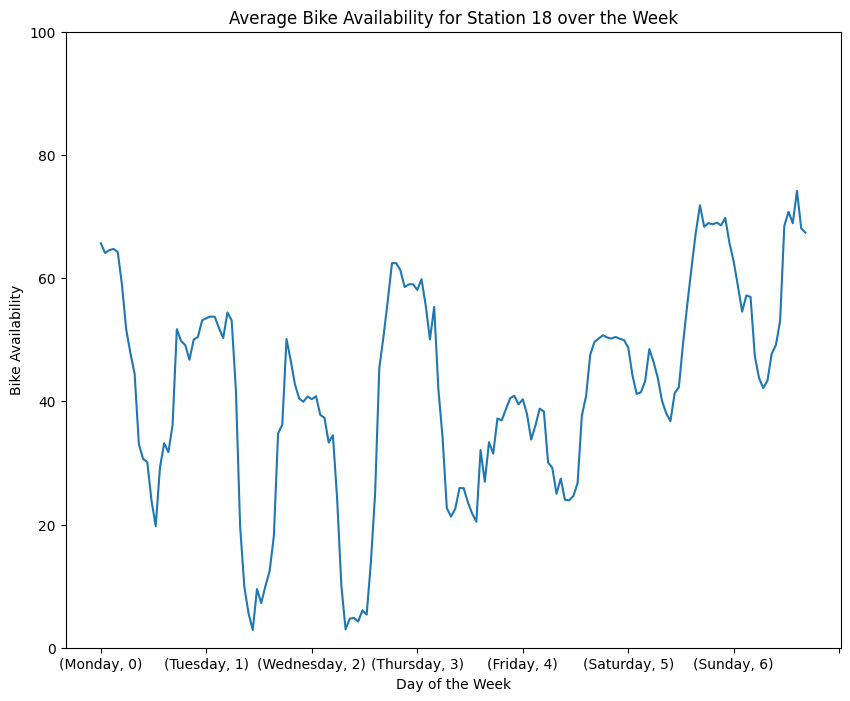

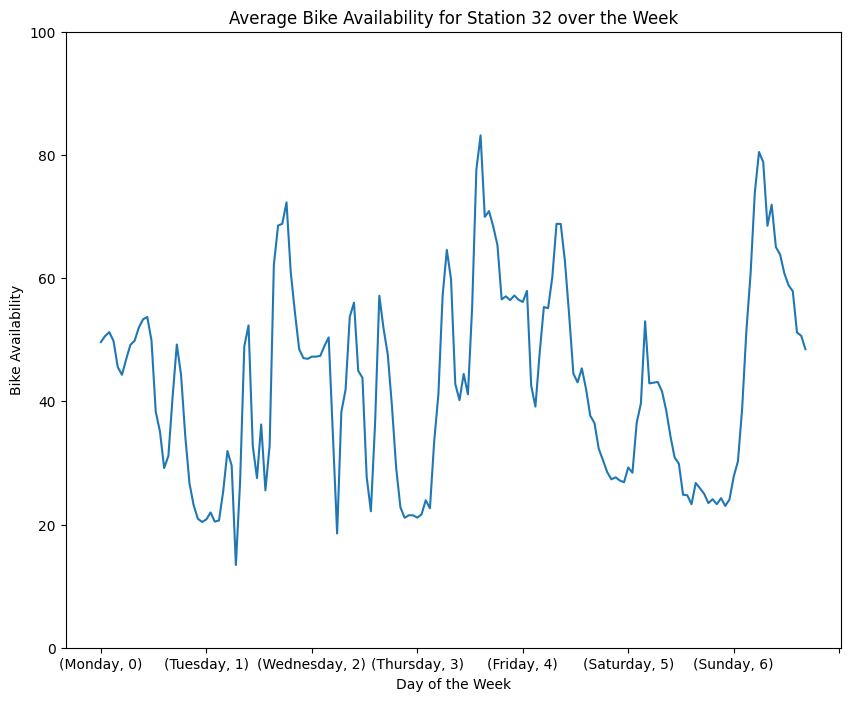

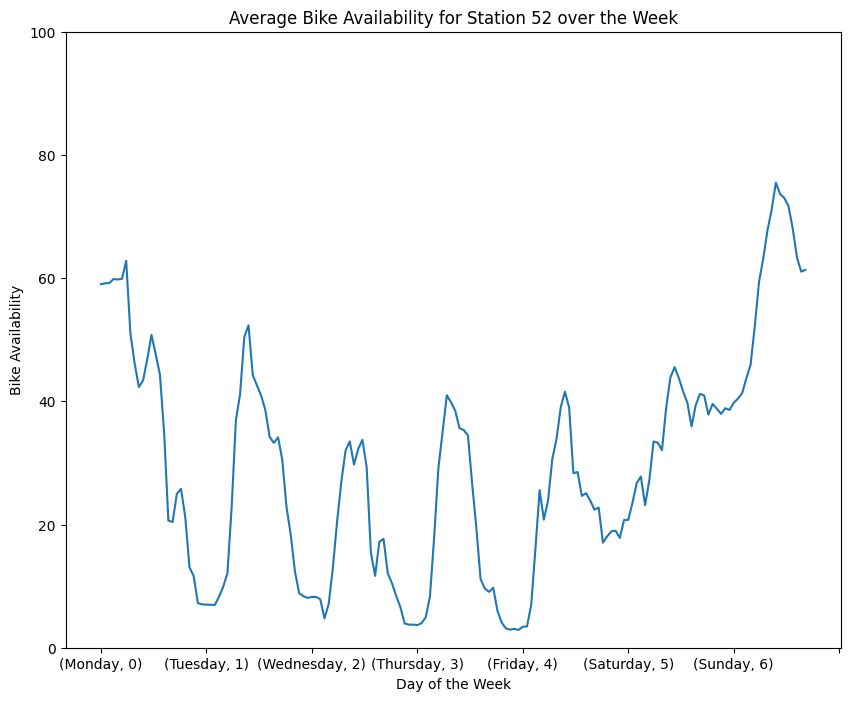

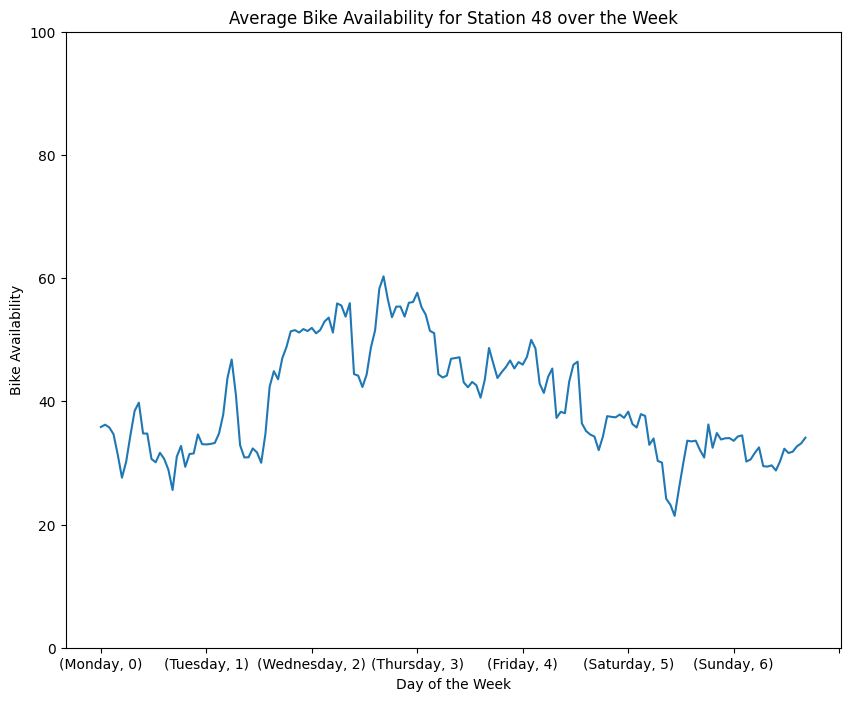

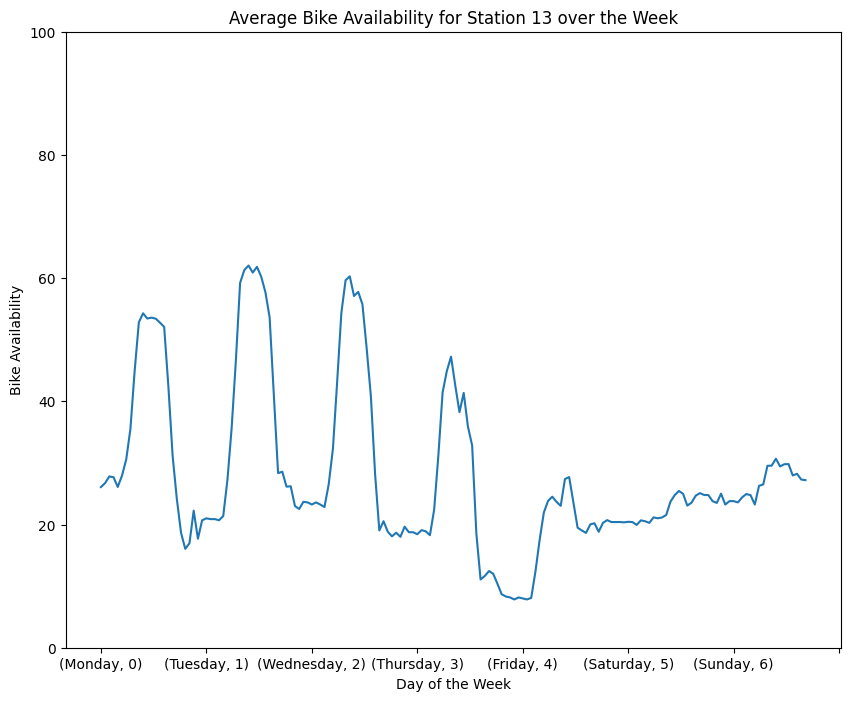

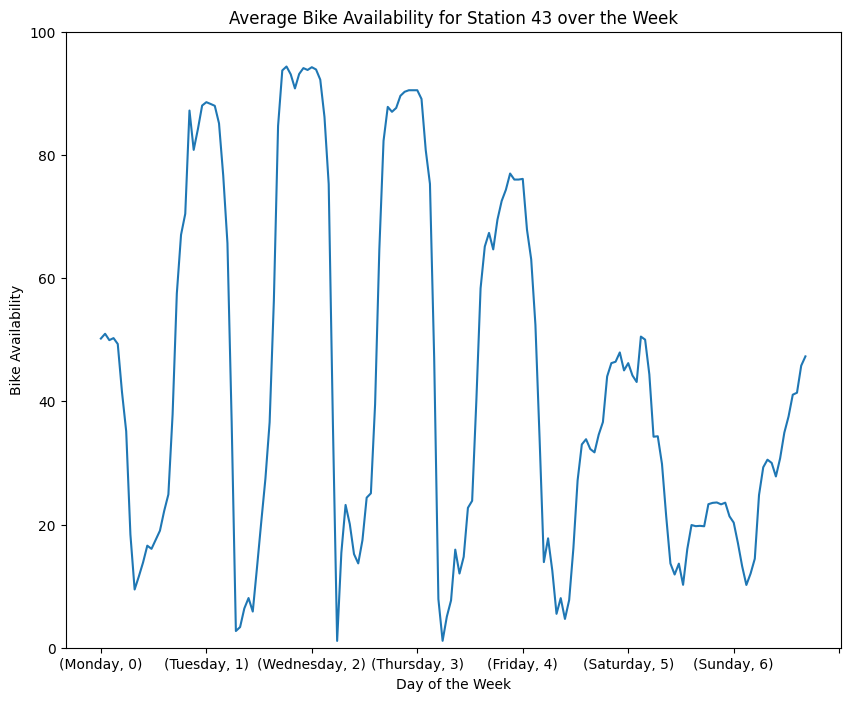

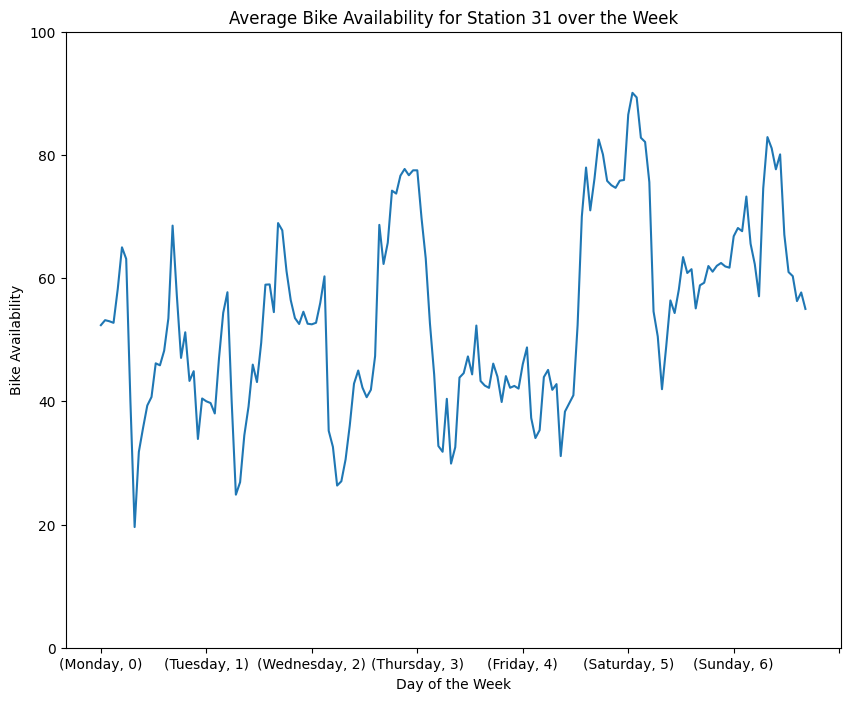

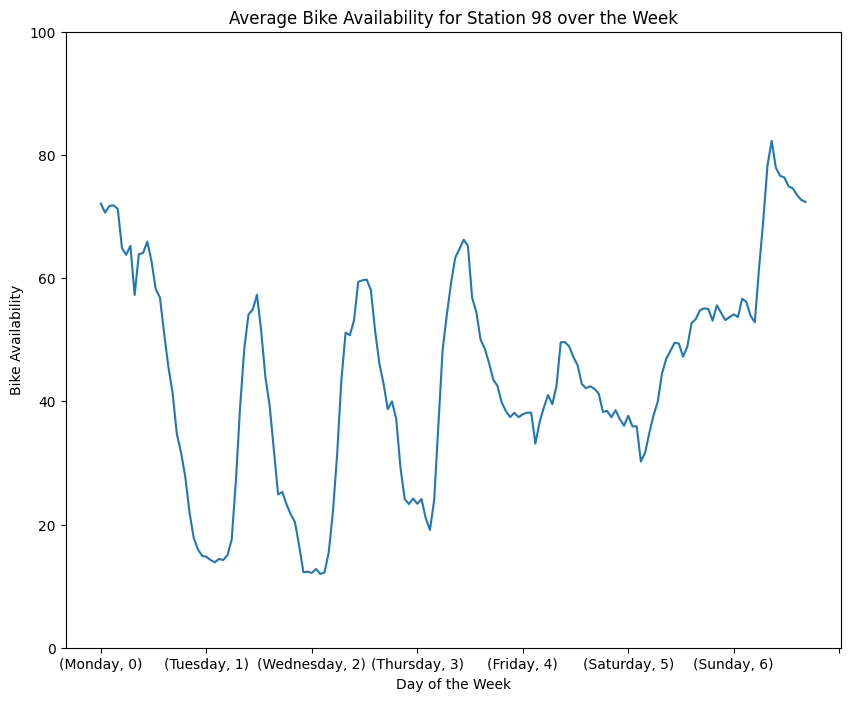

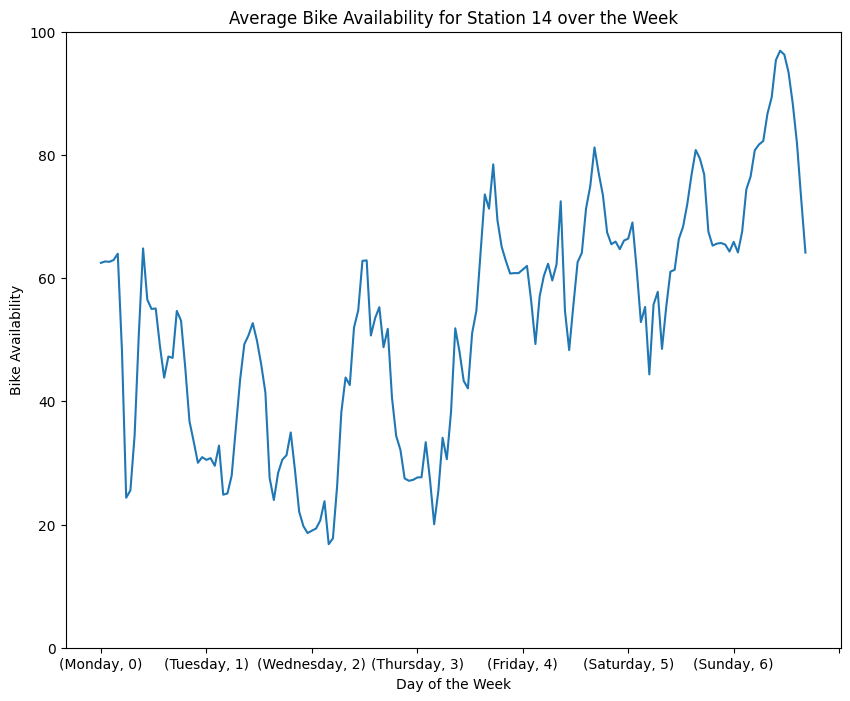

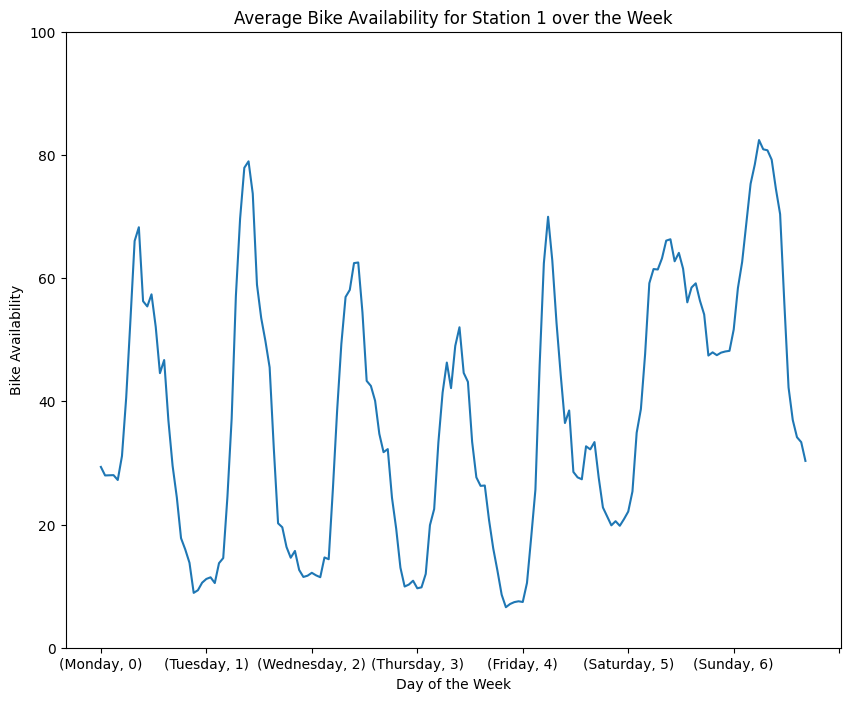

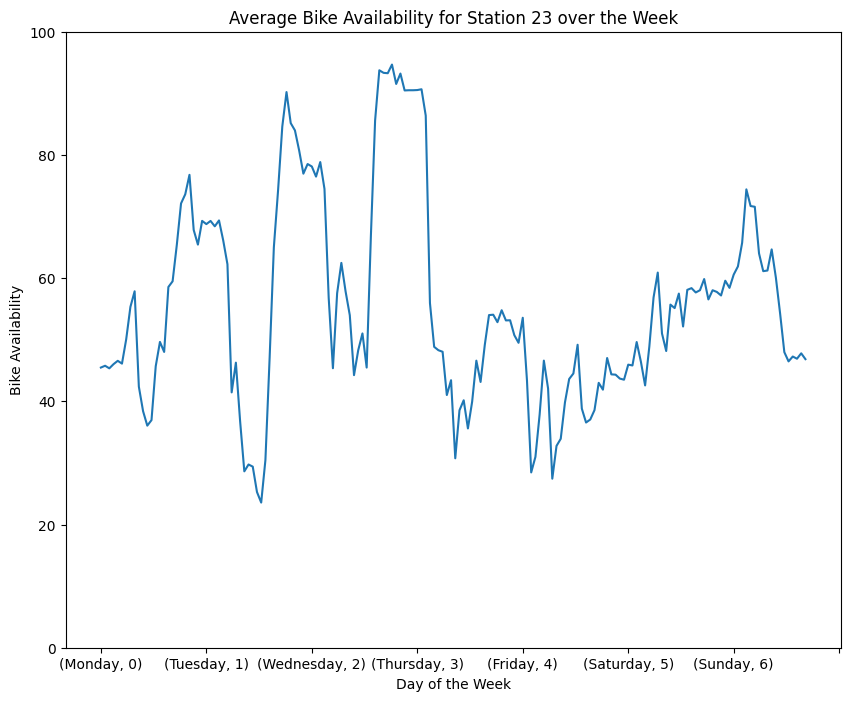

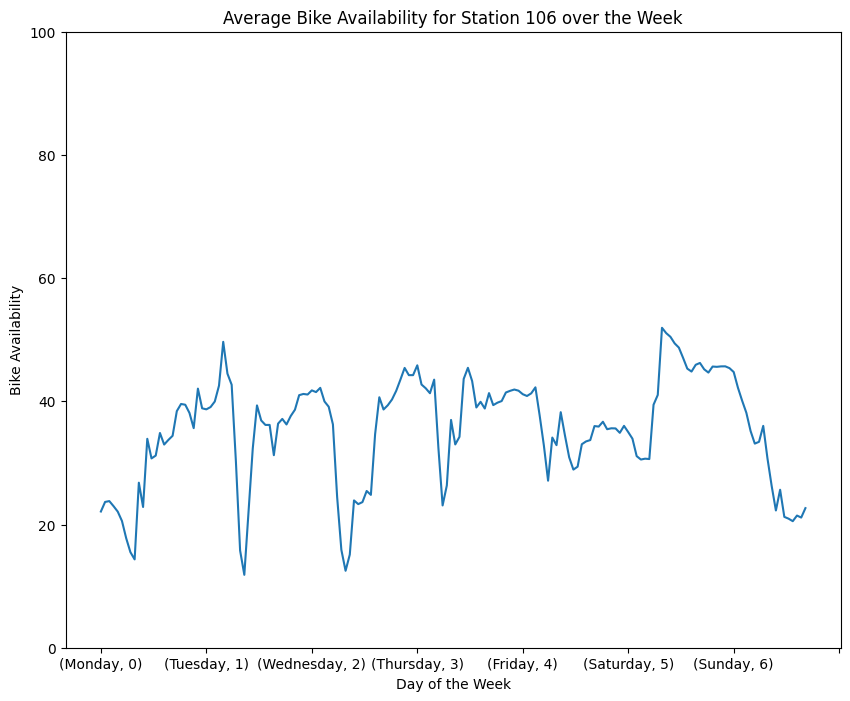

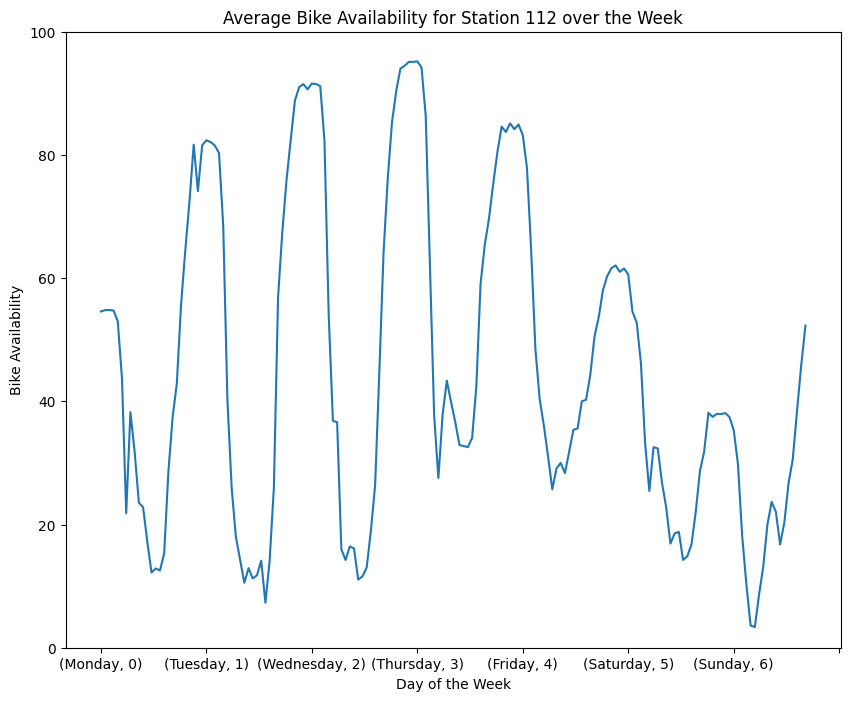

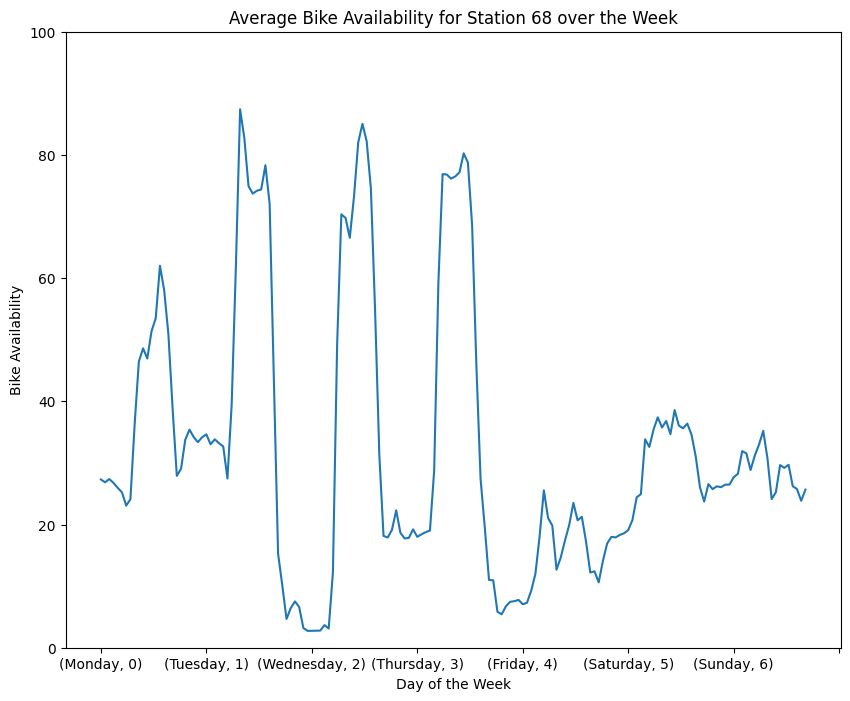

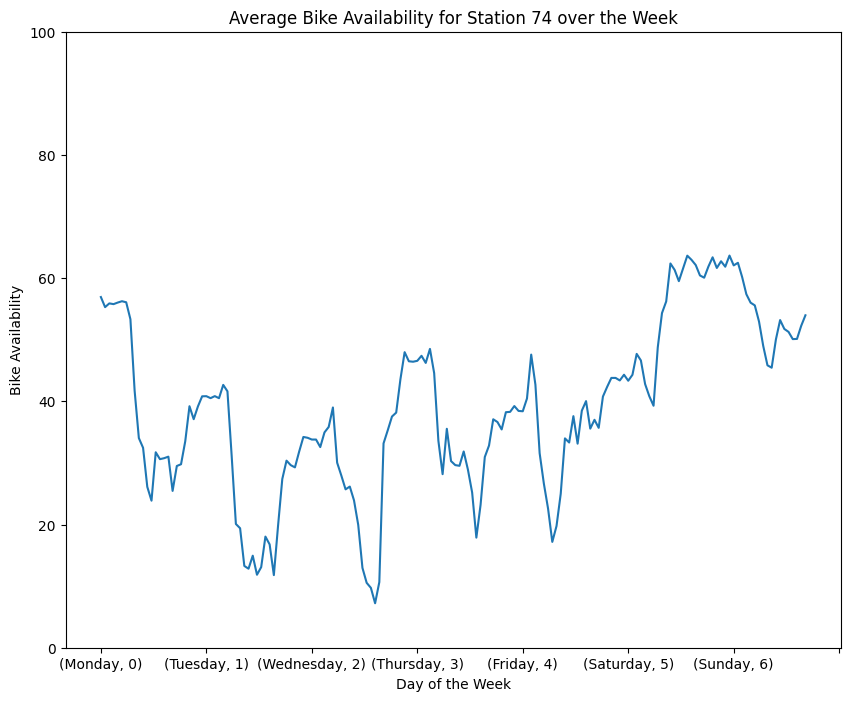

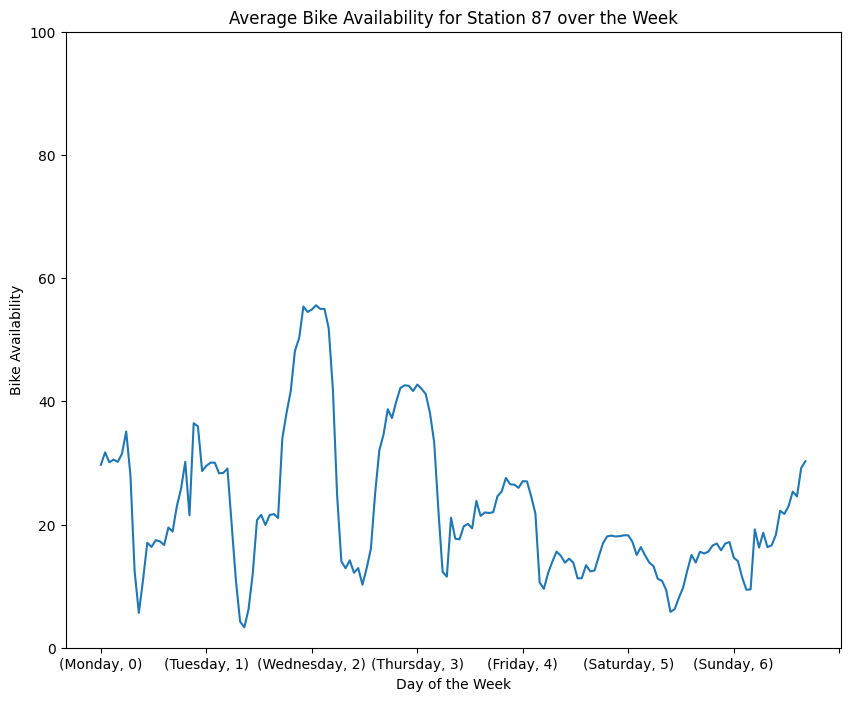

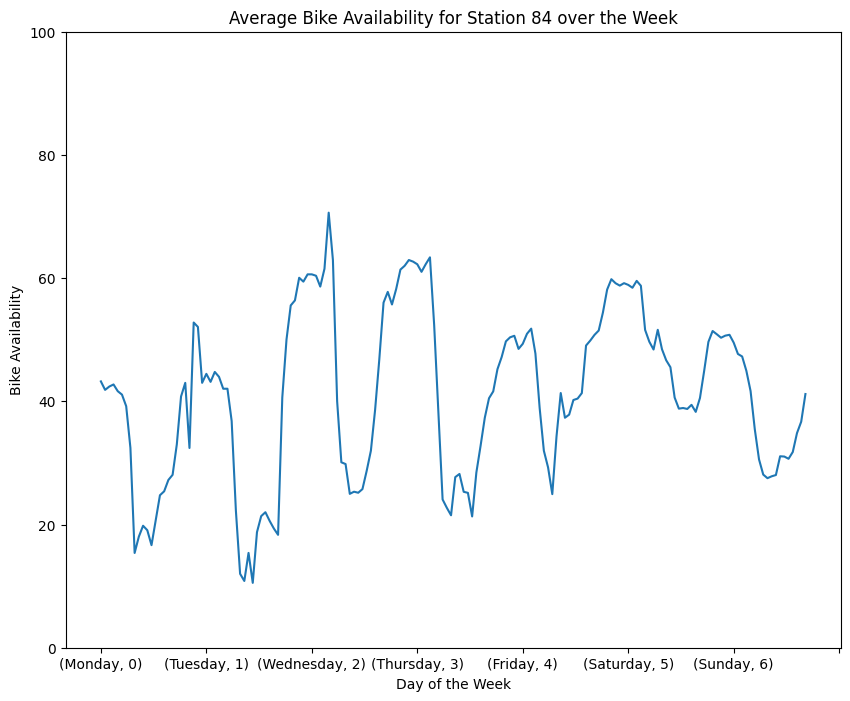

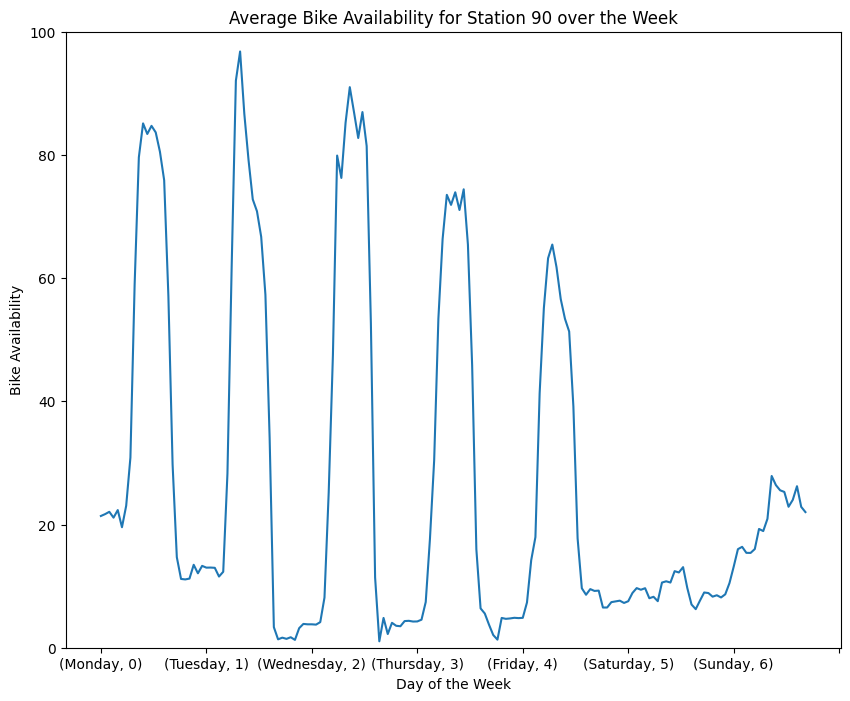

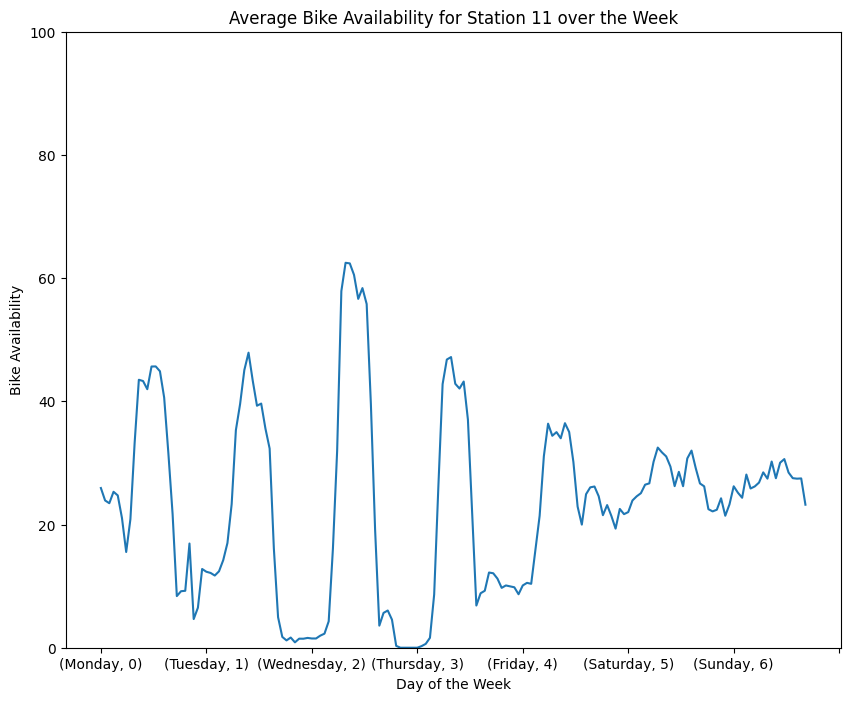

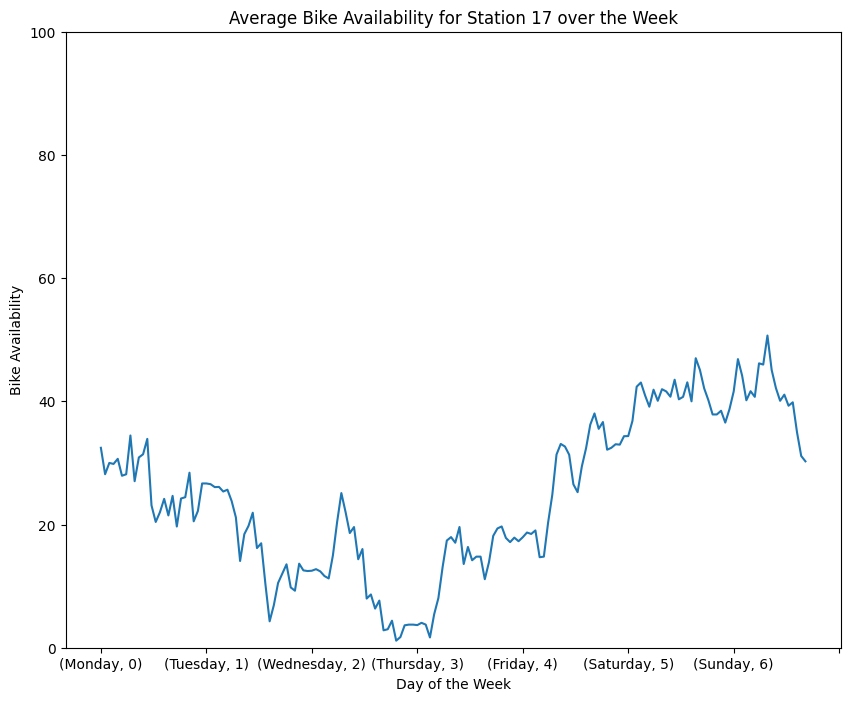

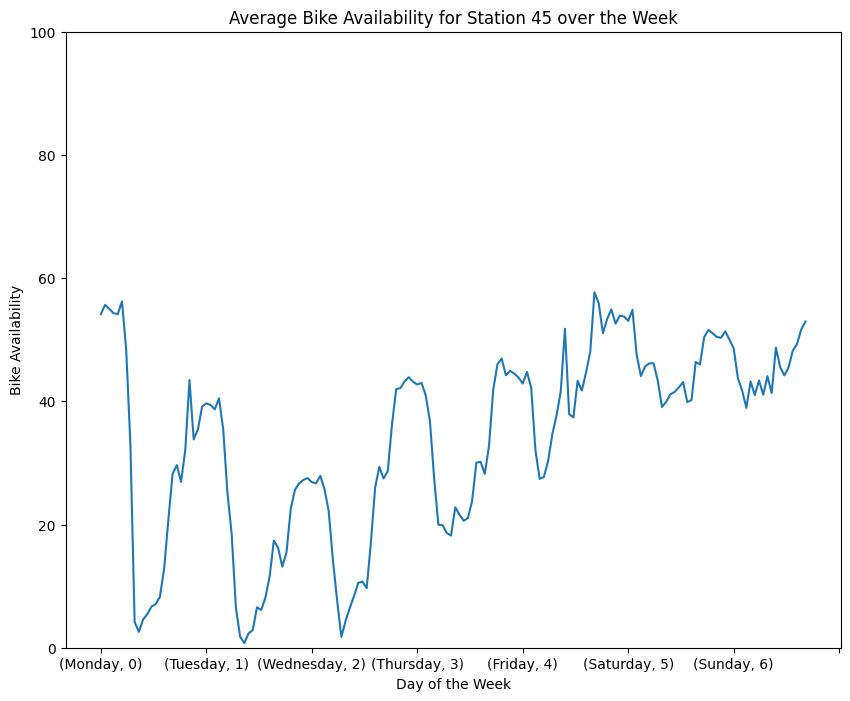

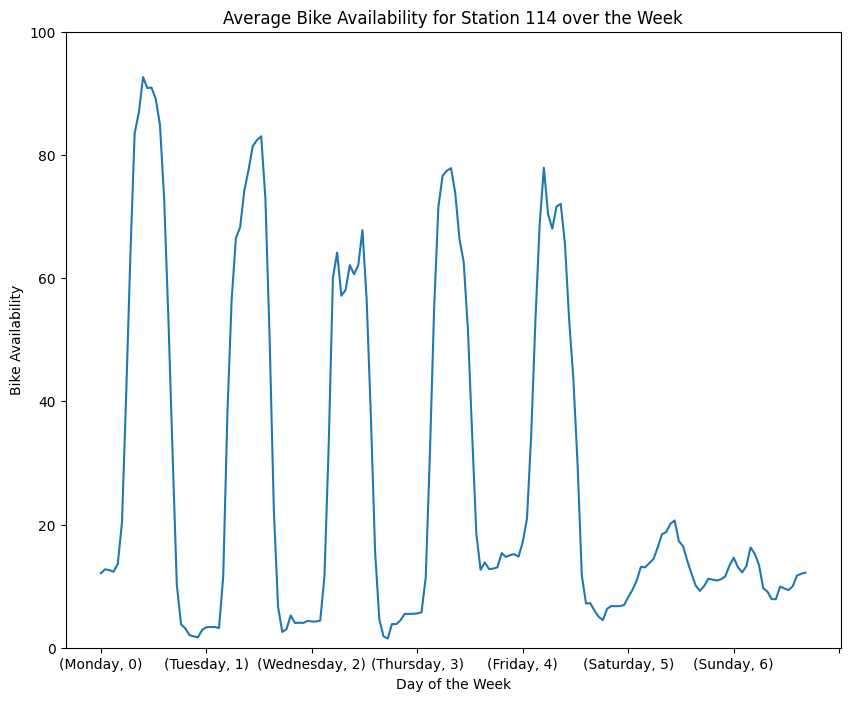

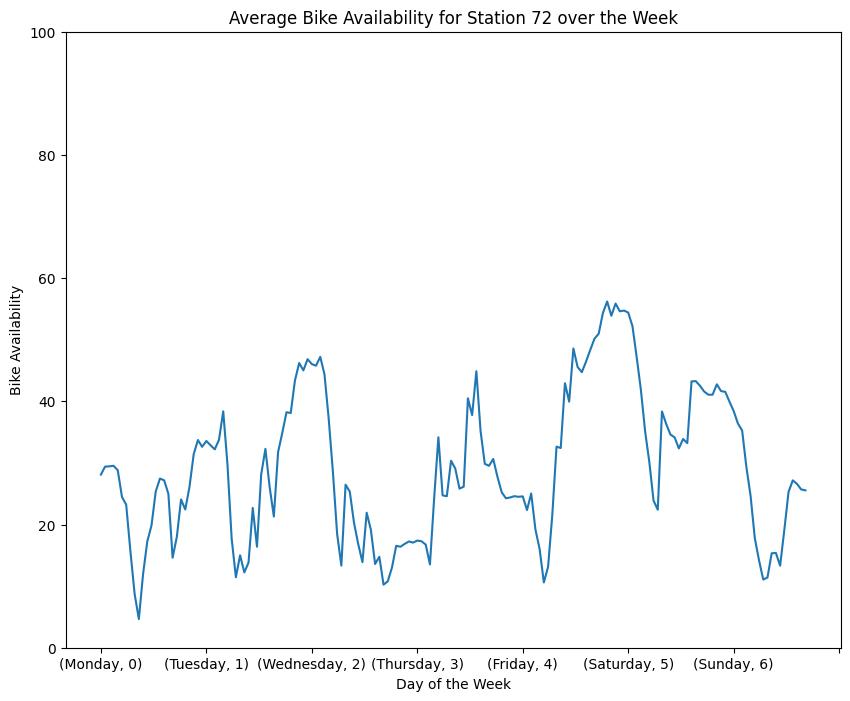

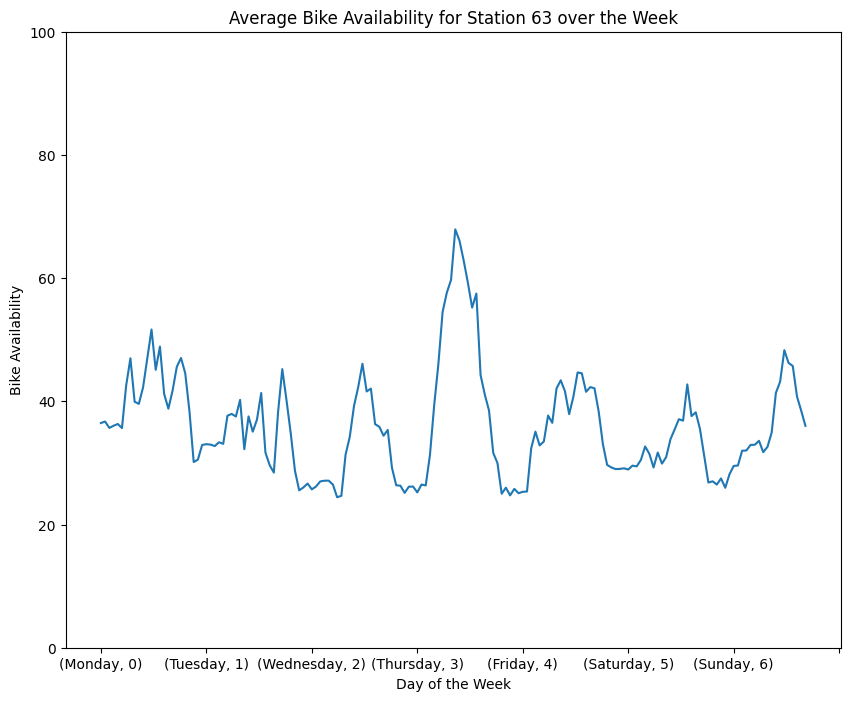

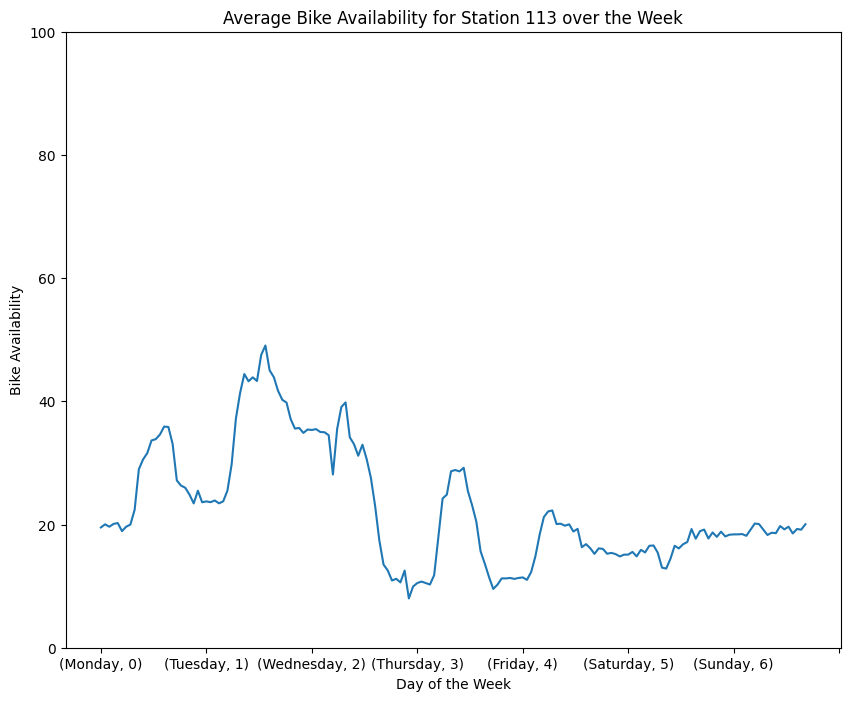

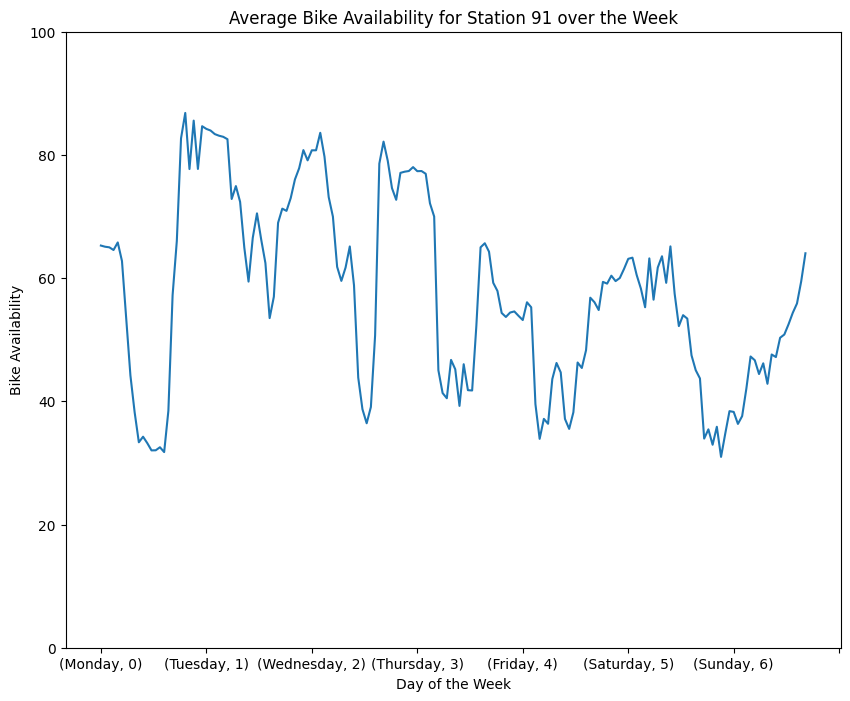

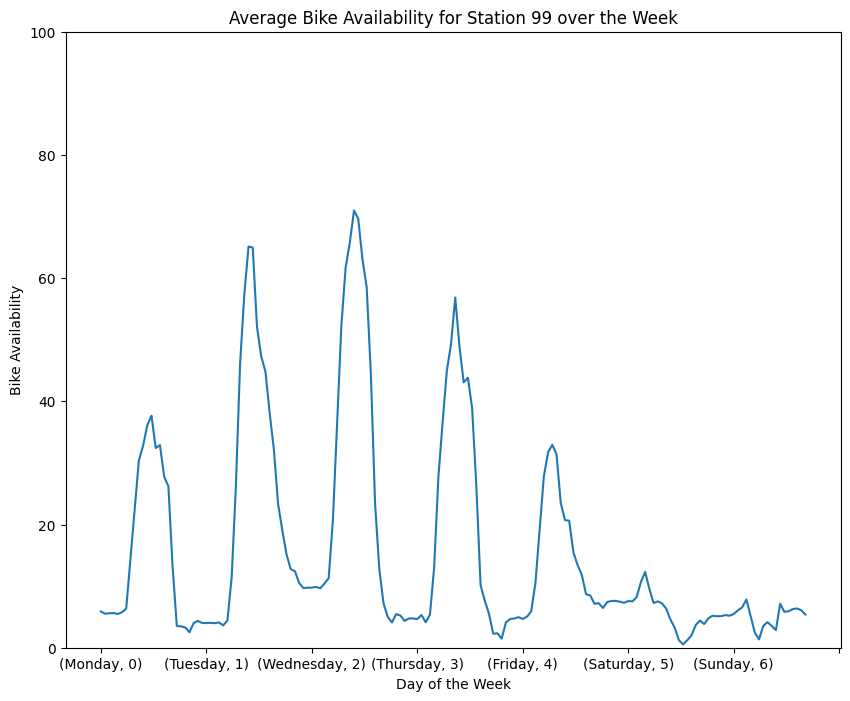

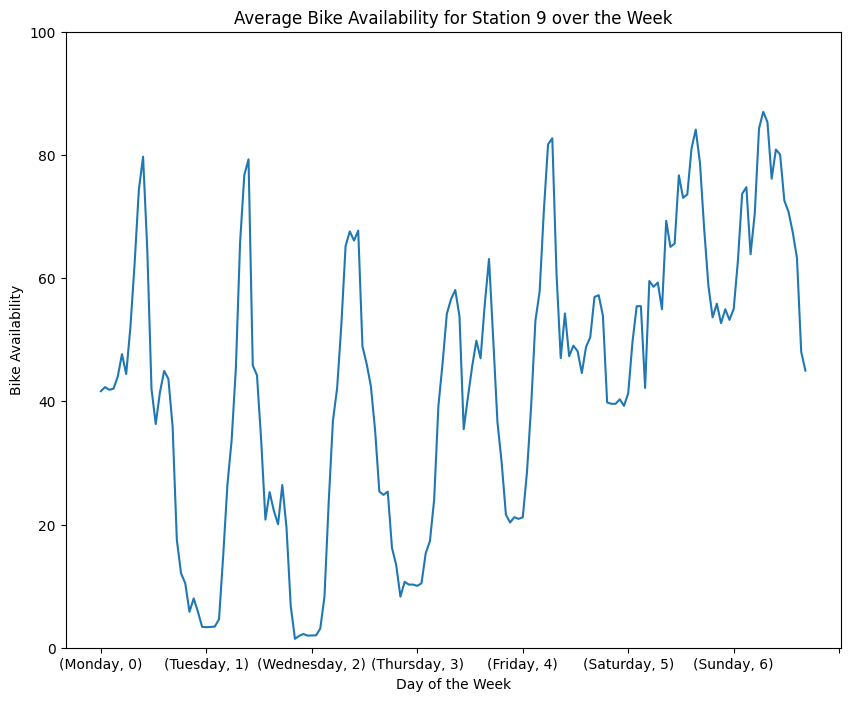

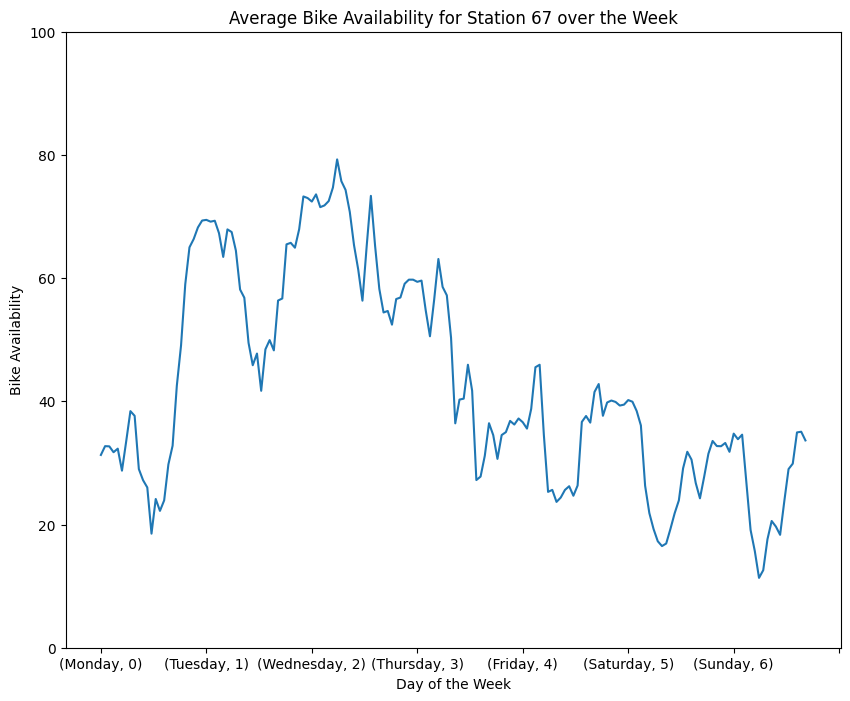

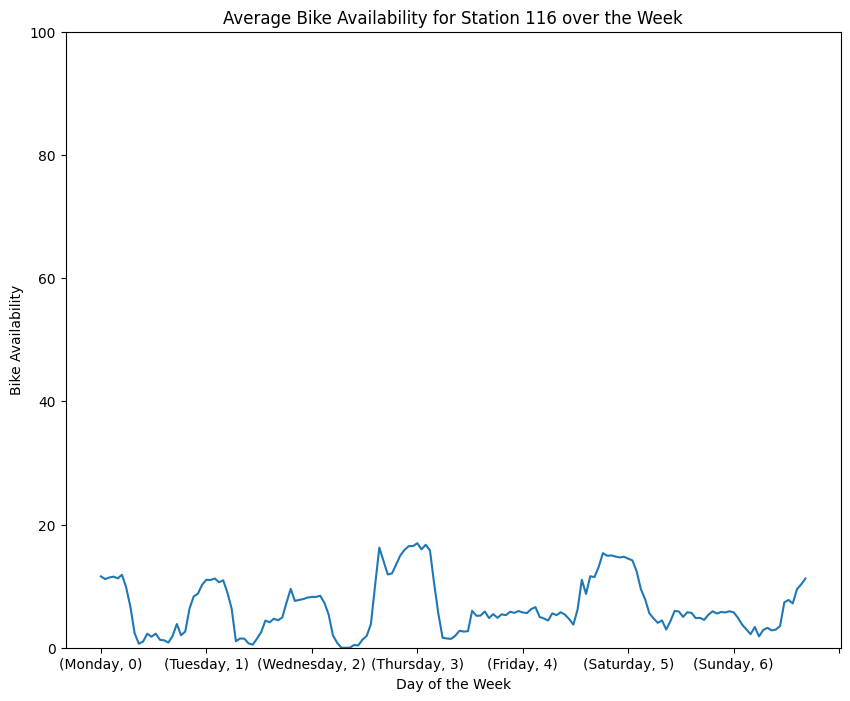

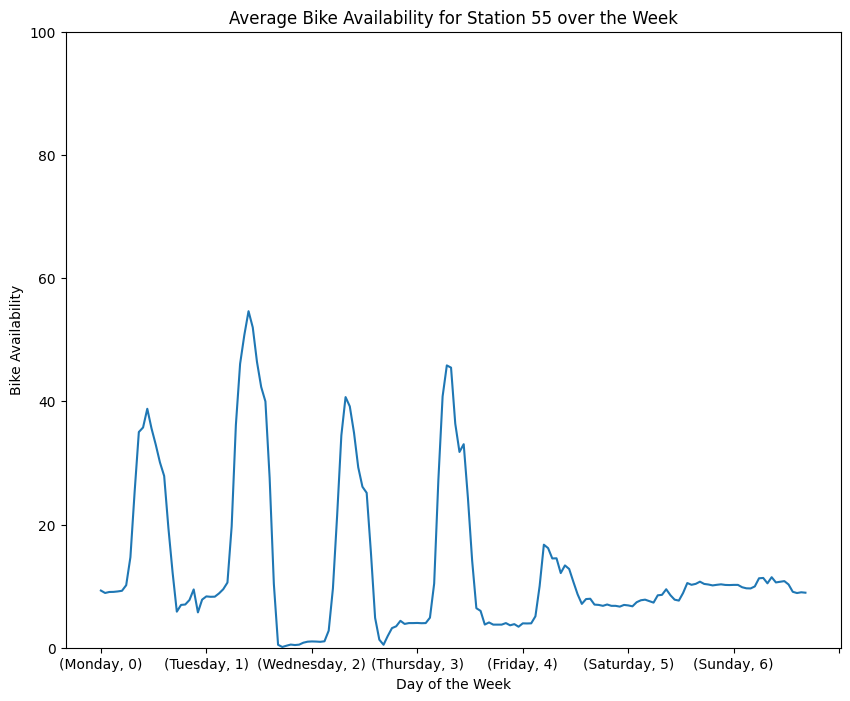

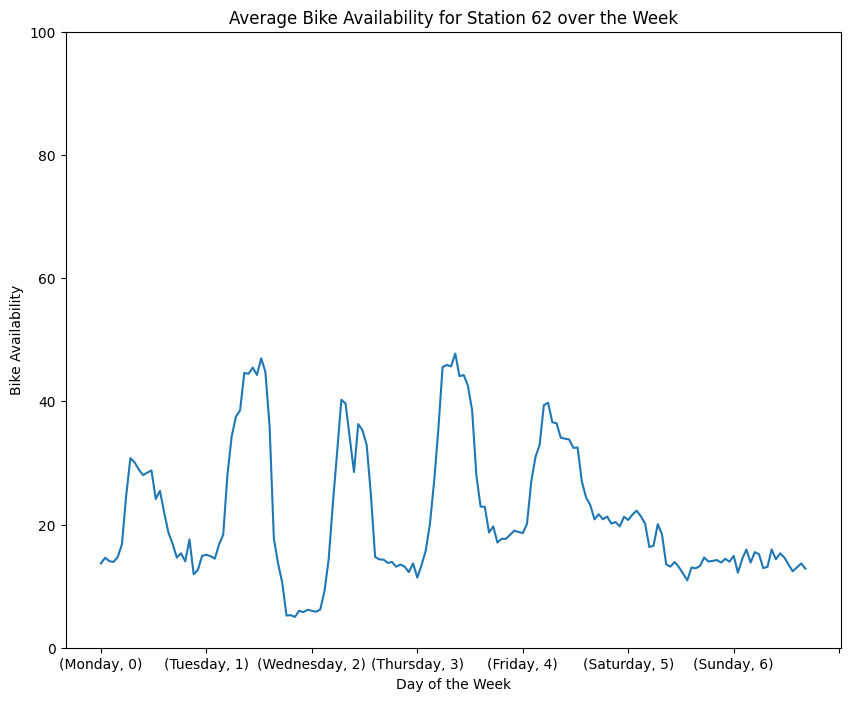

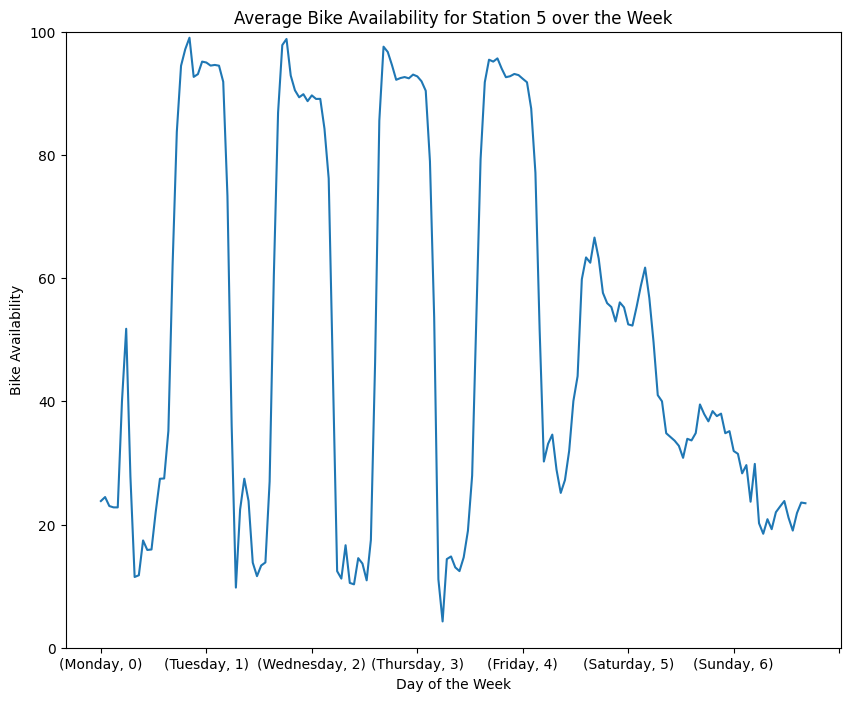

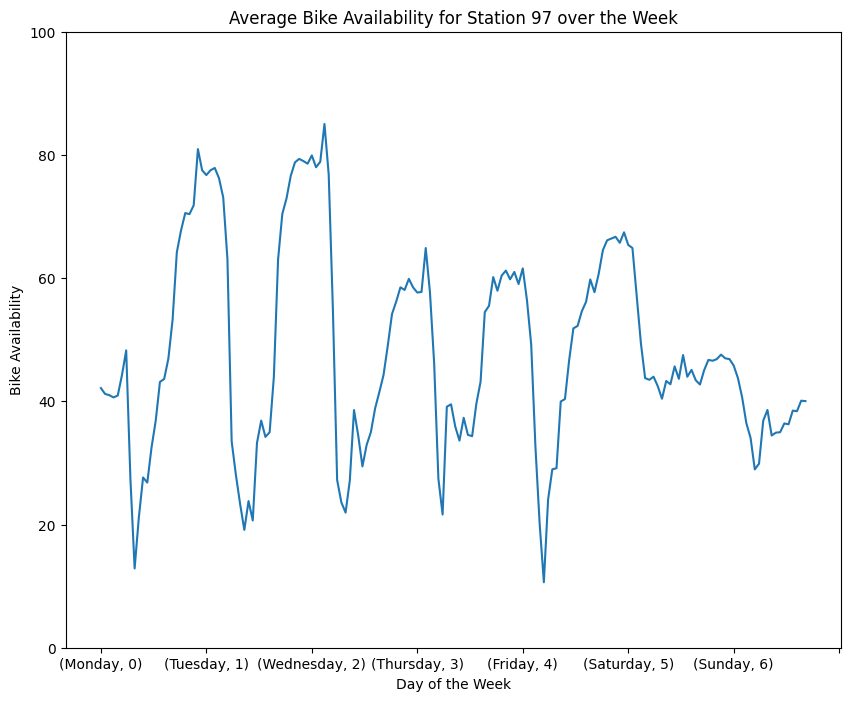

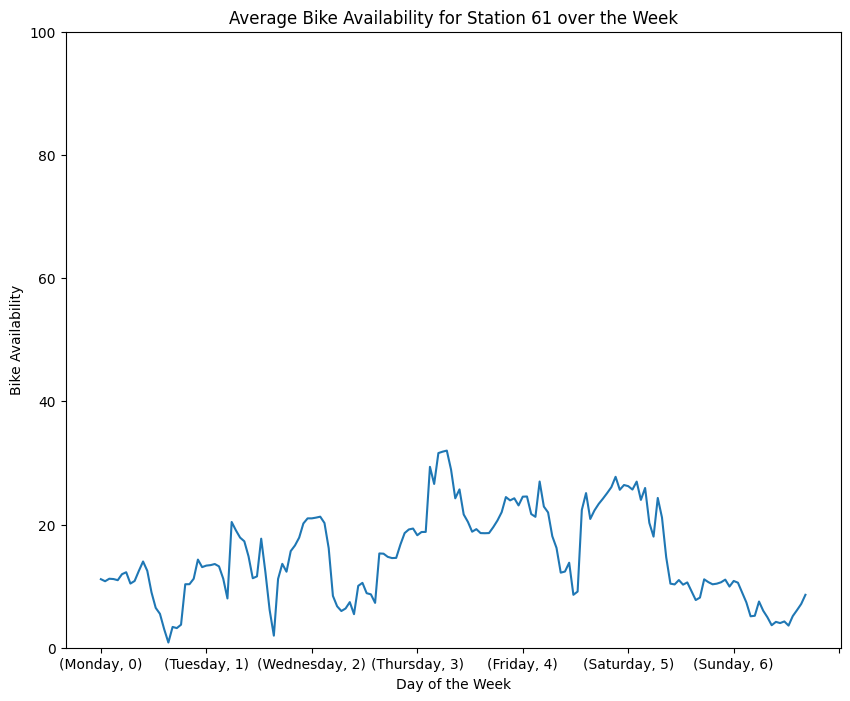

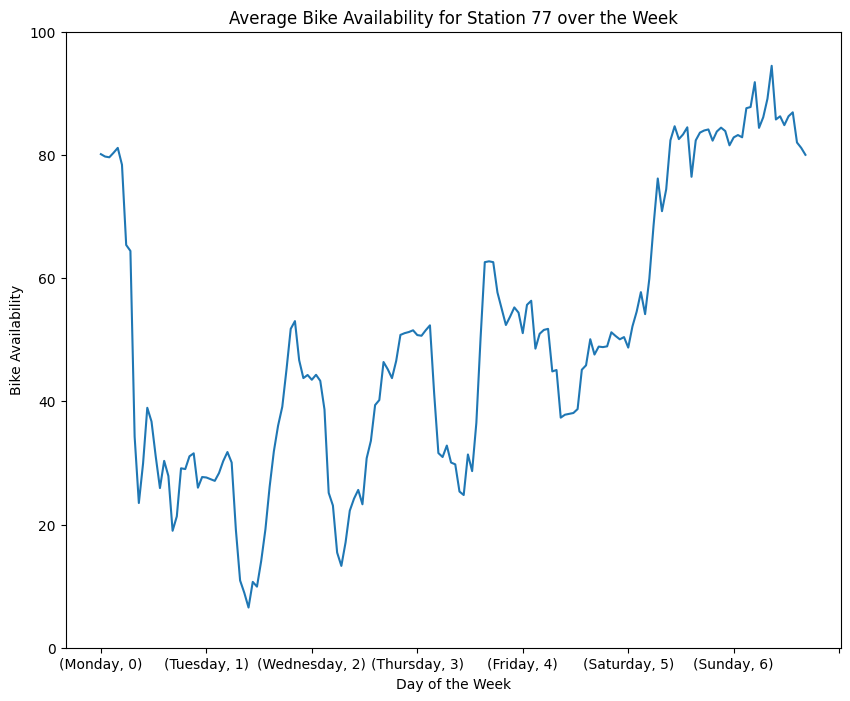

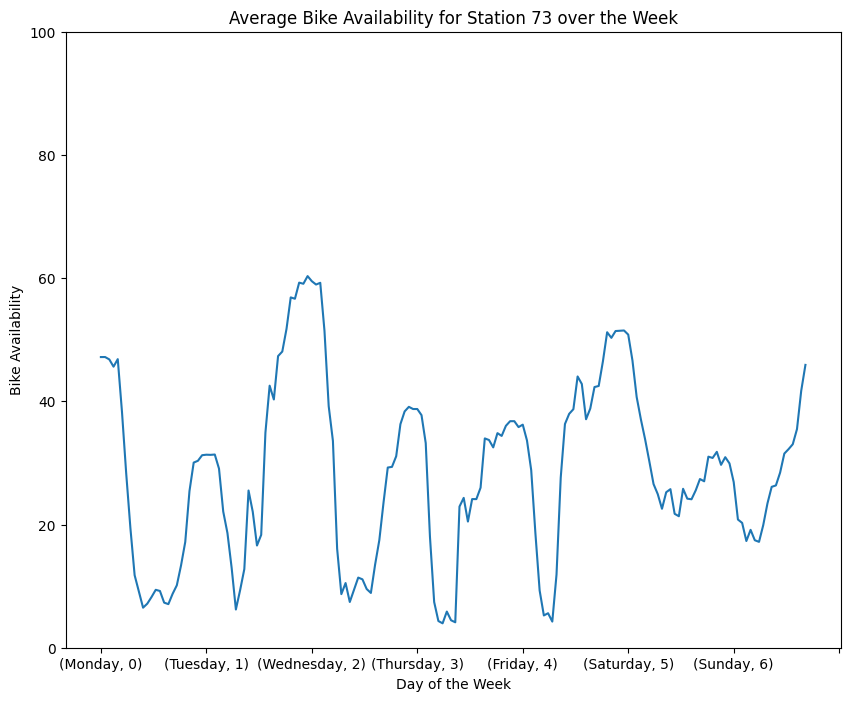

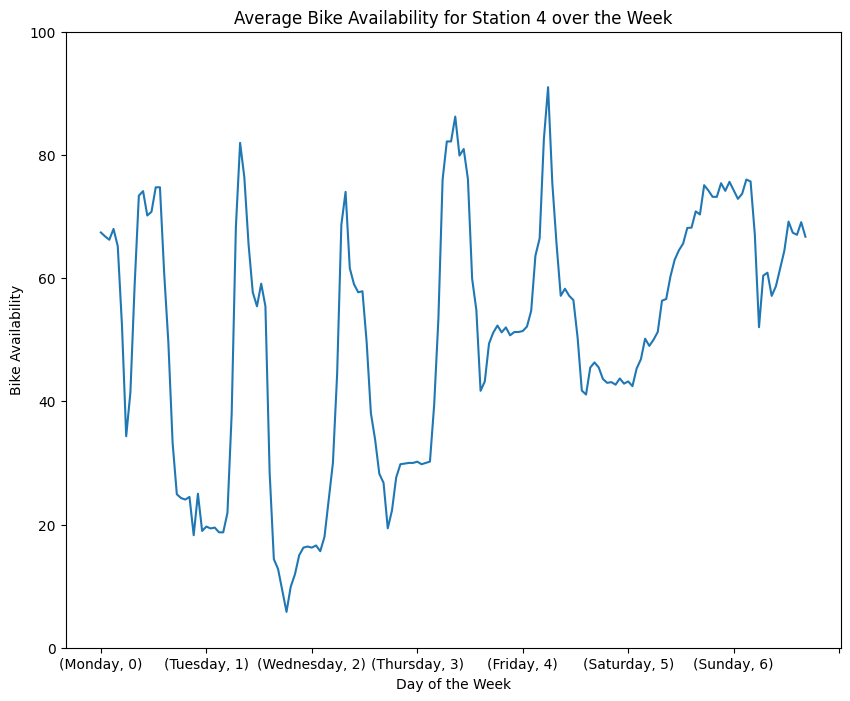

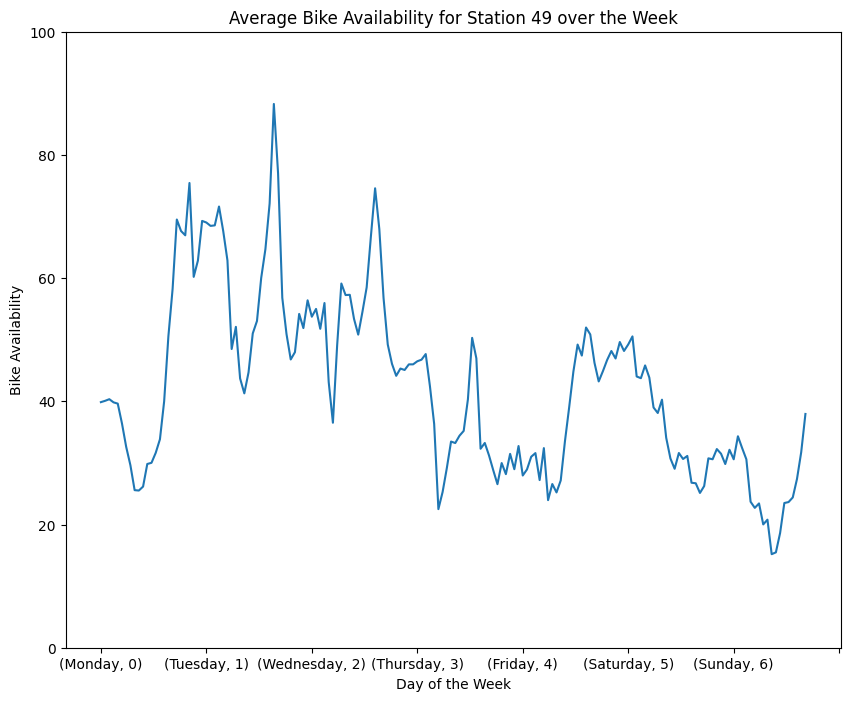

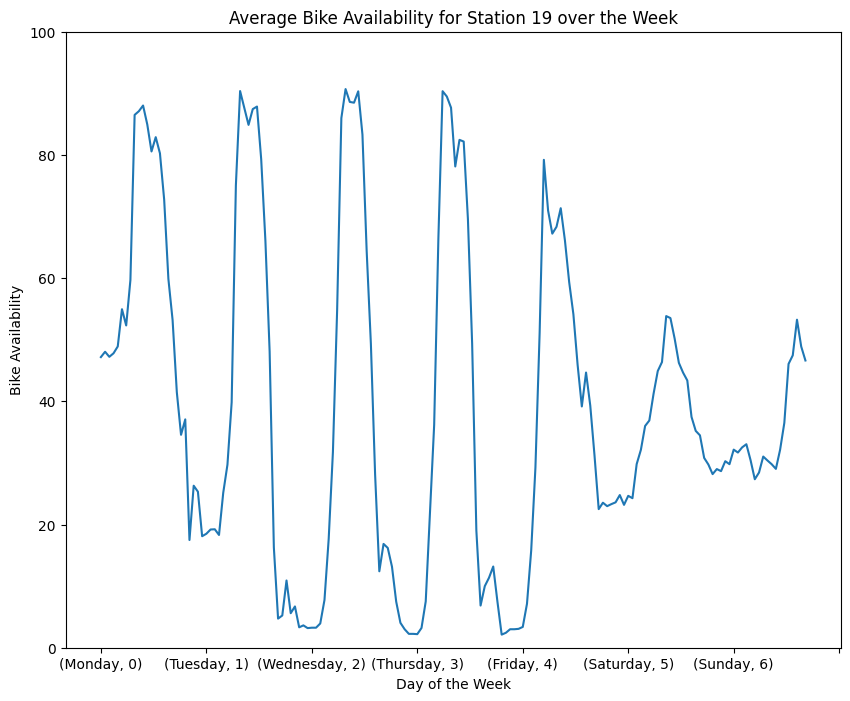

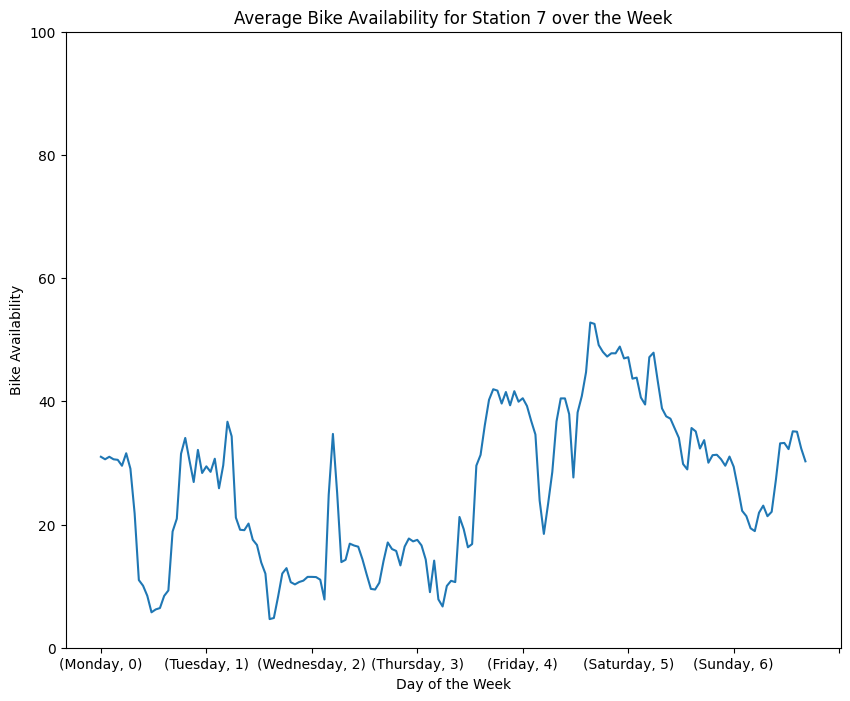

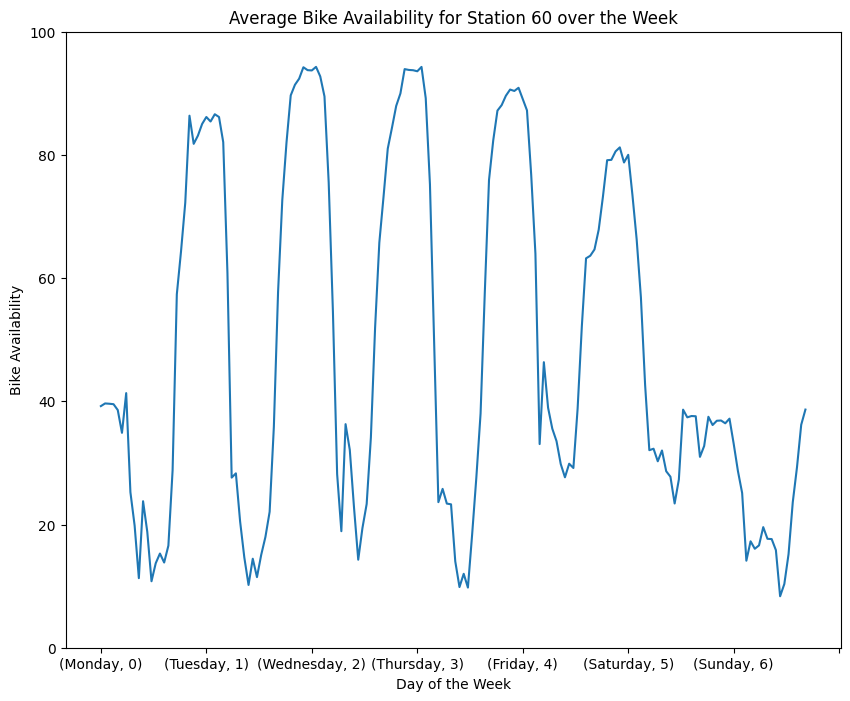

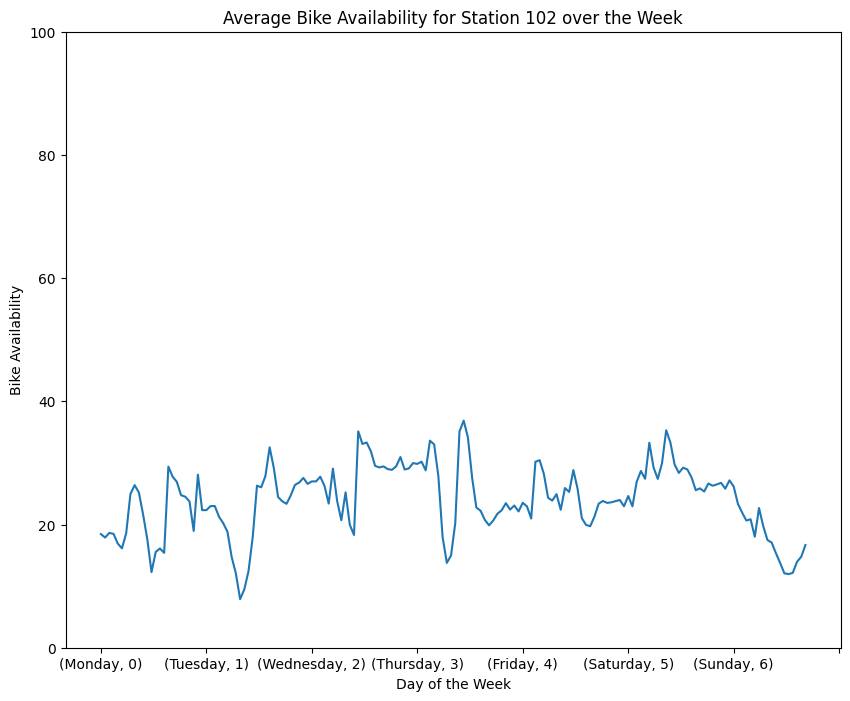

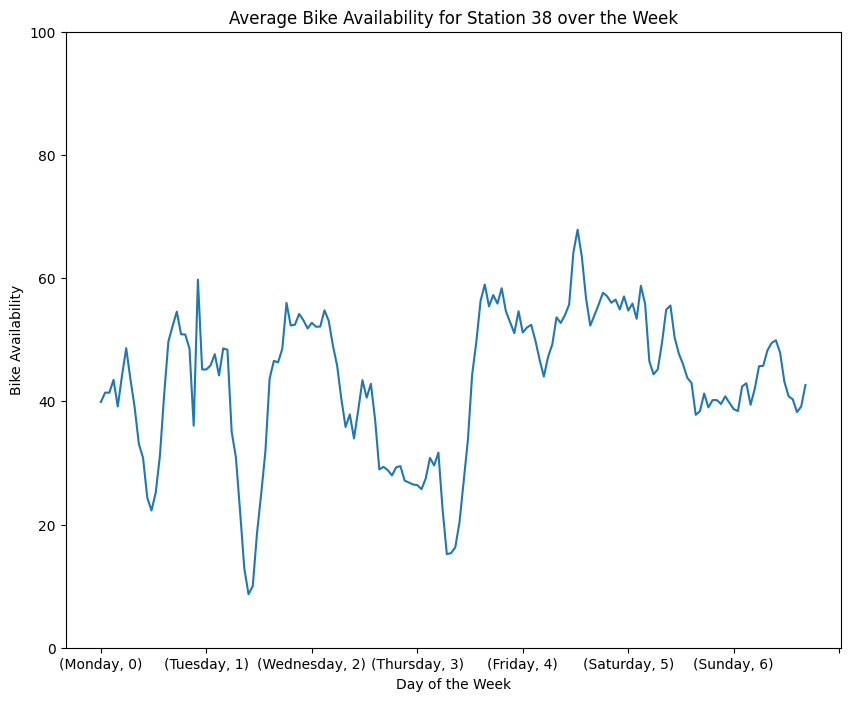

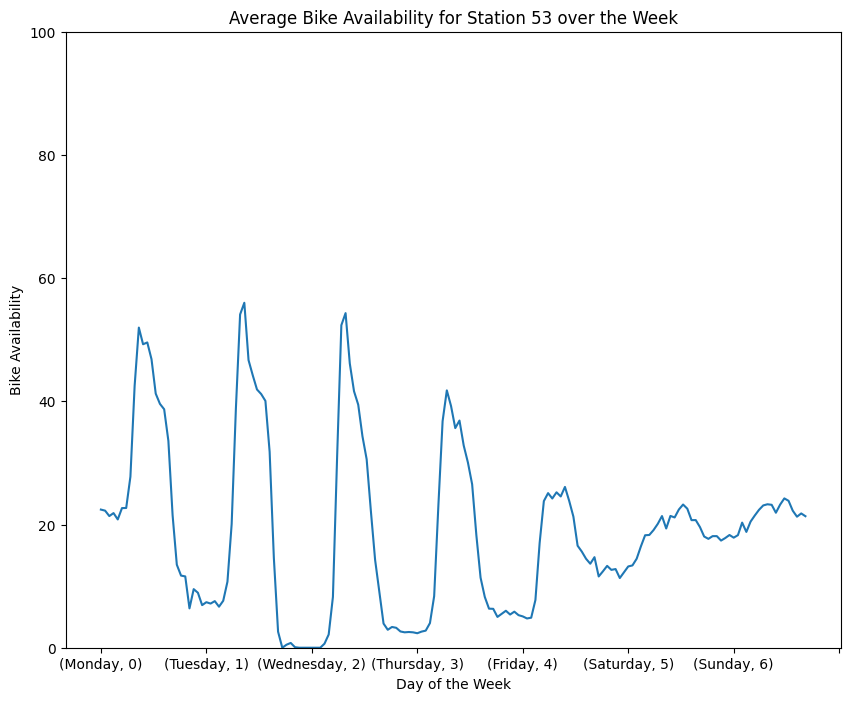

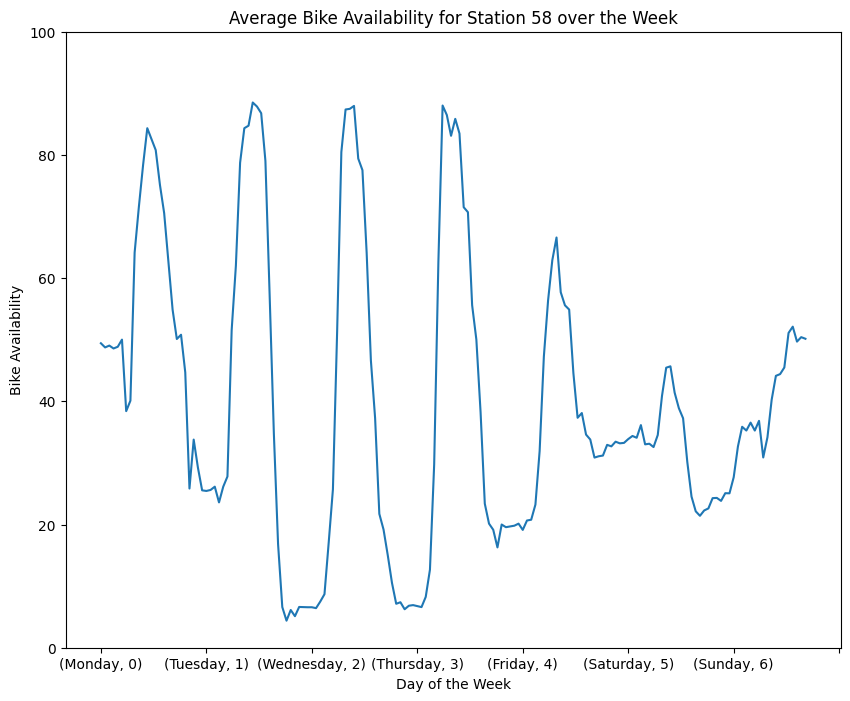

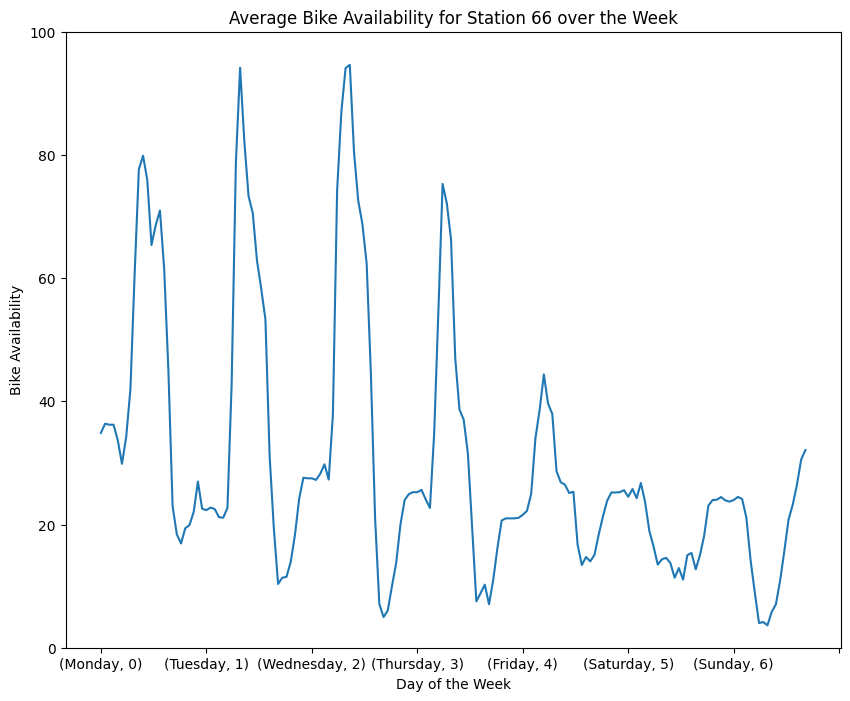

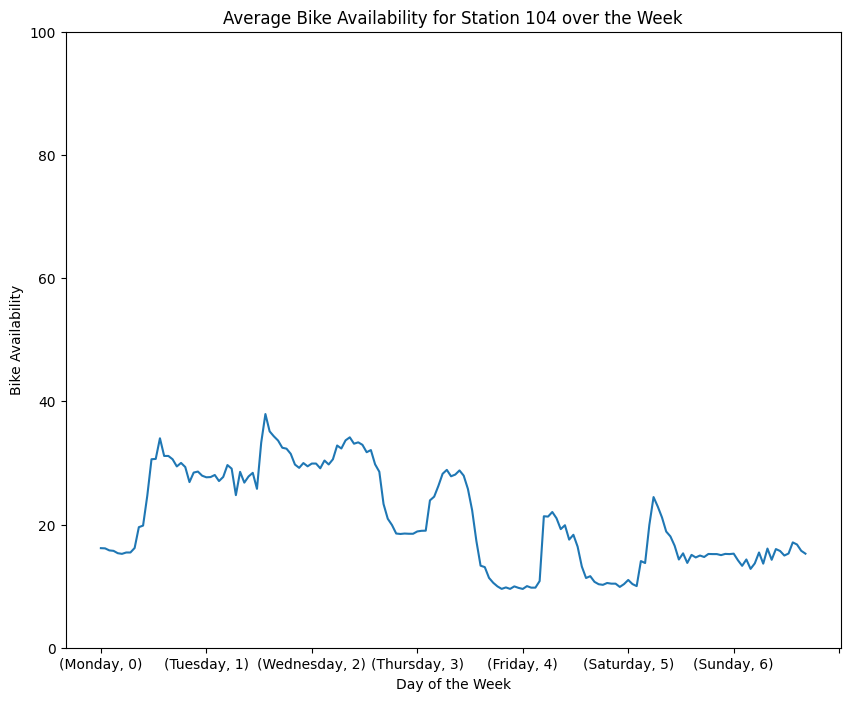

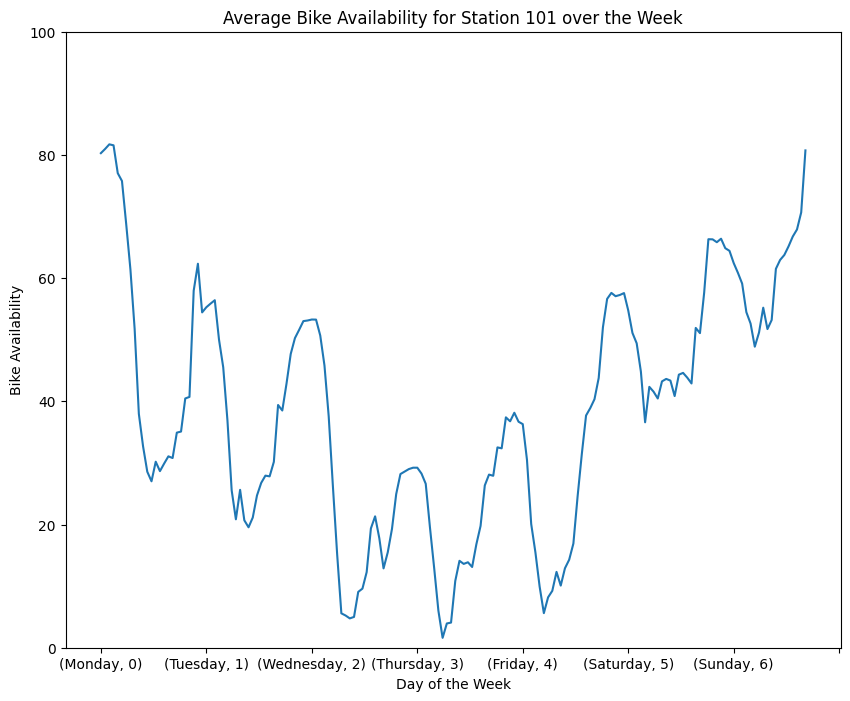

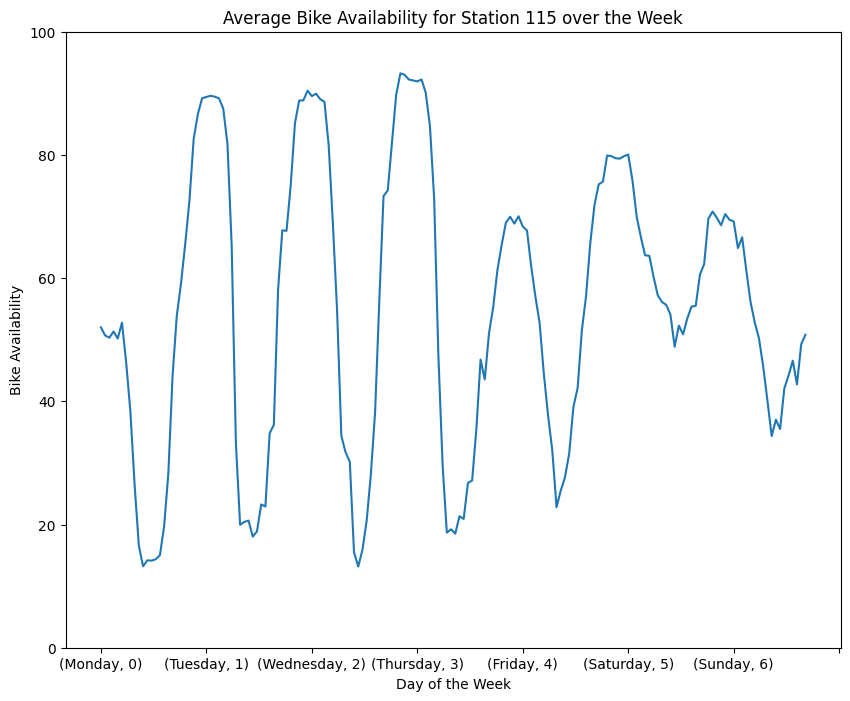

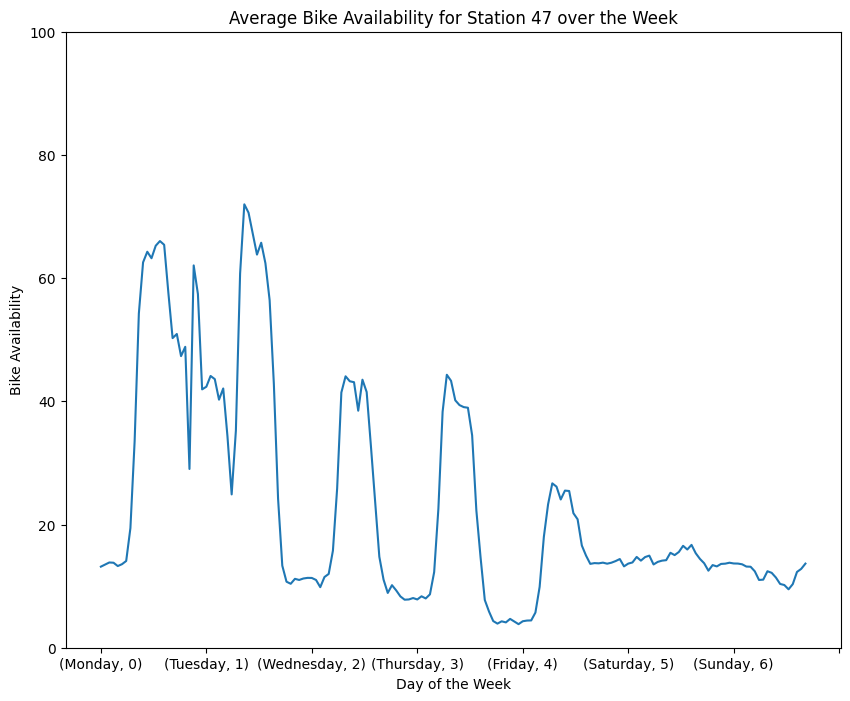

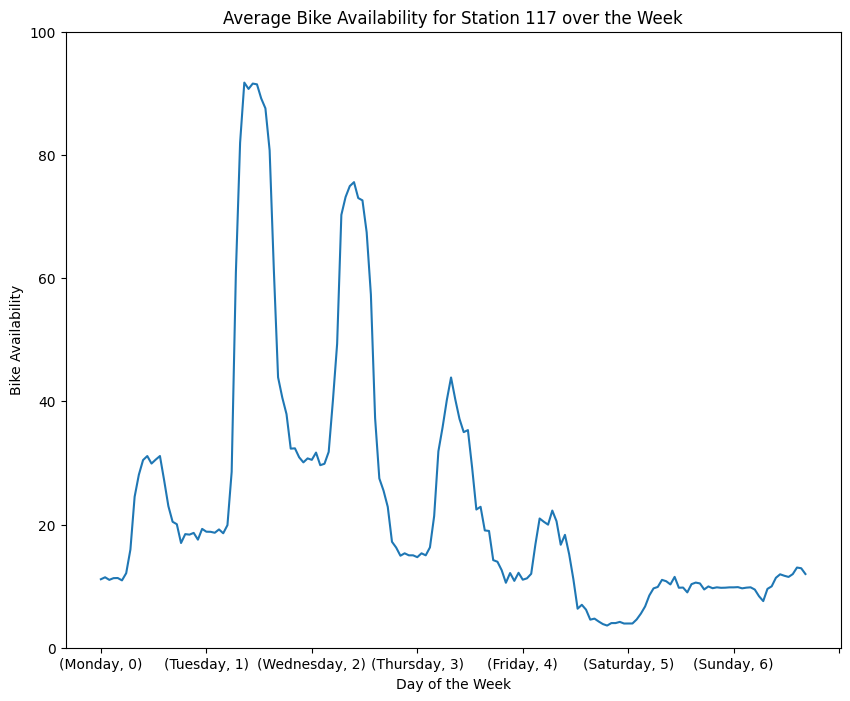

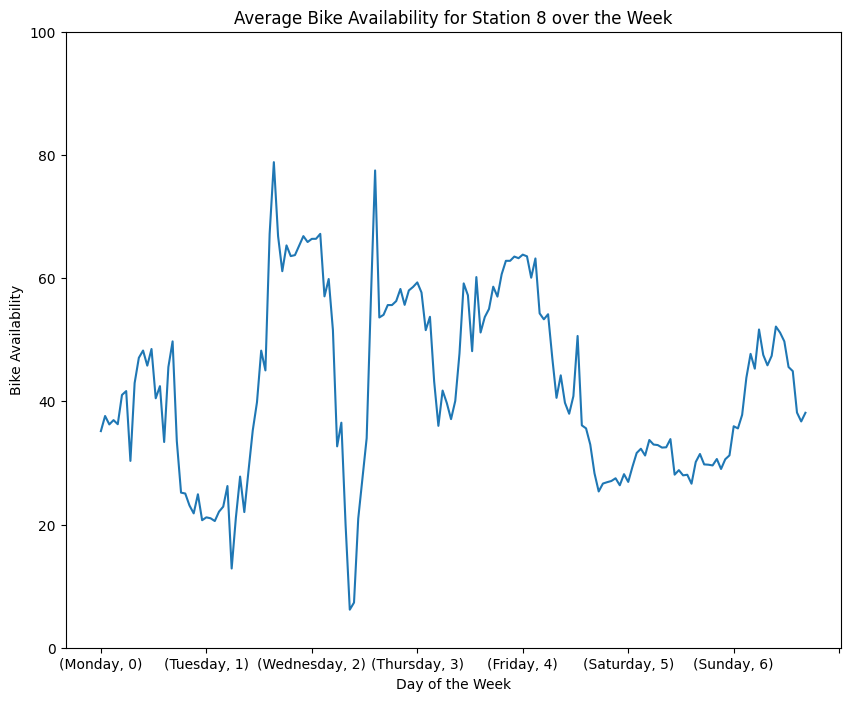

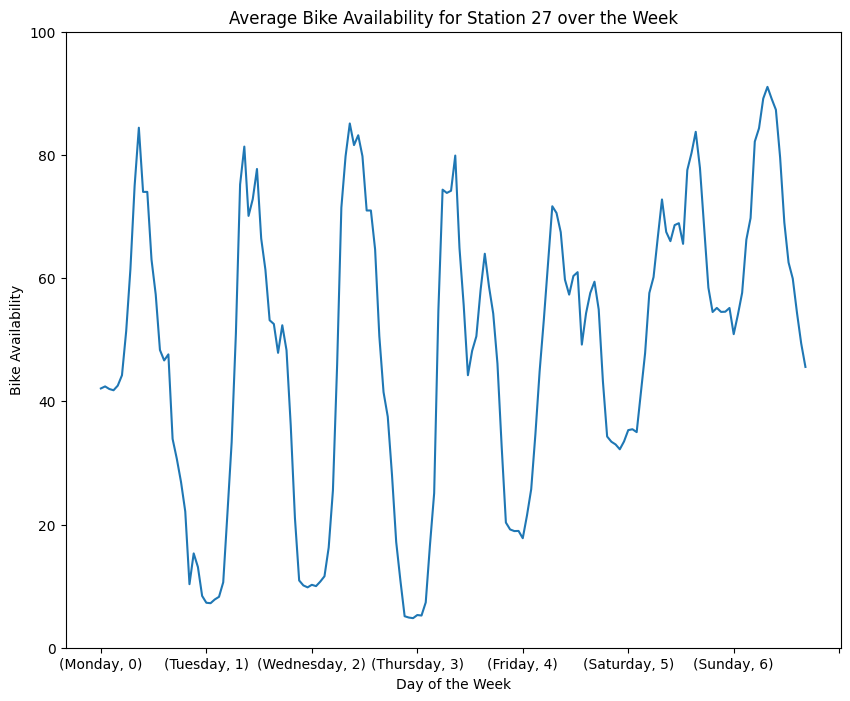

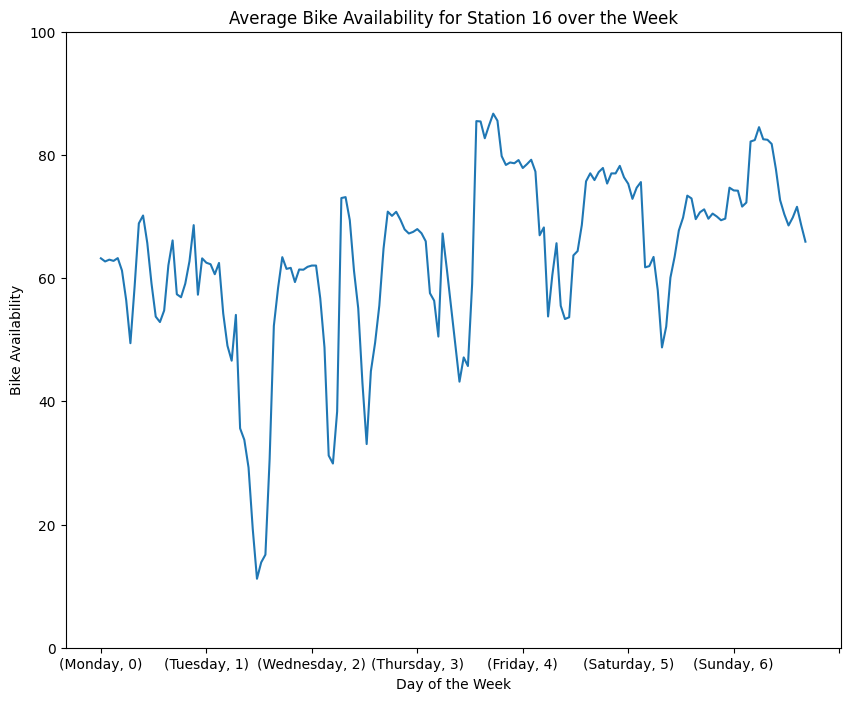

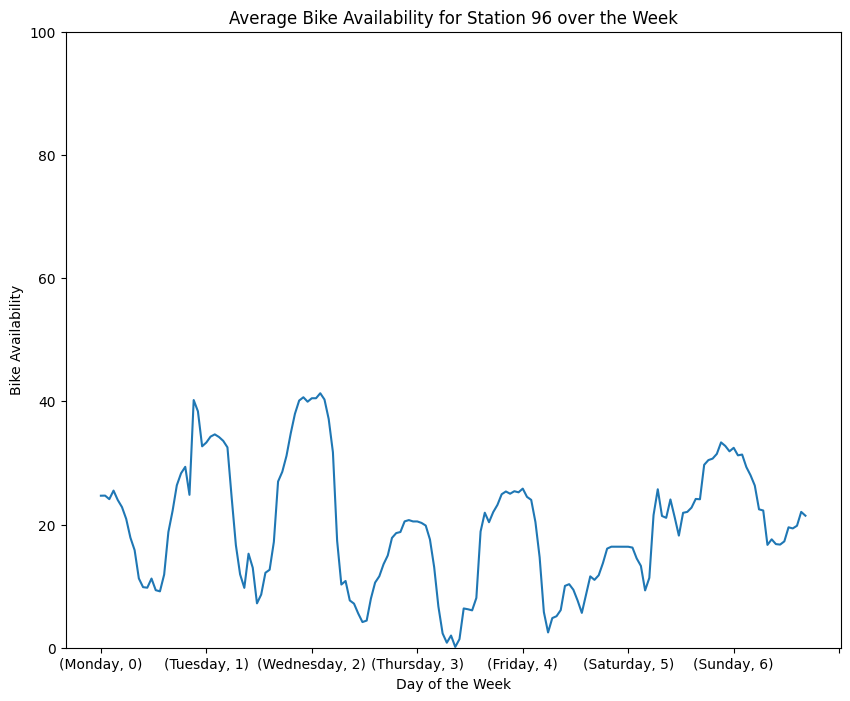

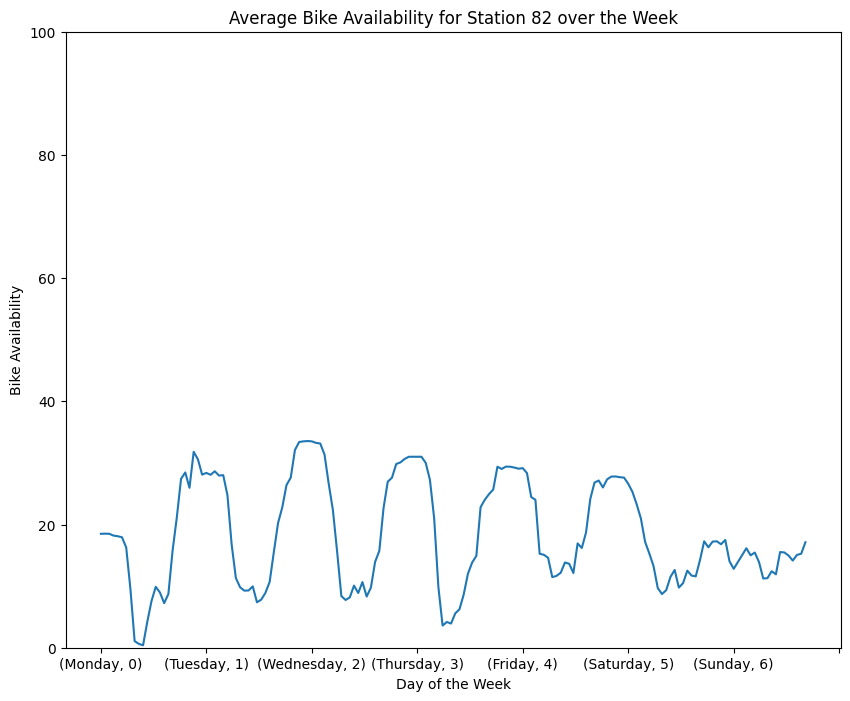

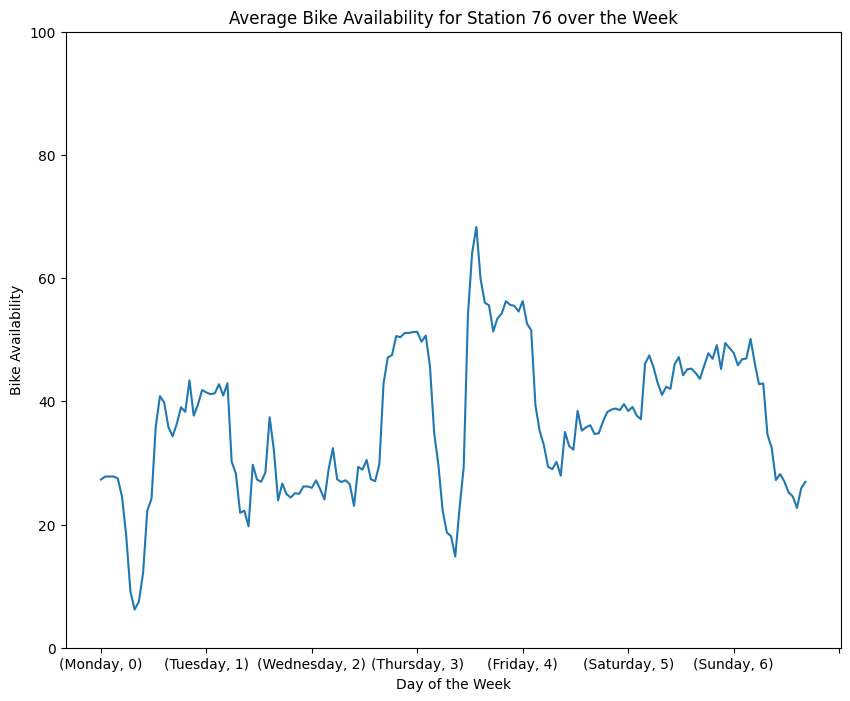

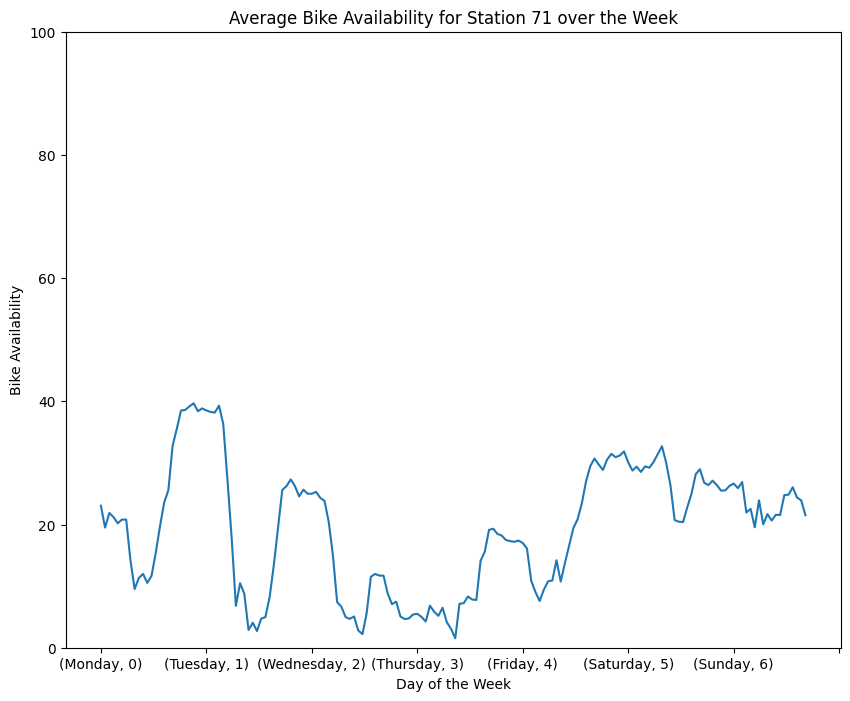

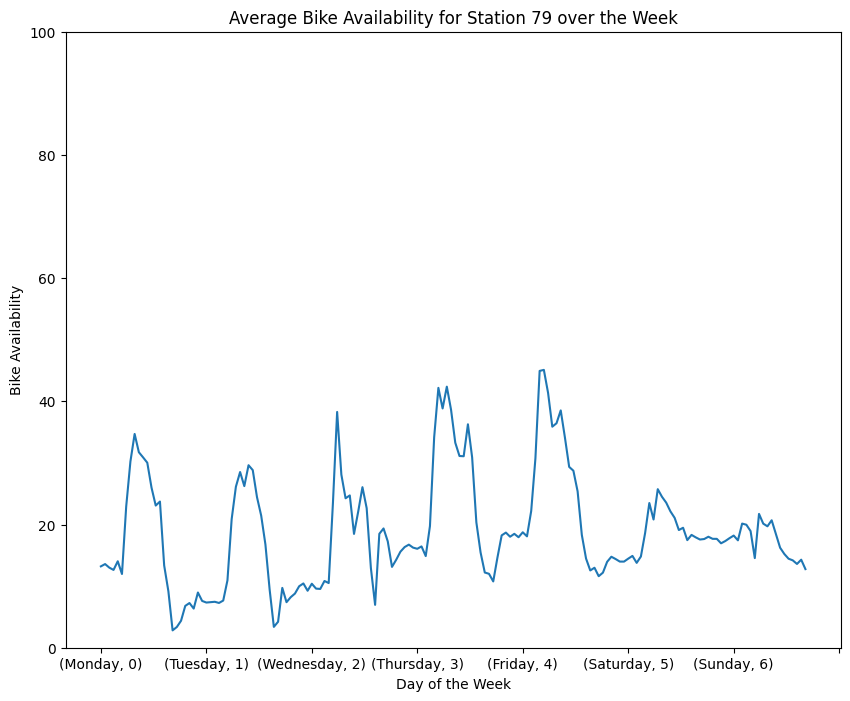

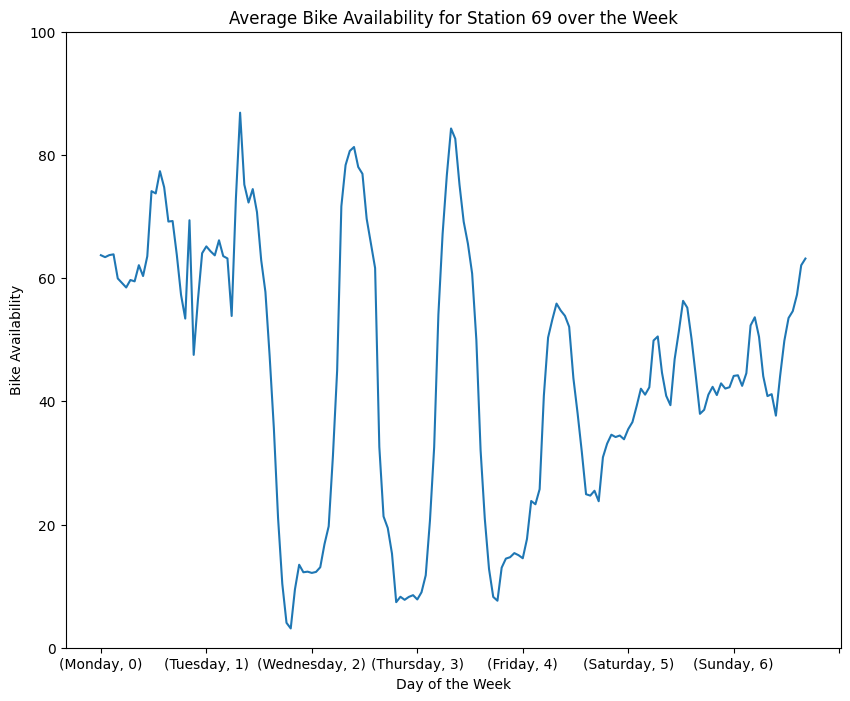

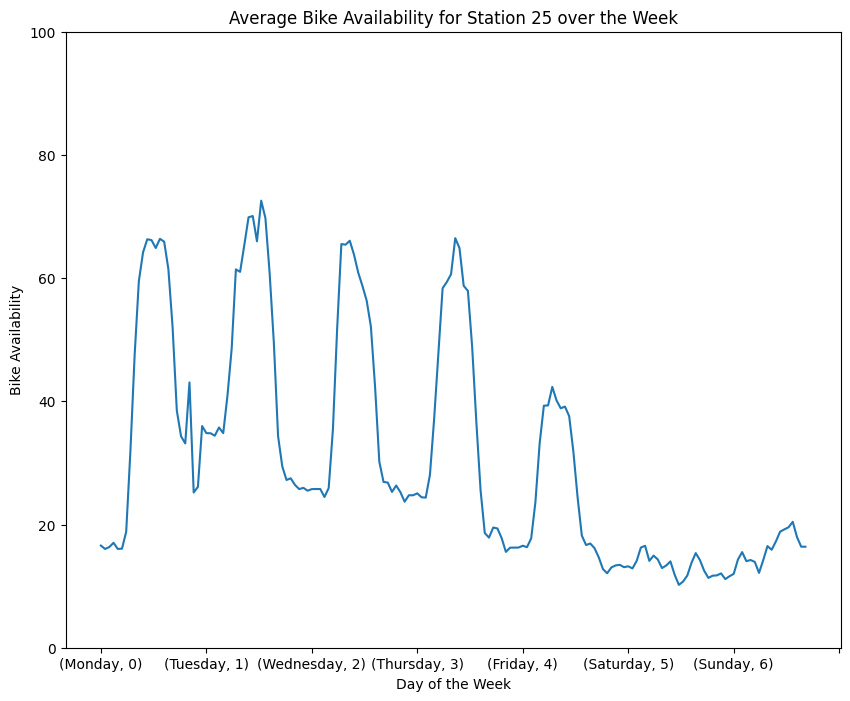

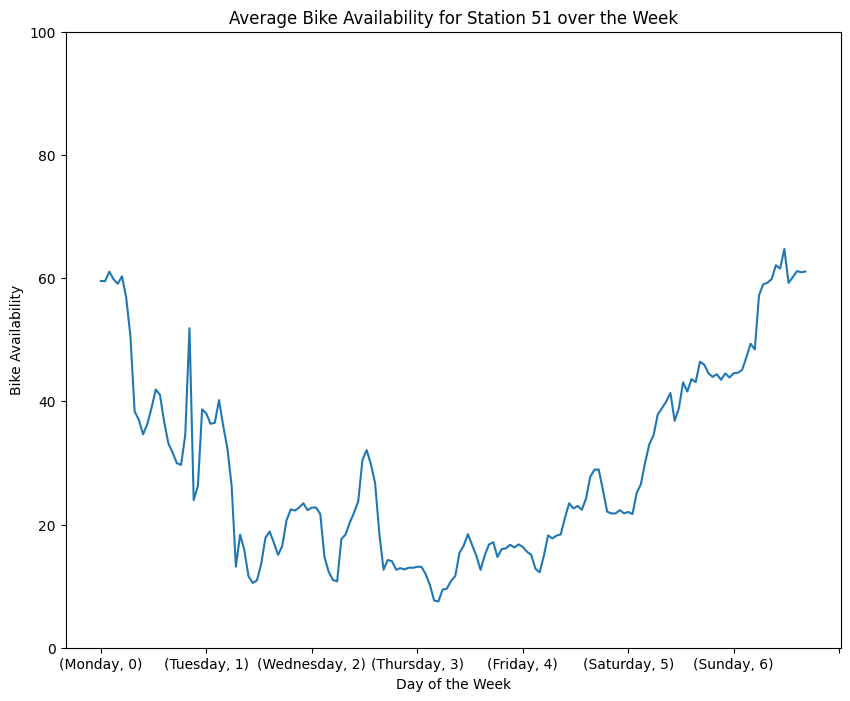

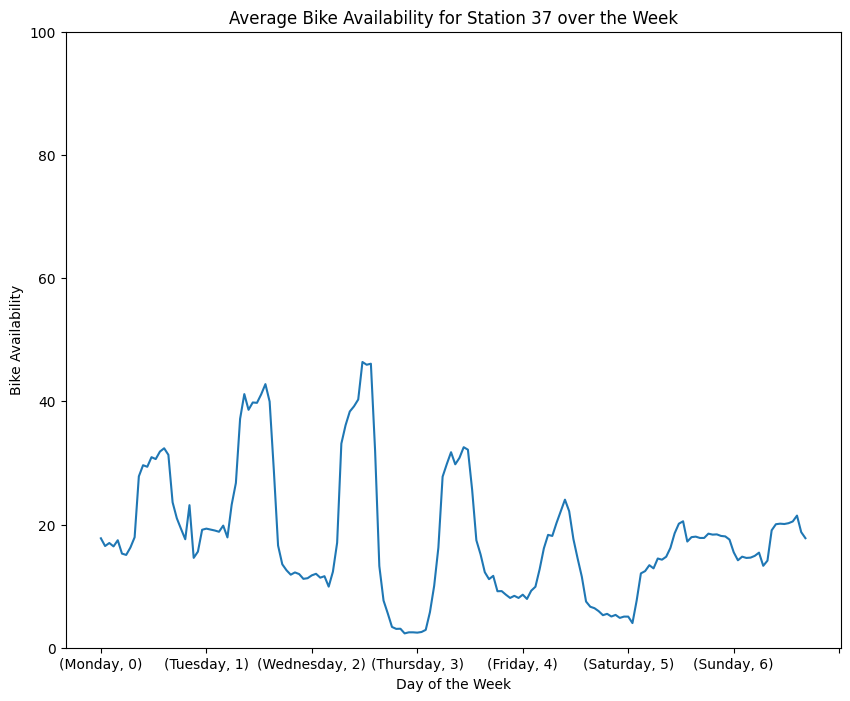

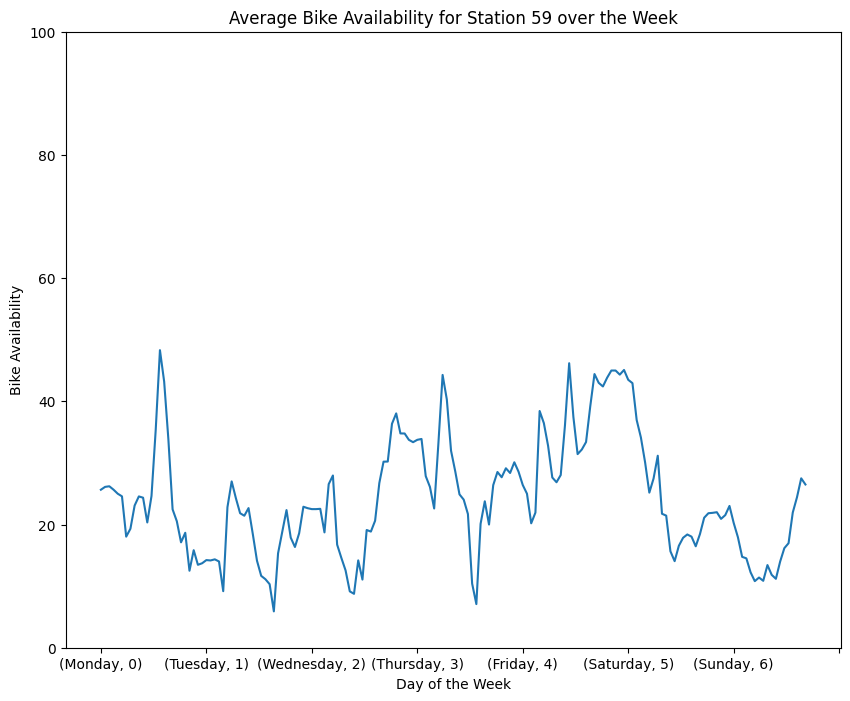

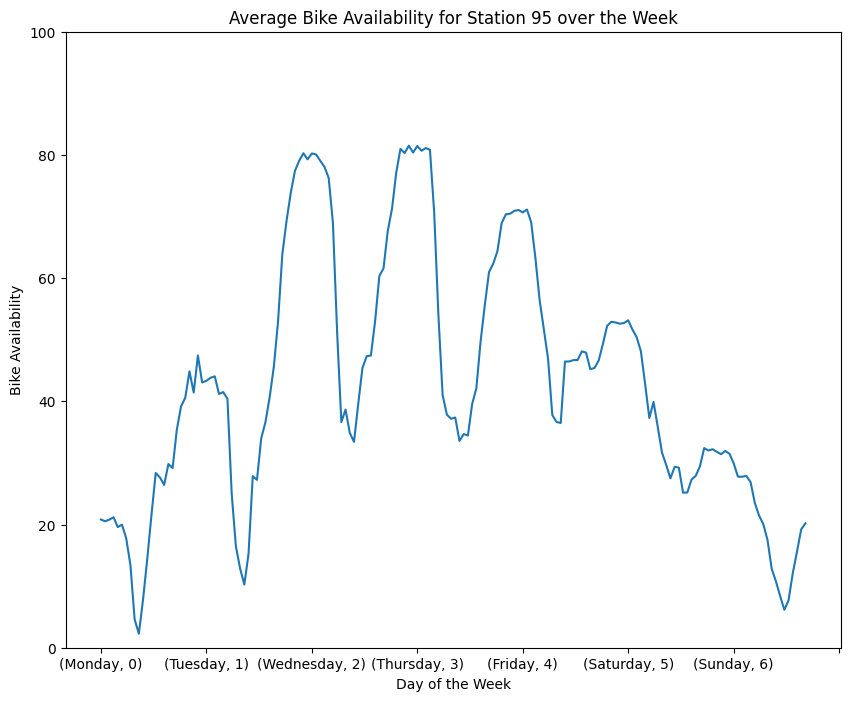

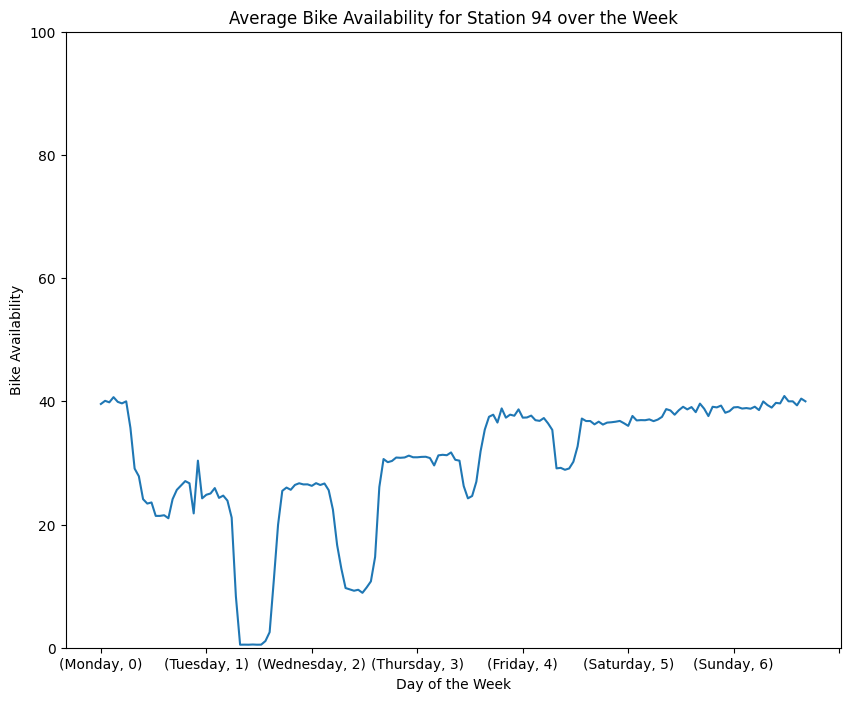

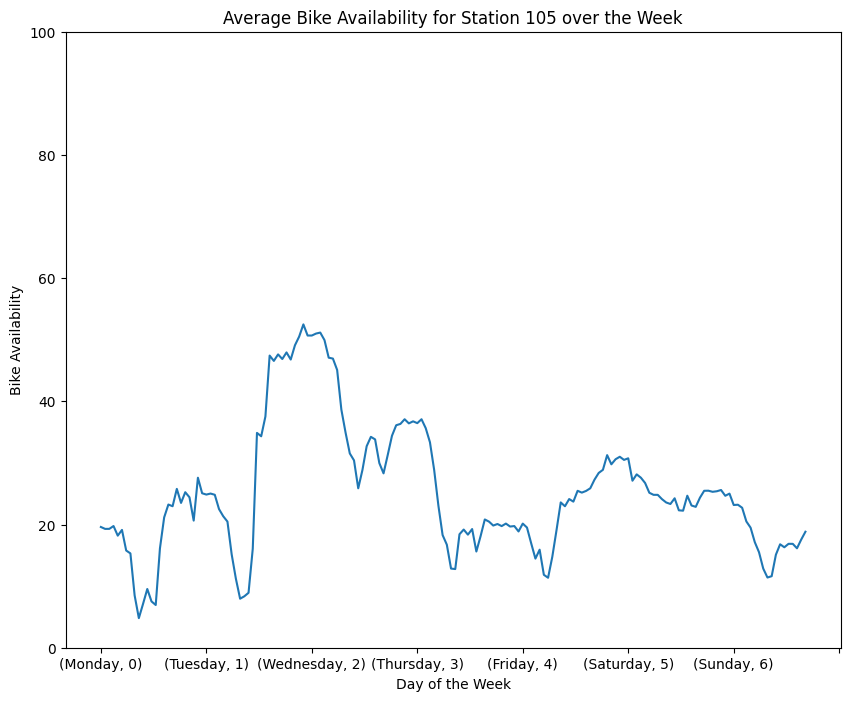

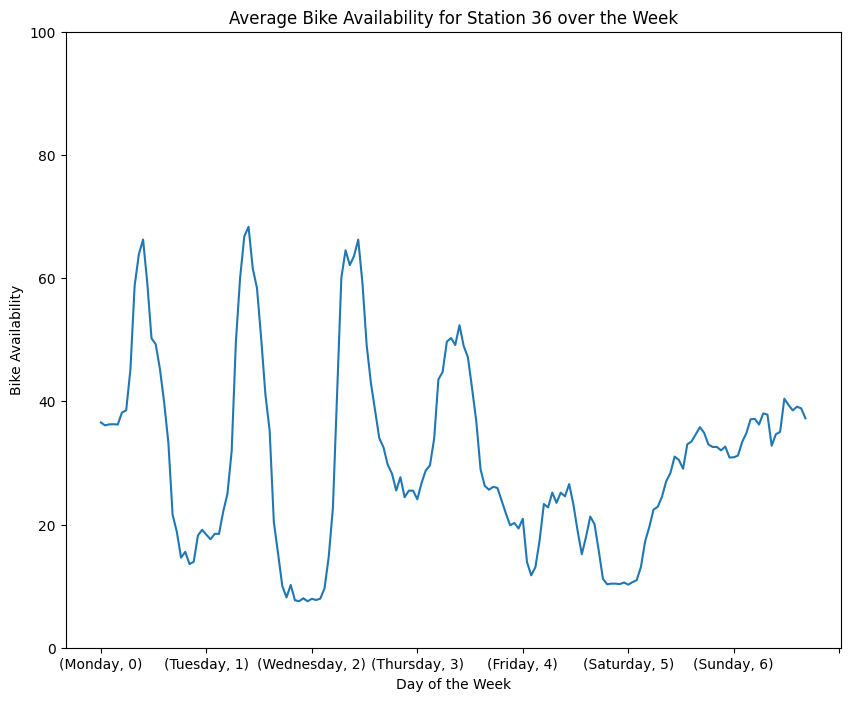

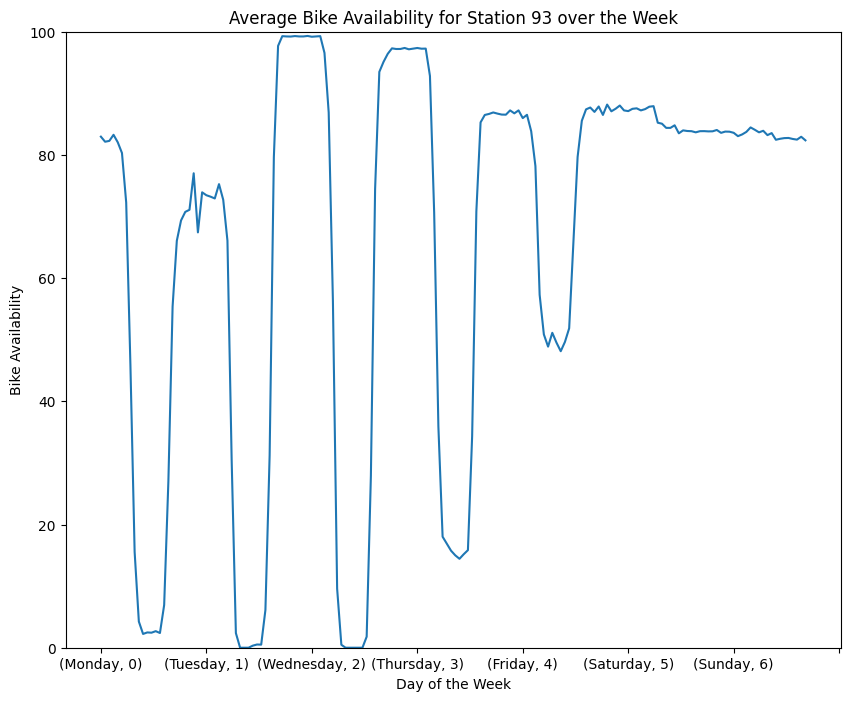

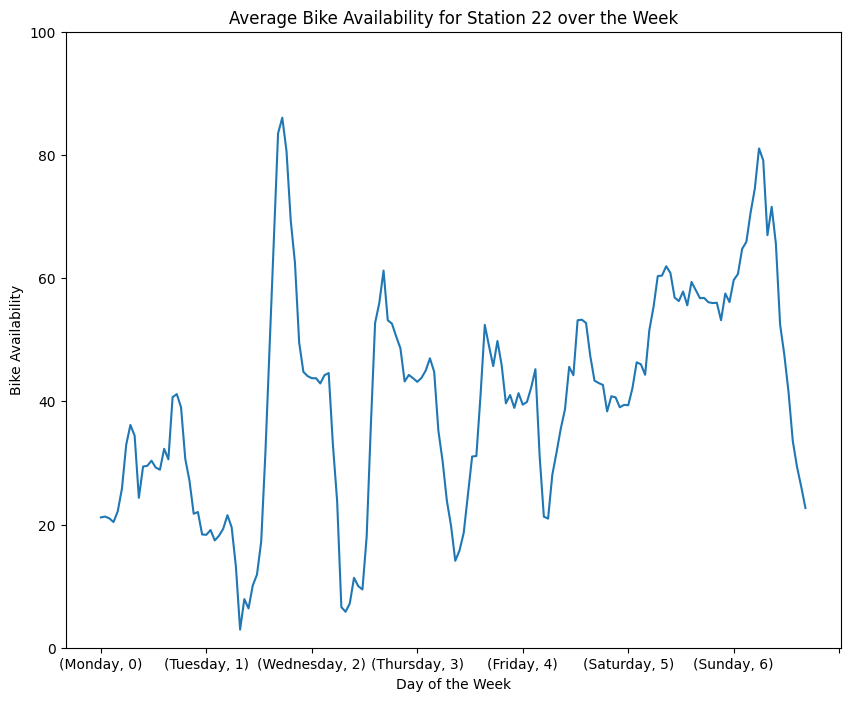

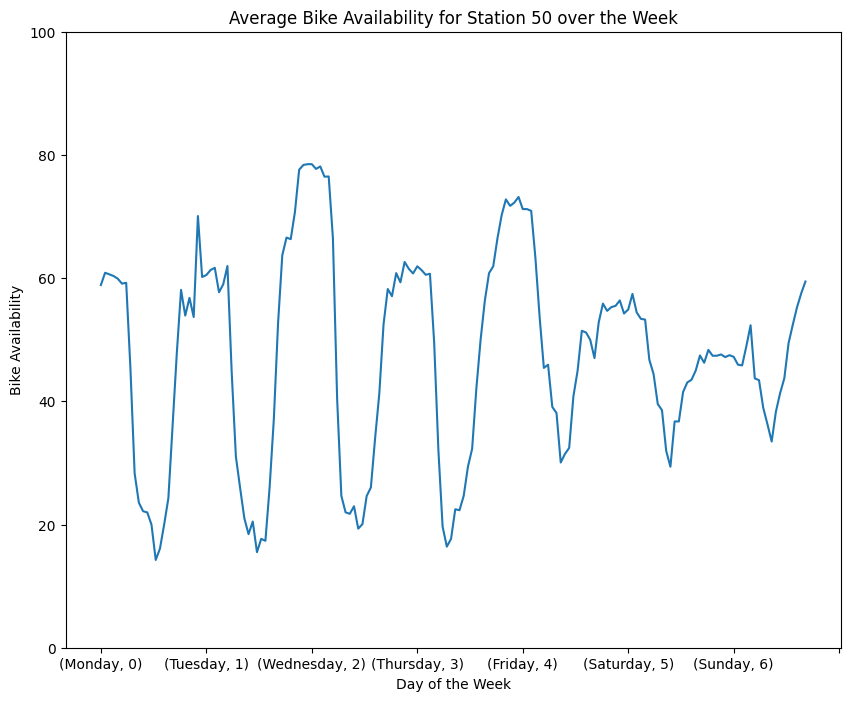

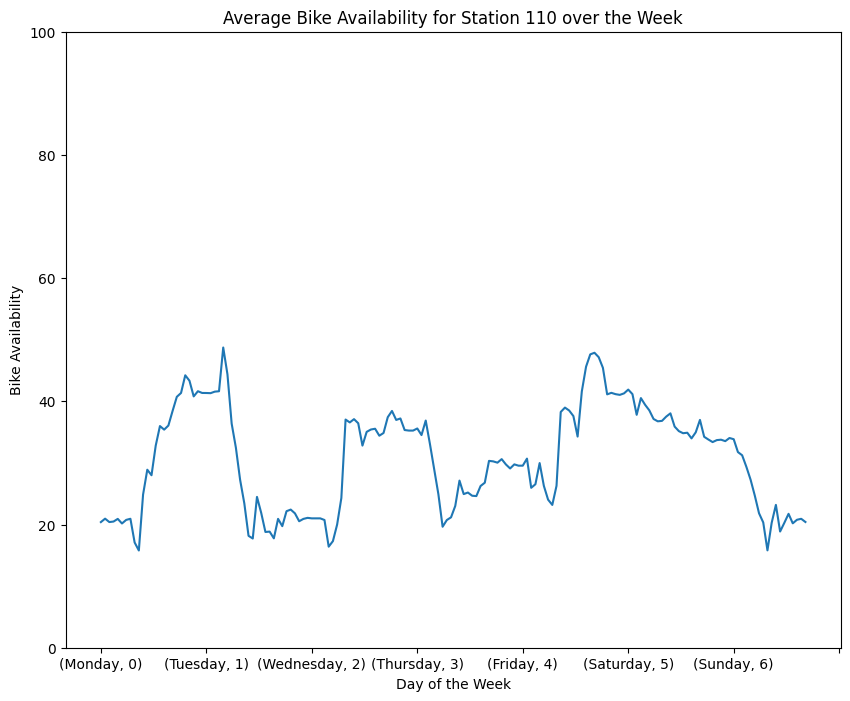

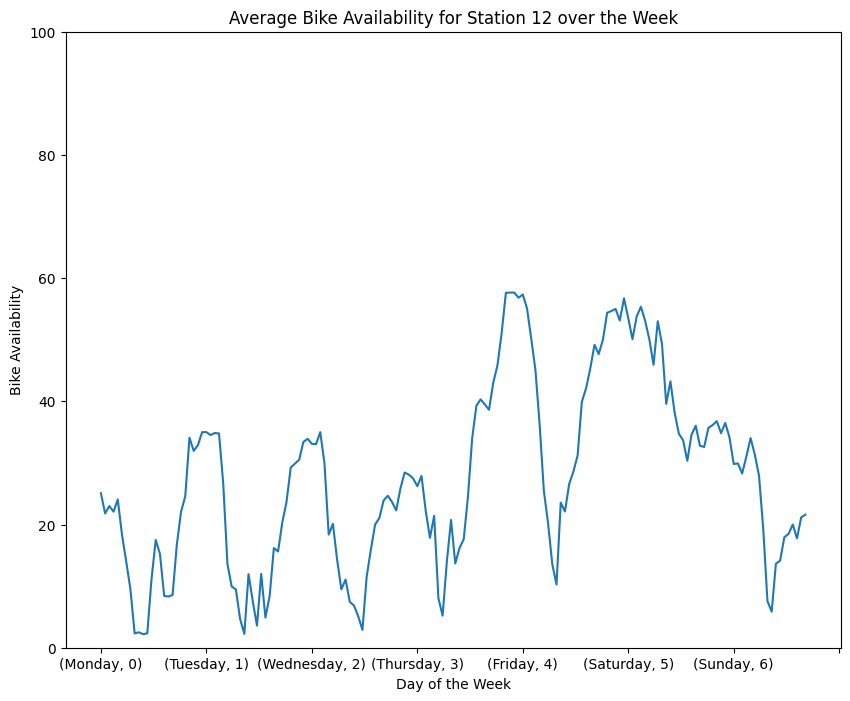

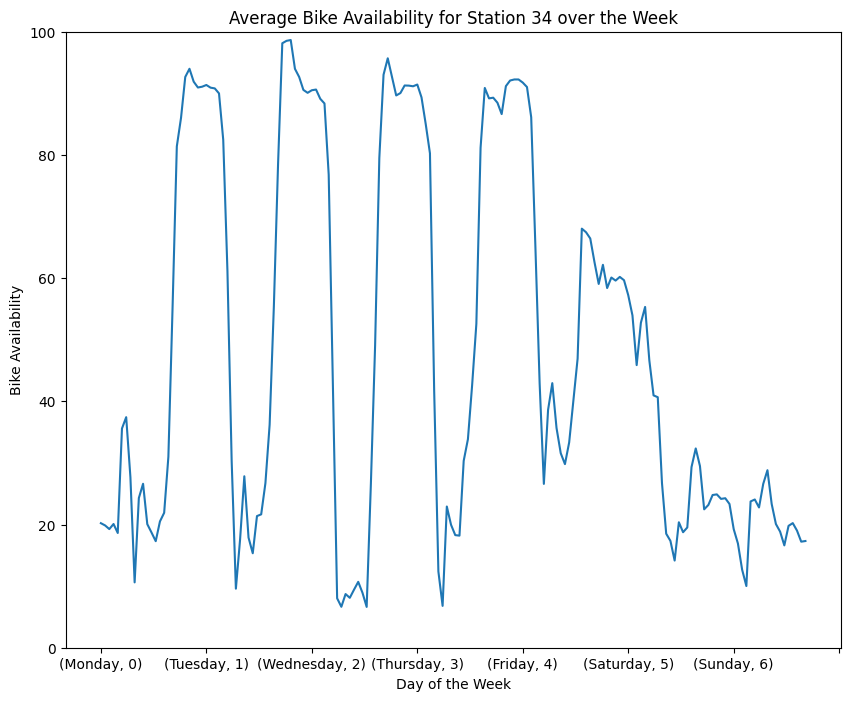

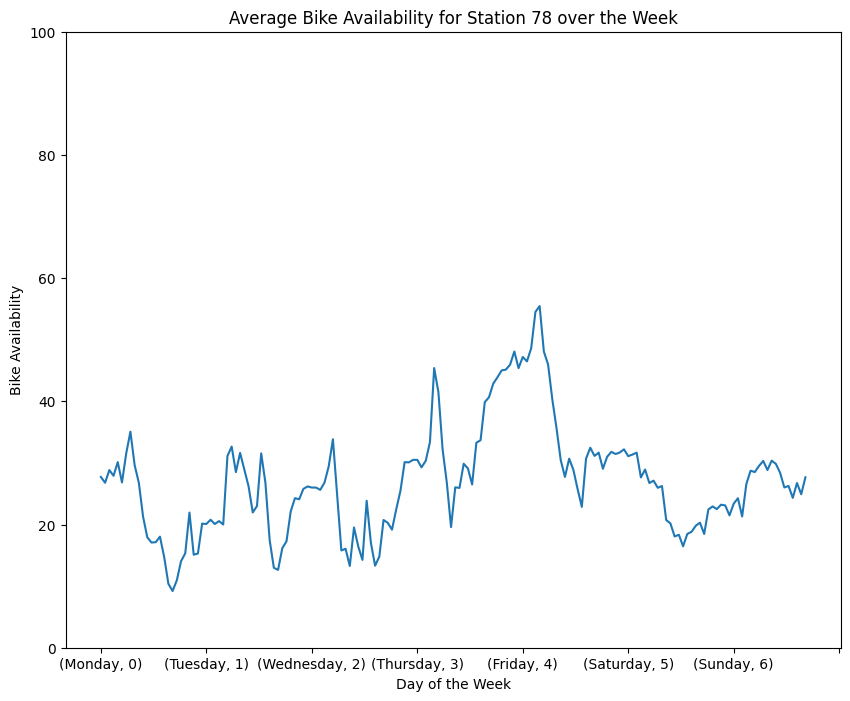

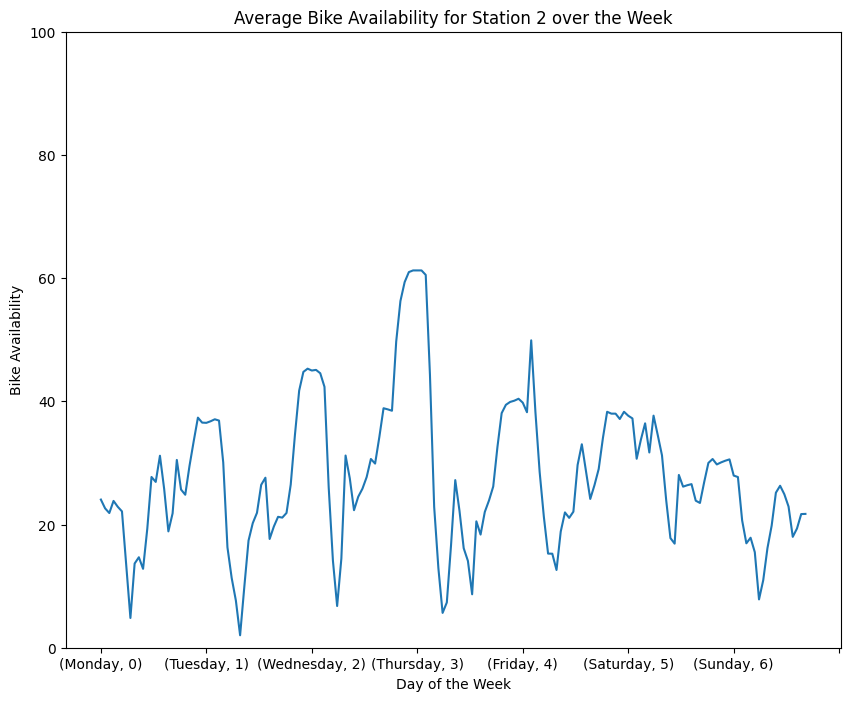

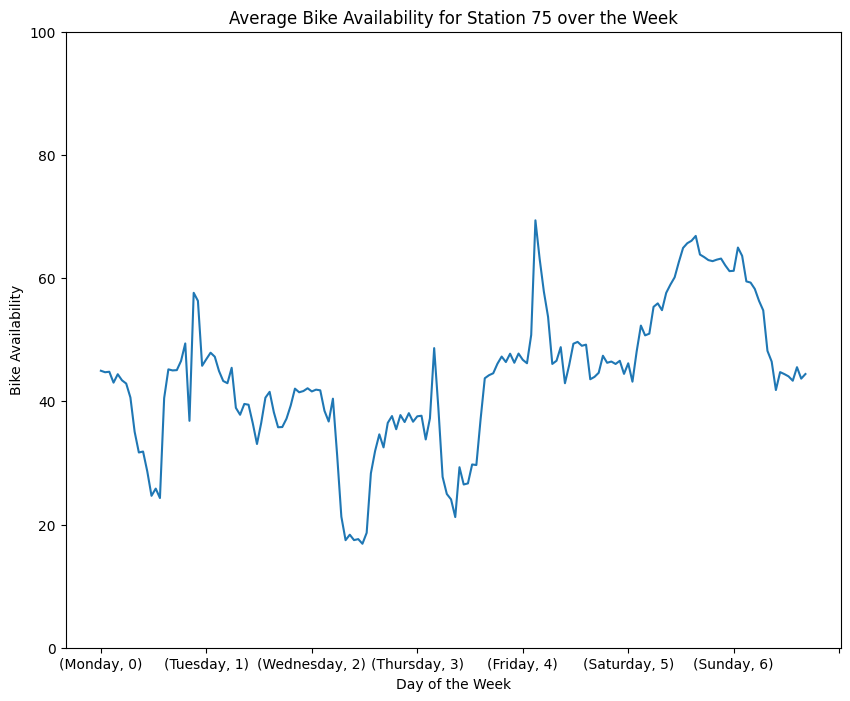

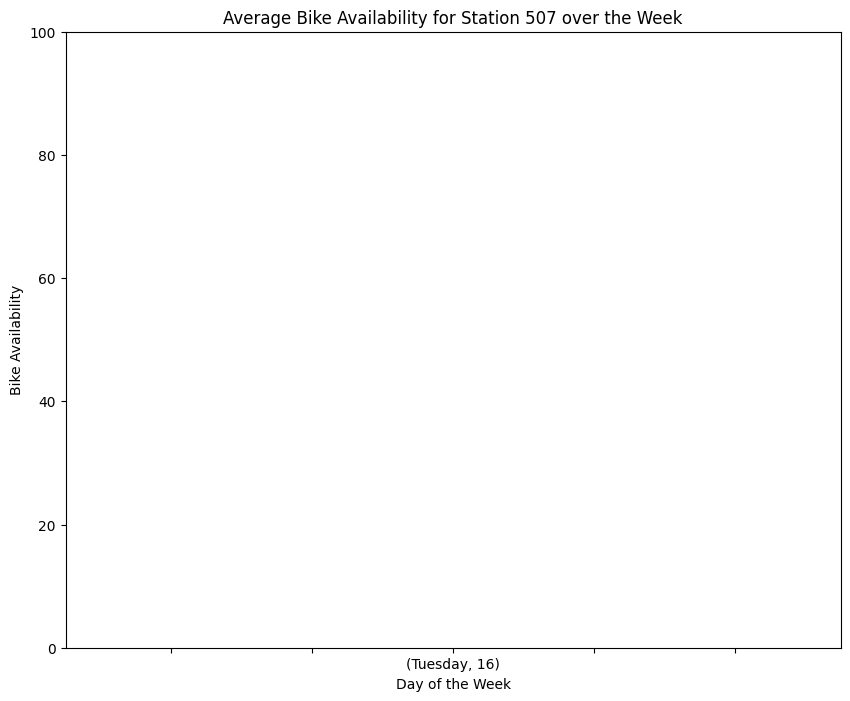

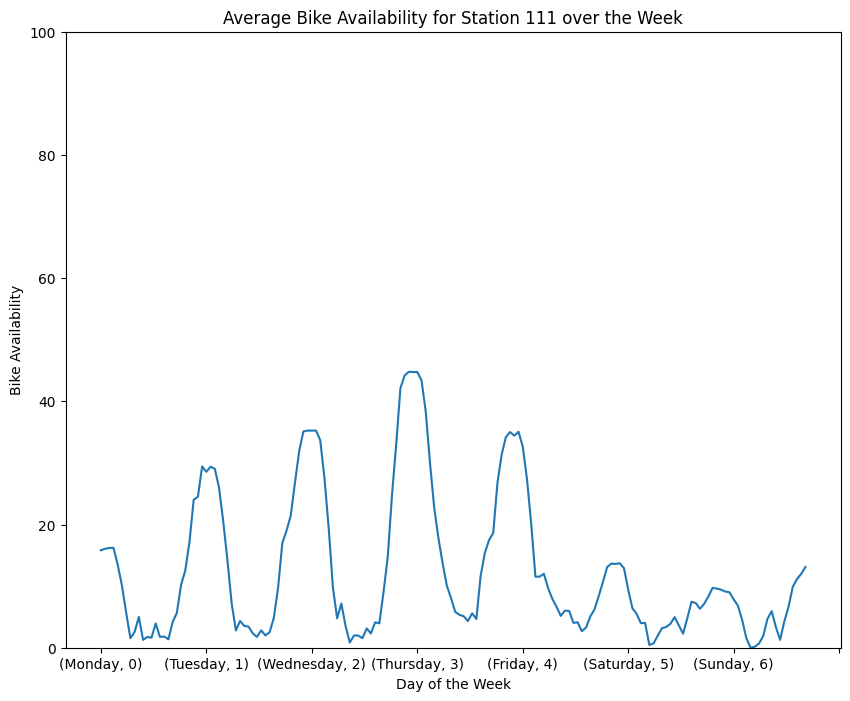

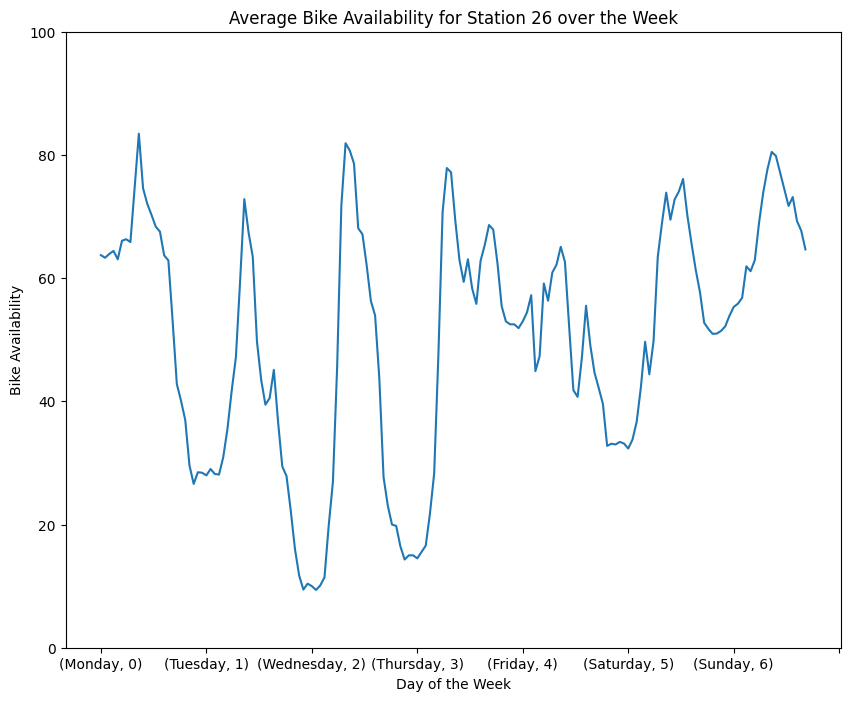

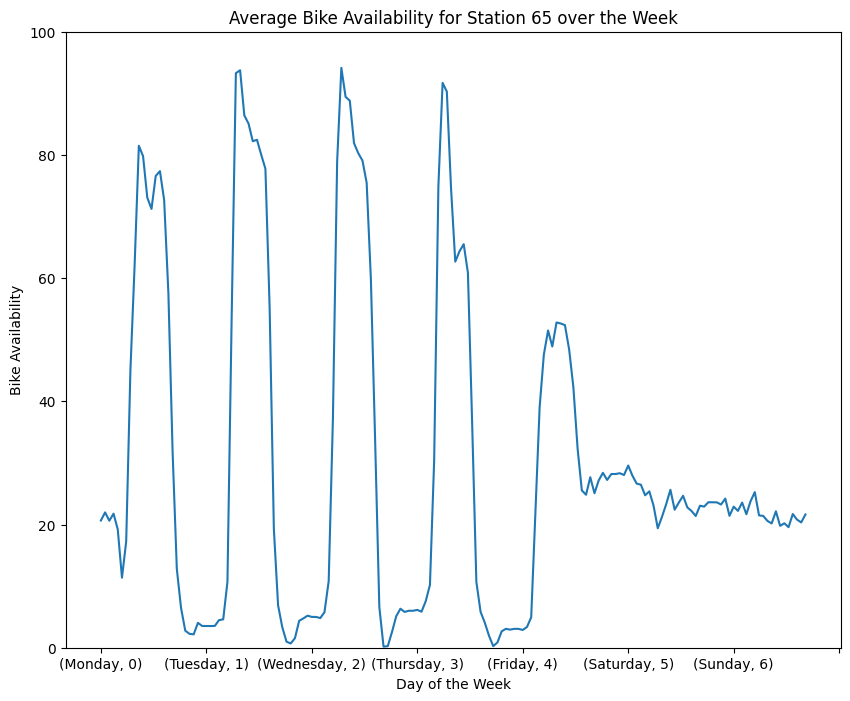

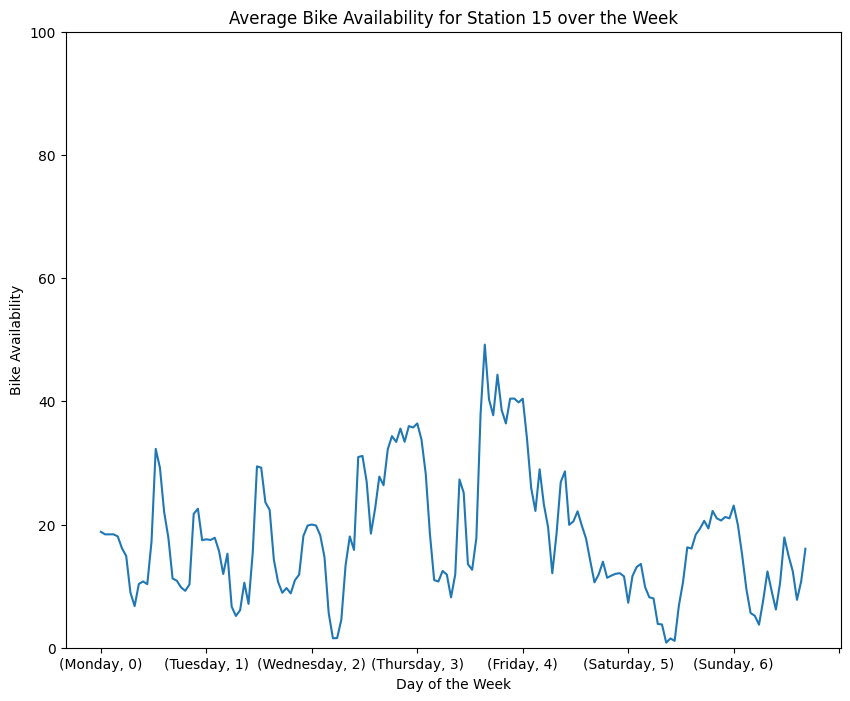

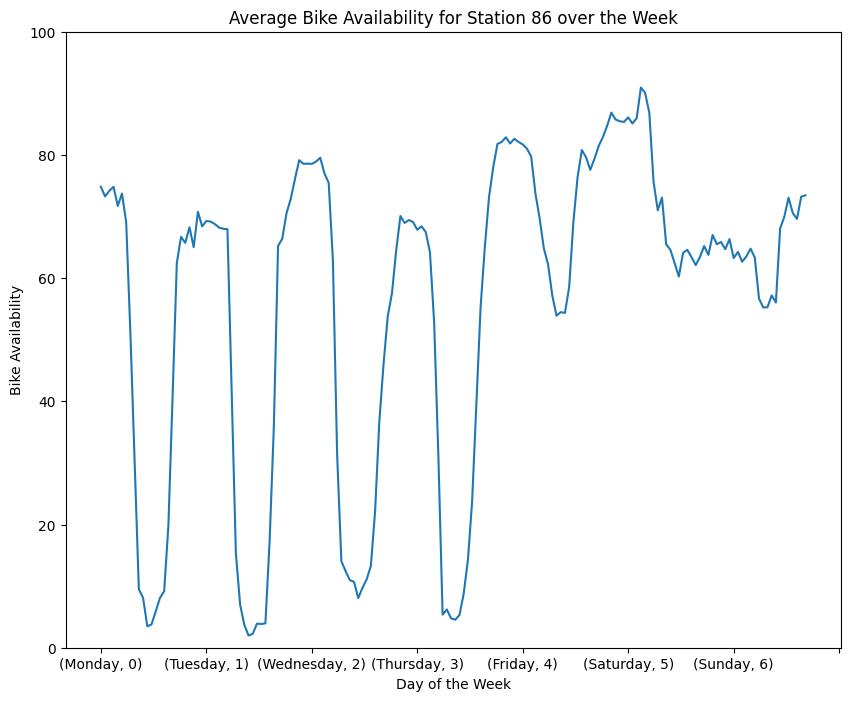

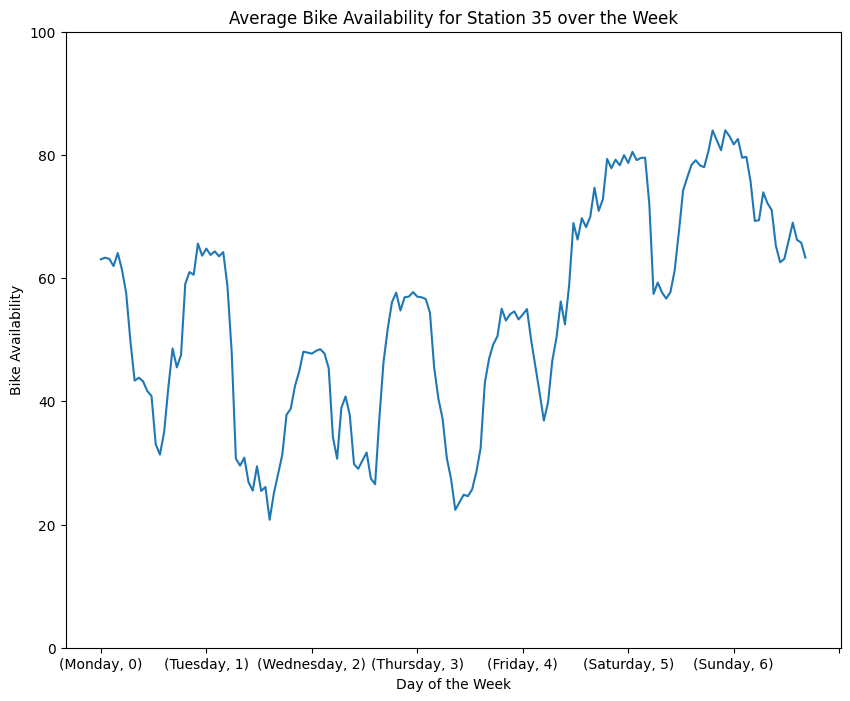

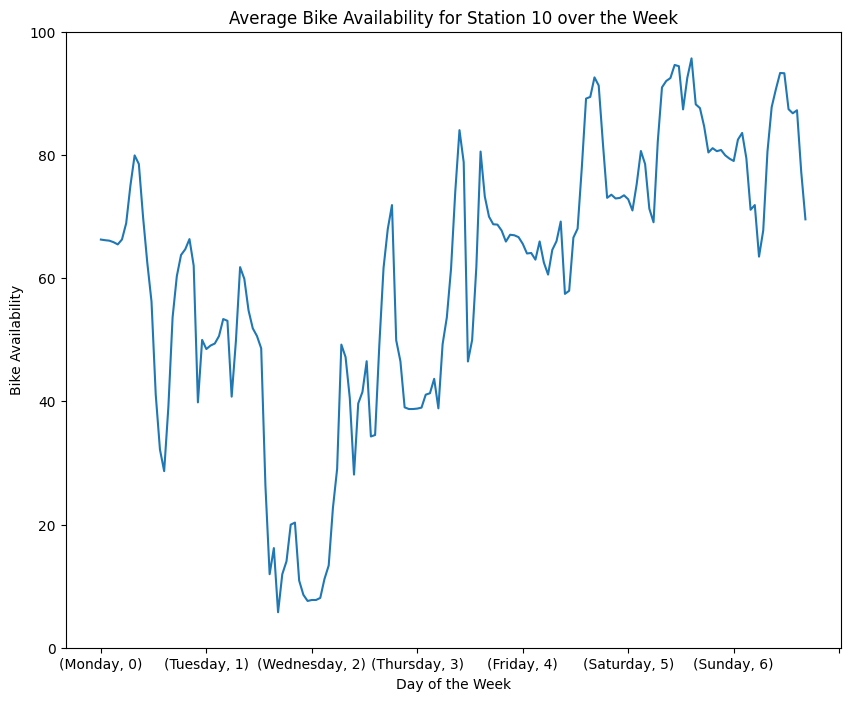

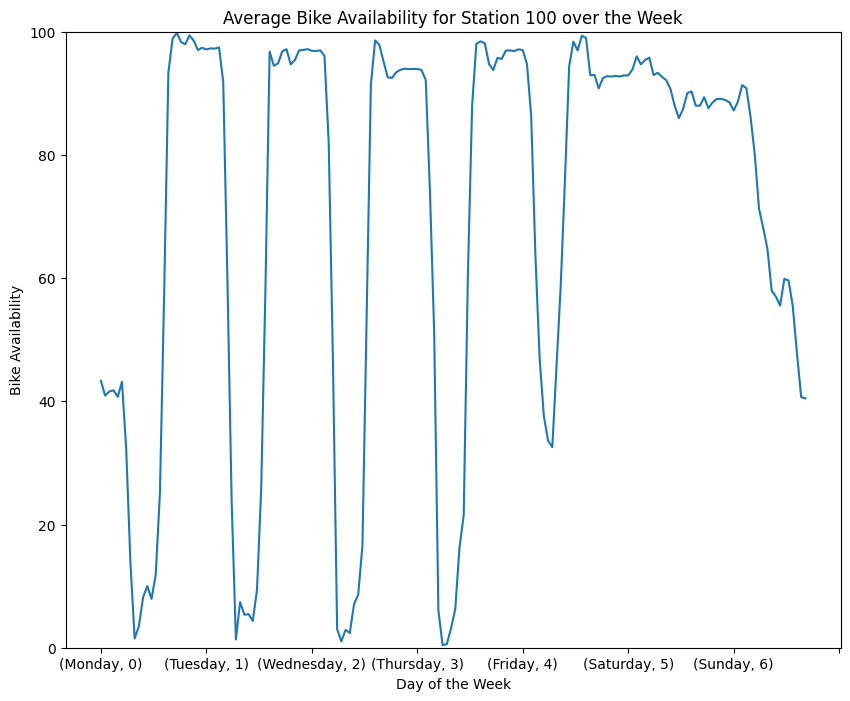

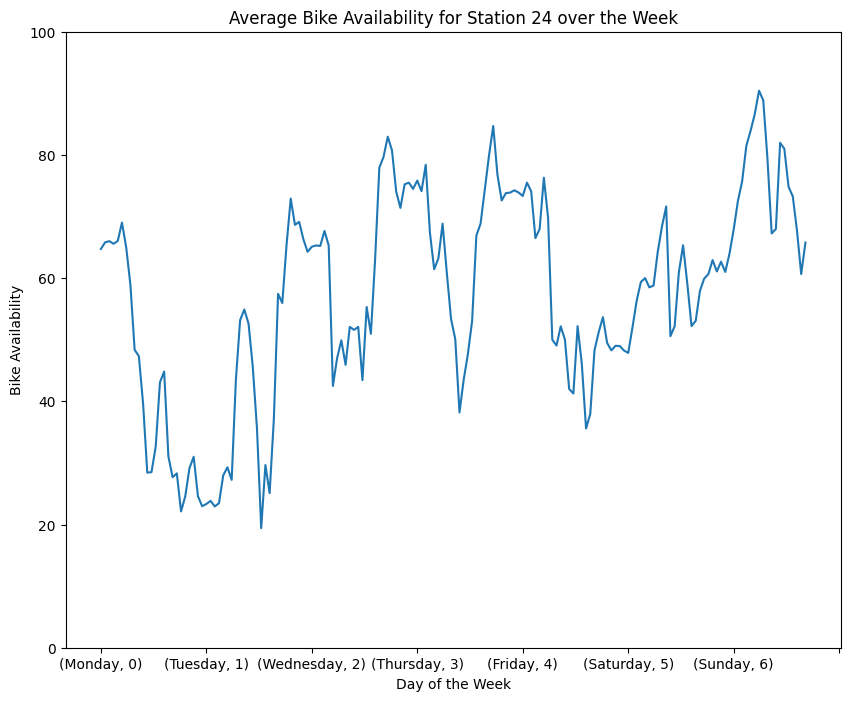

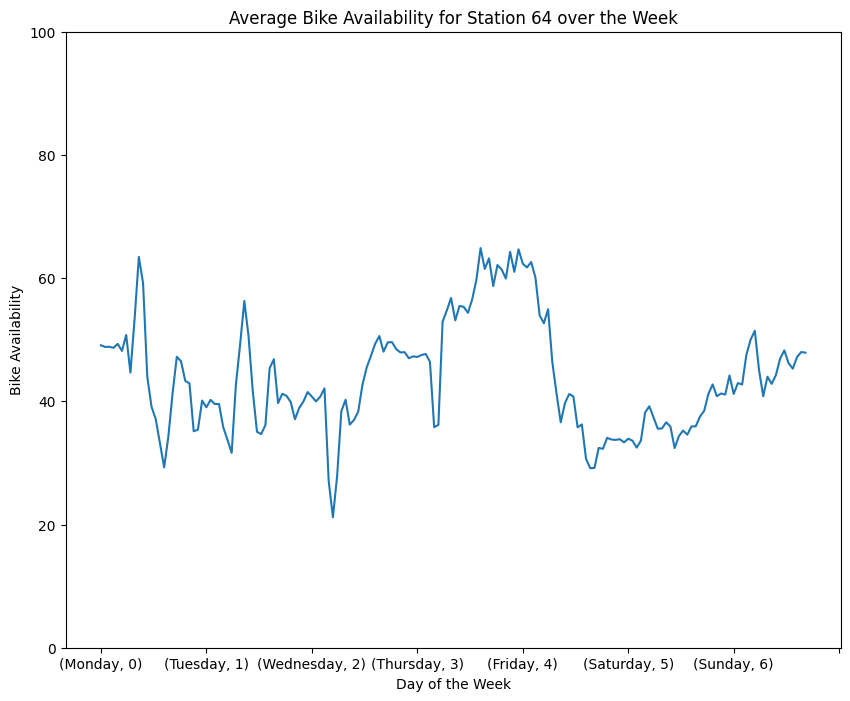

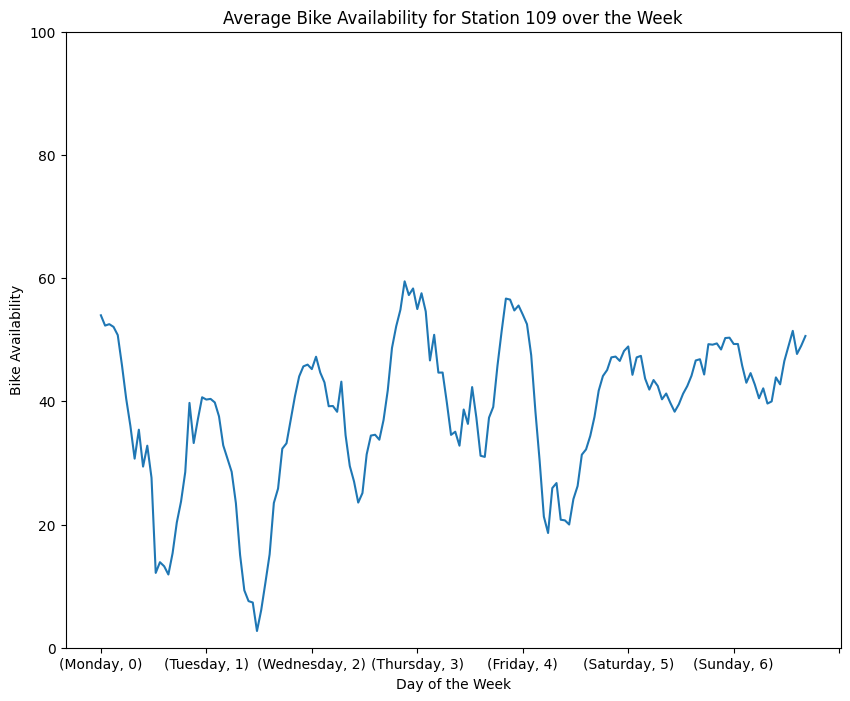

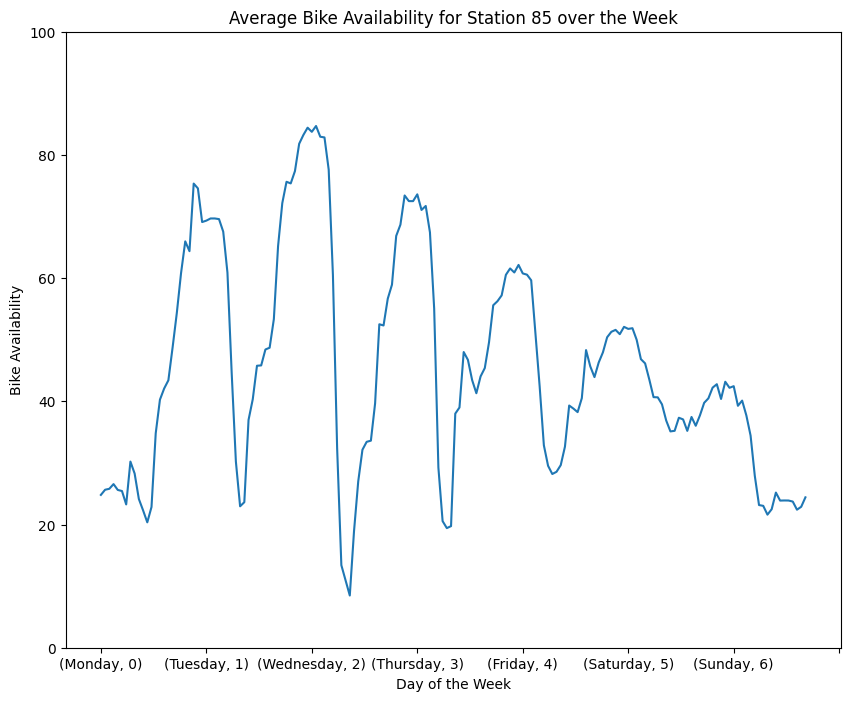

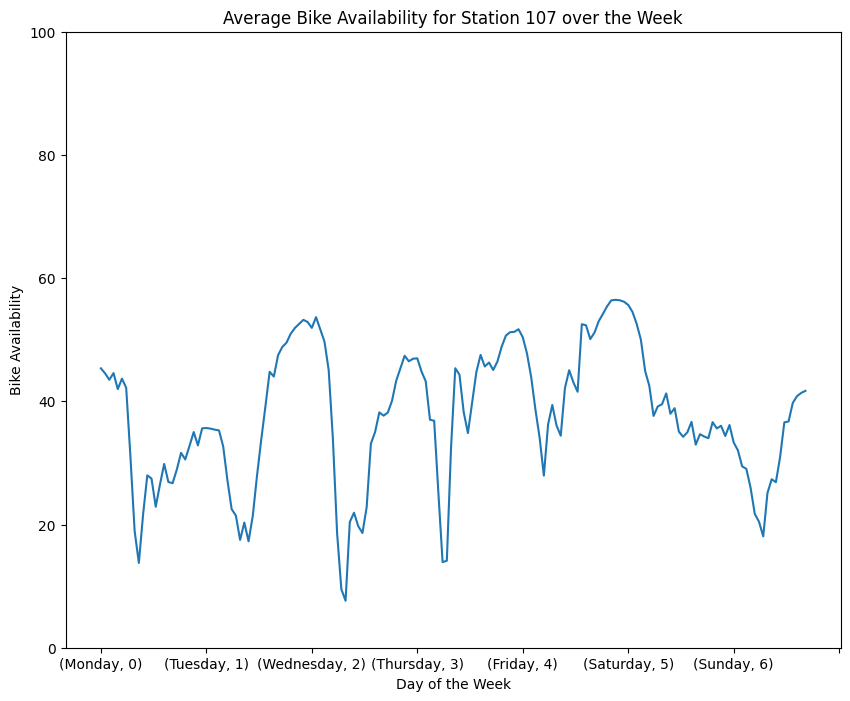

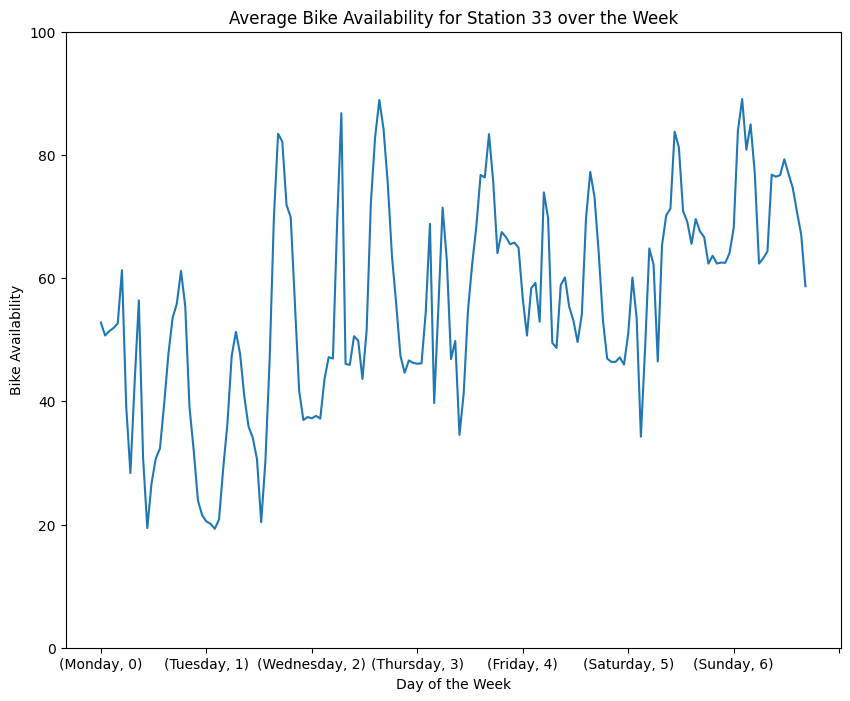

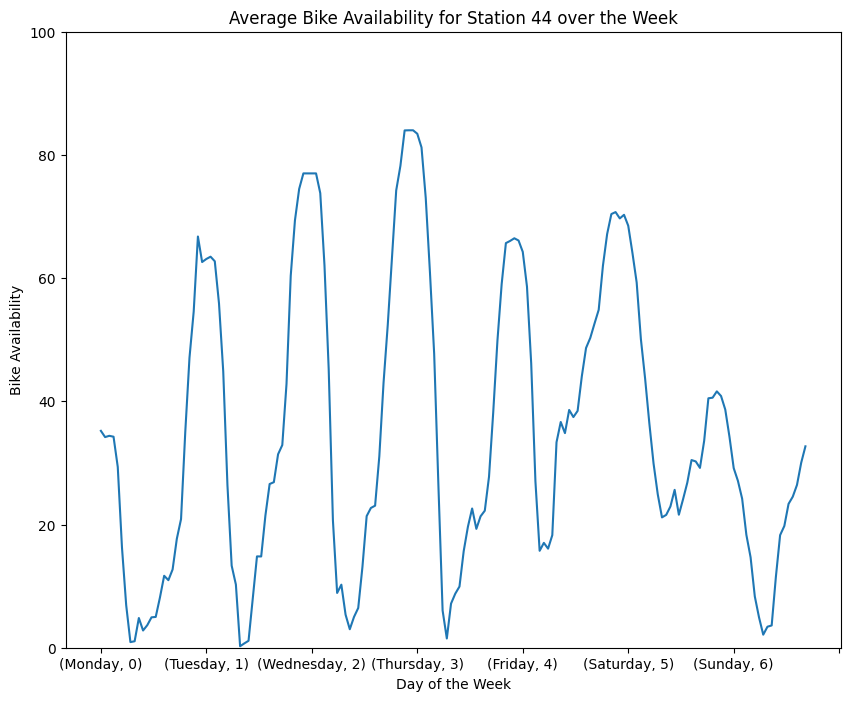

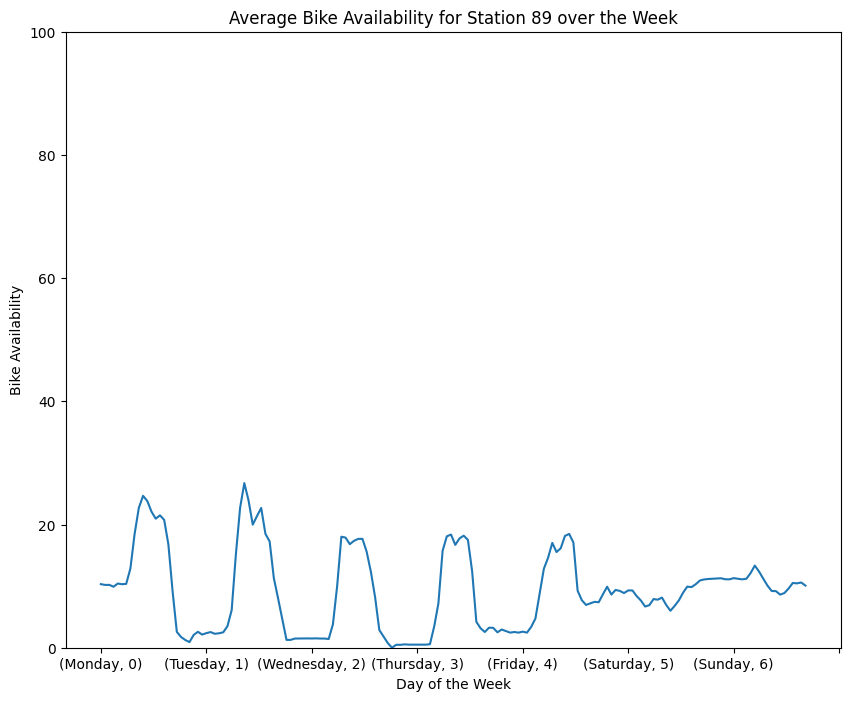

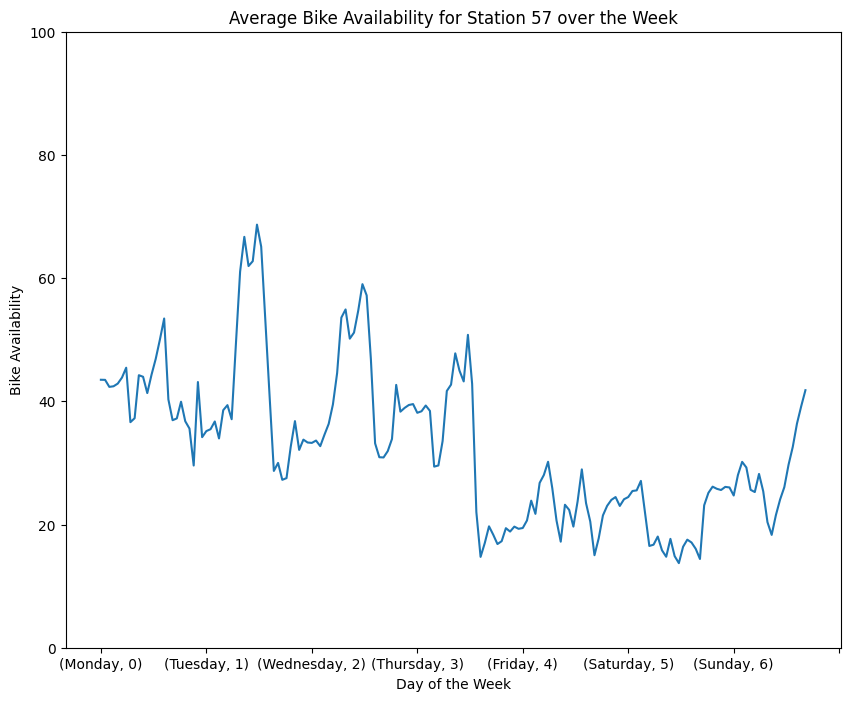

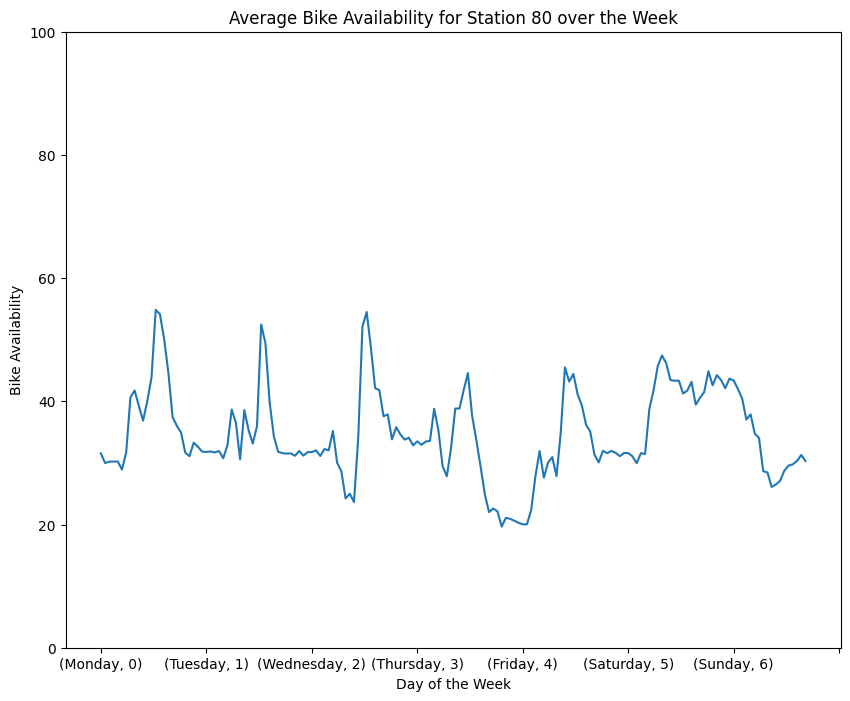

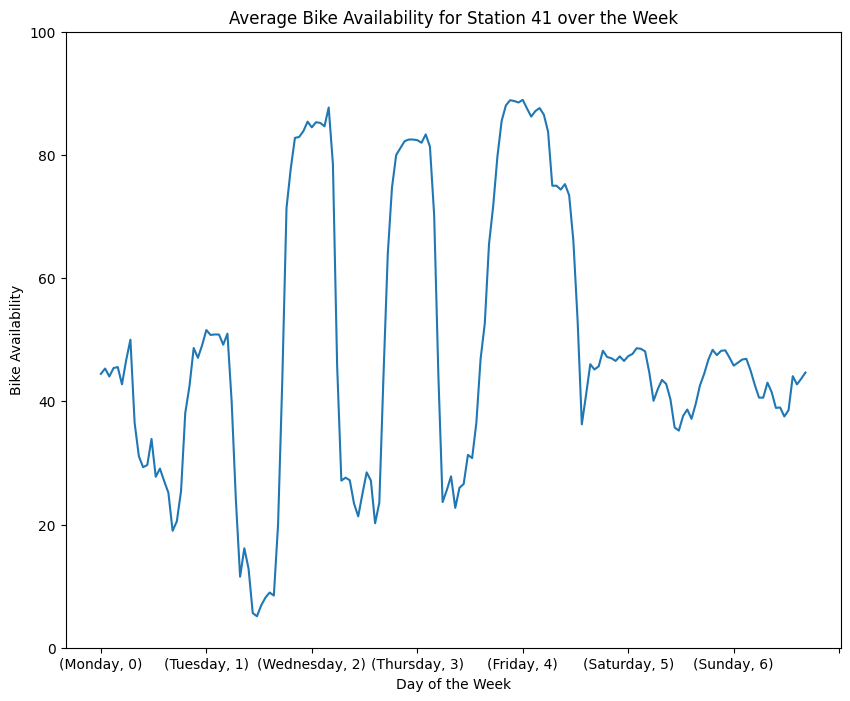

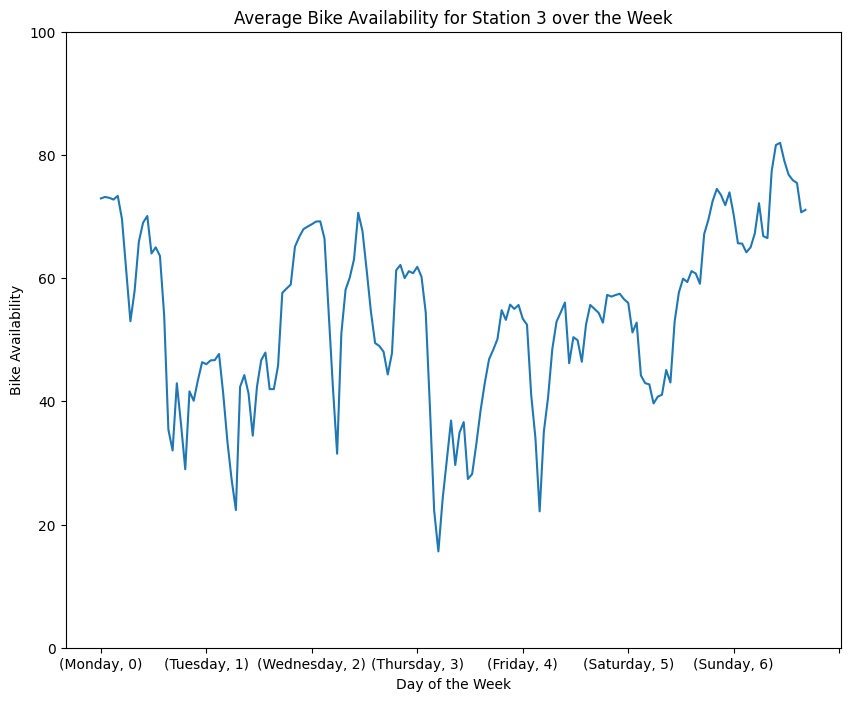

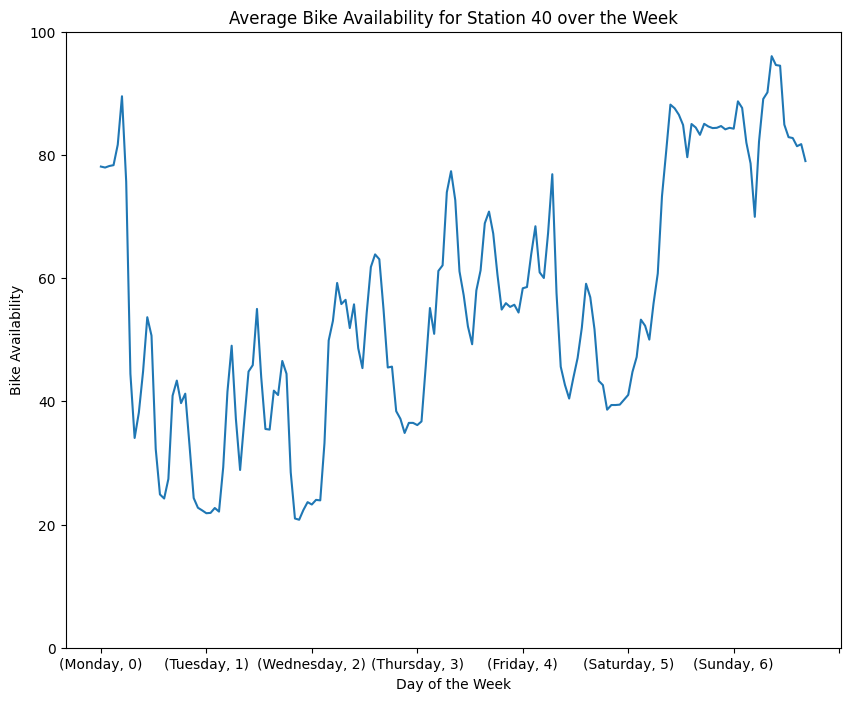

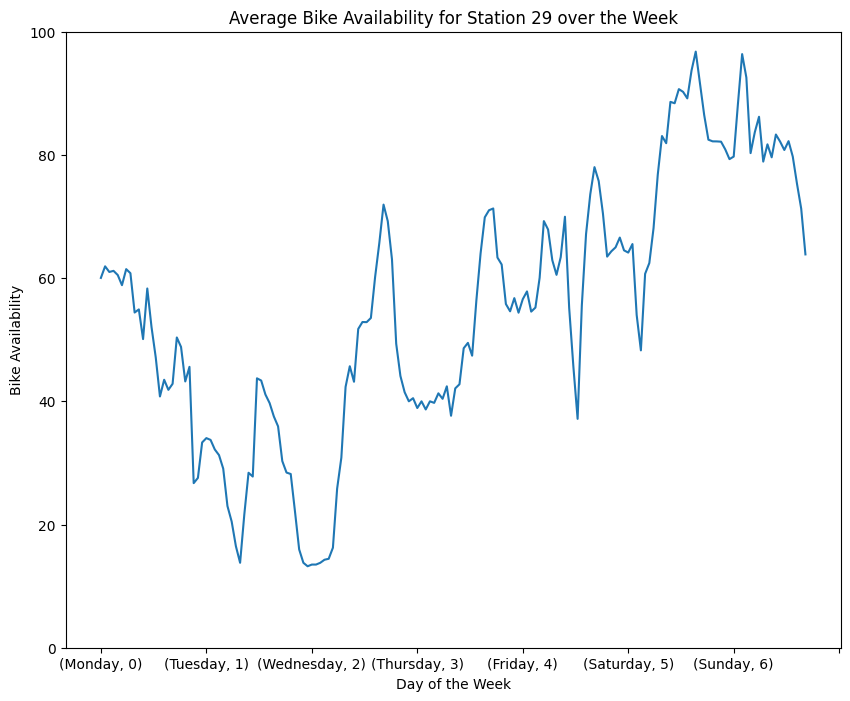

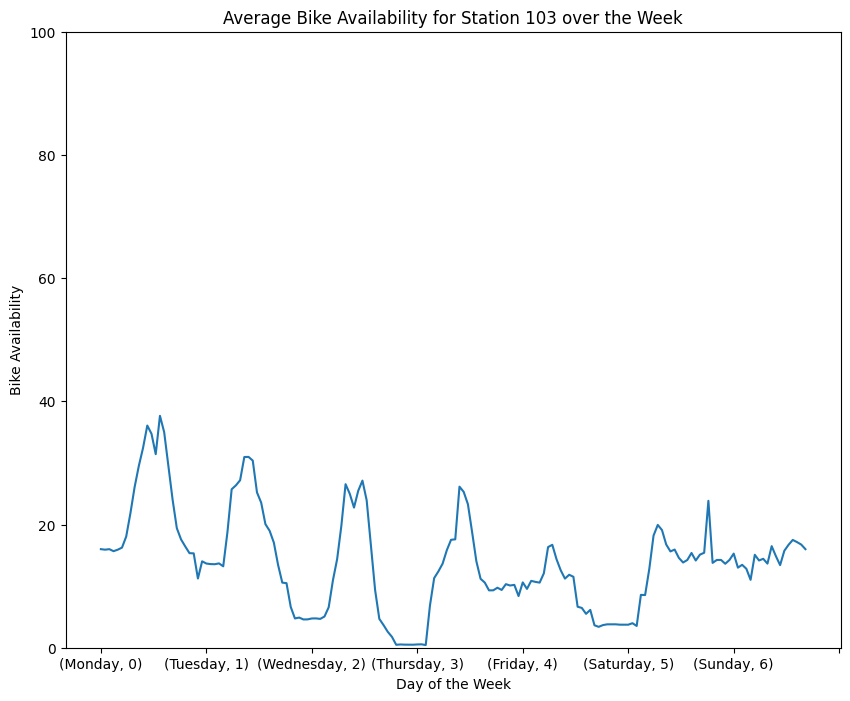

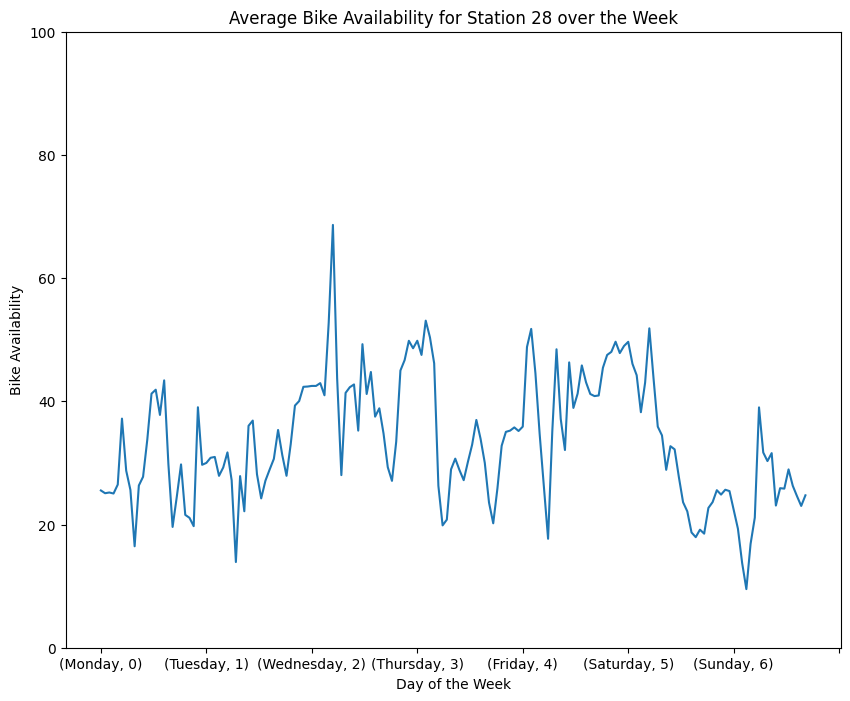

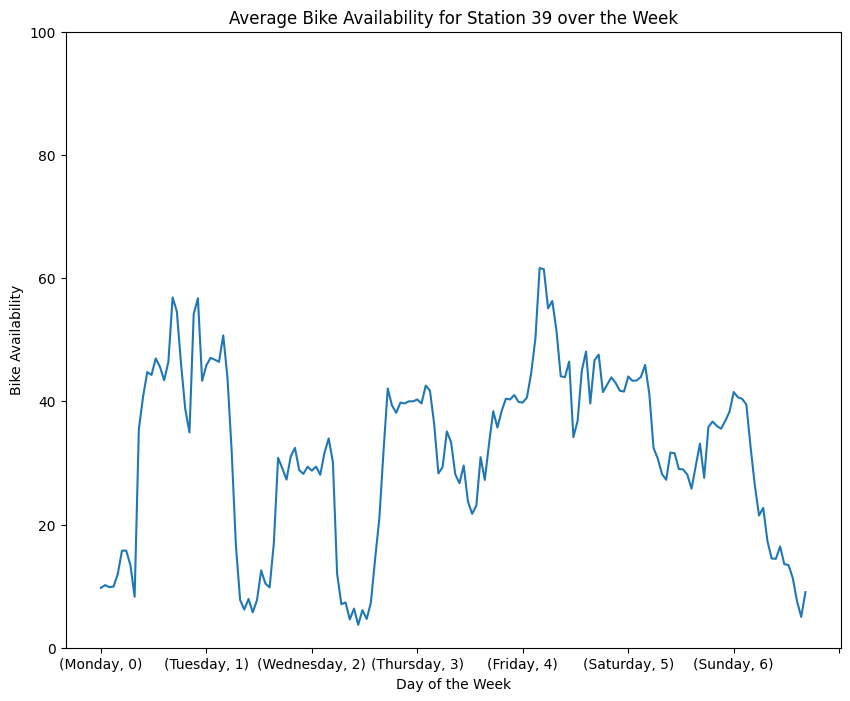

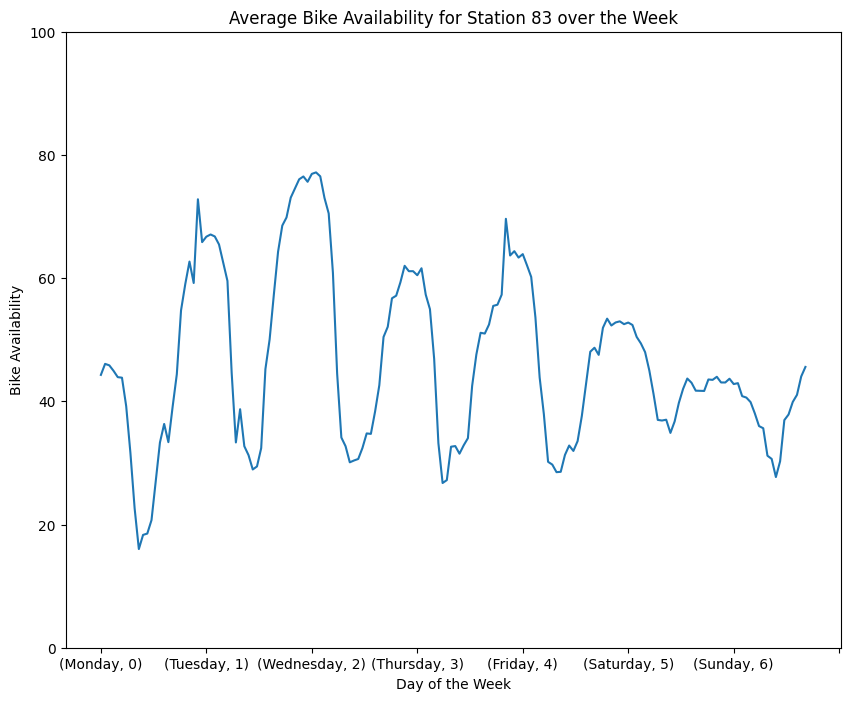

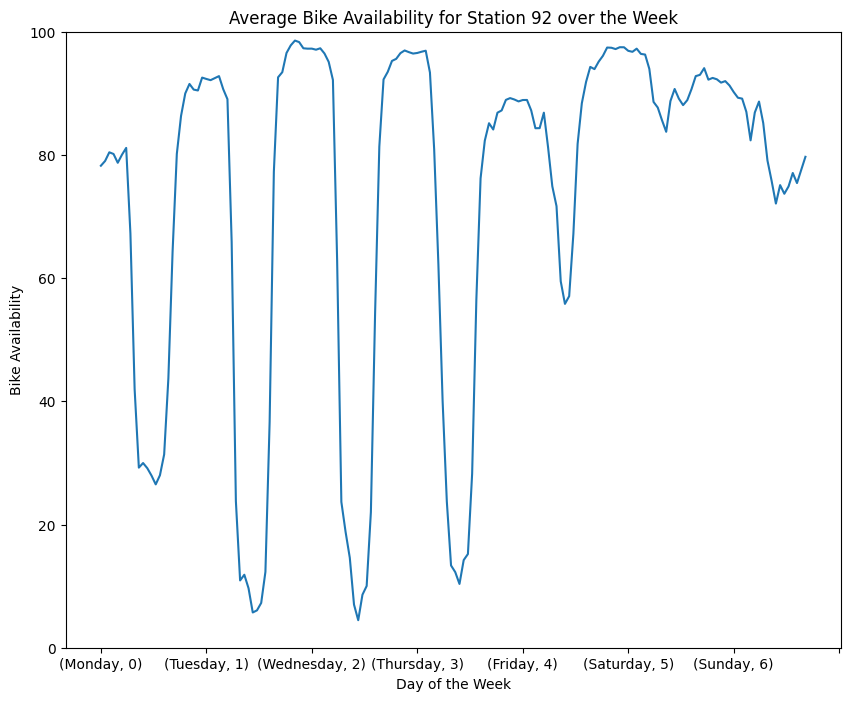

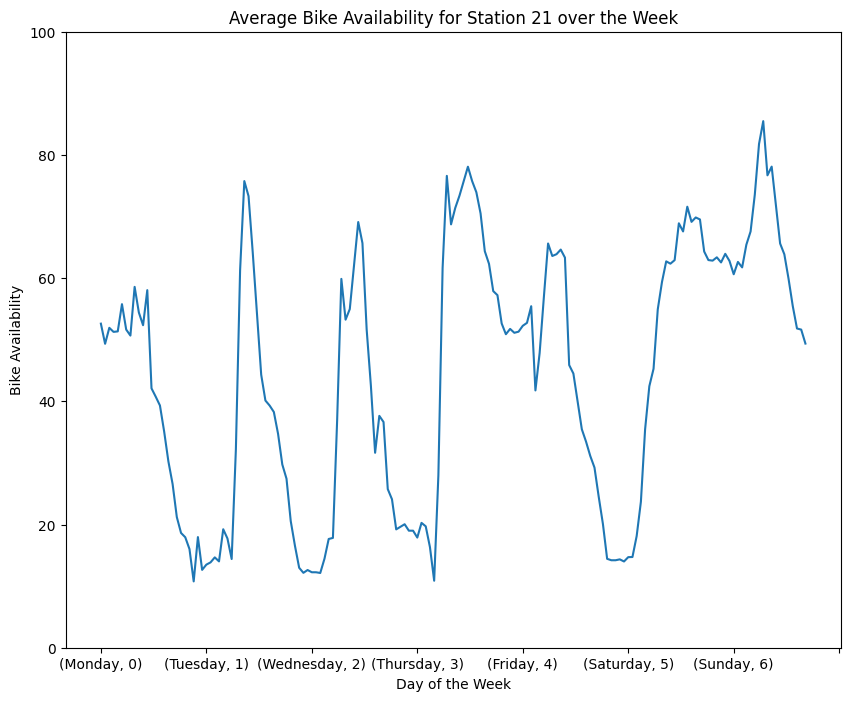

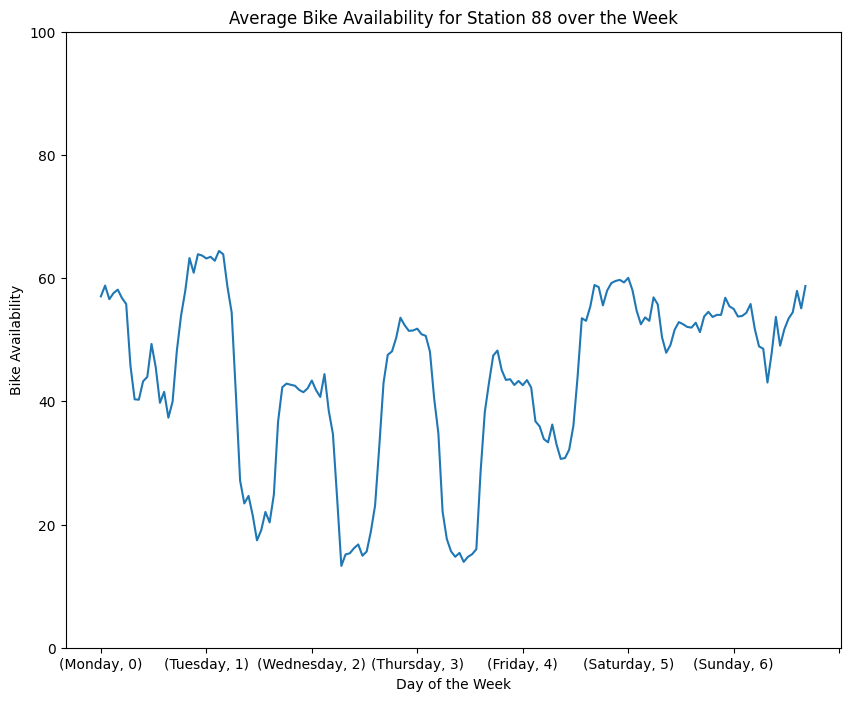

In [42]:
#pick some stations to plot
length = len(df_static['number'])
for i in range(0, length):
    numb=df_static['number'][i]
    average_bike_availability(numb)